In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from  sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
# Load and Explore the dataset
#Load dataset
data=pd.read_csv('Credit Card Fraud Detection.csv')
data

age  income  loan_amount  credit_score employment_status  default(y)  \
0       38   71440        27069           689     self-employed           1   
1       36   90200        14895           578          employed           0   
2       47   85896         2613           352          employed           1   
3       38   20121         3163           622        unemployed           0   
4       44   77529        37731           615     self-employed           0   
...    ...     ...          ...           ...               ...         ...   
99995   23   51865        47611           542          employed           1   
99996   34   80958        26297           799          employed           0   
99997   53   97881        47710           806          employed           0   
99998   59   39865         4827           379          employed           1   
99999   21   82691        11838           650          employed           1   

       loan_term  interest_rate  debt_to_income_ratio  num_of_dependents  \
0             36       9.937874             31.046101                  0   
1             48      13.624882             21.845252                  0   
2             12       6.676366             12.562405                  1   
3             48      12.833366             17.144545                  1   
4             12       4.111636             35.892430                  3   
...          ...            ...                   ...                ...   
99995         48      14.829470             34.446382                  0   
99996         48      12.085357             23.618622                  3   
99997         36       5.521324             14.515193                  3   
99998         48       4.438388             28.148553                  2   
99999         36      13.545356             38.341493                  1   

      education_level home_ownership marital_status  credit_history_length  \
0         high_school           rent        married                      7   
1         high_school            own        married                     11   
2            bachelor       mortgage       divorced                     24   
3              master            own        married                     12   
4         high_school            own         single                     27   
...               ...            ...            ...                    ...   
99995        bachelor           rent        married                     10   
99996        bachelor           rent        married                     23   
99997     high_school           rent        married                     22   
99998     high_school            own        married                      8   
99999     high_school            own         single                      5   

       num_credit_lines  late_payments  bankruptcies  annual_savings  \
0                     6              1             1           25259   
1                    16              8             0           40761   
2                     2              2             0           34857   
3                     4              6             1           16048   
4                     7              5             0            5668   
...                 ...            ...           ...             ...   
99995                 2              6             0           42800   
99996                18              3             0           12779   
99997                 5              5             0           26205   
99998                11              8             0           38120   
99999                13              5             0           16118   

       retirement_savings  monthly_expenses  
0                  195208              6037  
1                  152999              4064  
2                   67487              2848  
3                   98869              7721  
4                   42397              8009  
...                   ...               ...  
99995               9

# EDA

In [3]:
import dtale

In [4]:
dtale.show(data)

In [5]:
#Display first few rows
data.head()

age  income  loan_amount  credit_score employment_status  default(y)  \
0   38   71440        27069           689     self-employed           1   
1   36   90200        14895           578          employed           0   
2   47   85896         2613           352          employed           1   
3   38   20121         3163           622        unemployed           0   
4   44   77529        37731           615     self-employed           0   

   loan_term  interest_rate  debt_to_income_ratio  num_of_dependents  \
0         36       9.937874             31.046101                  0   
1         48      13.624882             21.845252                  0   
2         12       6.676366             12.562405                  1   
3         48      12.833366             17.144545                  1   
4         12       4.111636             35.892430                  3   

  education_level home_ownership marital_status  credit_history_length  \
0     high_school           rent        married                      7   
1     high_school            own        married                     11   
2        bachelor       mortgage       divorced                     24   
3          master            own        married                     12   
4     high_school            own         single                     27   

   num_credit_lines  late_payments  bankruptcies  annual_savings  \
0                 6              1             1           25259   
1                16              8             0           40761   
2                 2              2             0           34857   
3                 4              6             1           16048   
4                 7              5             0            5668   

   retirement_savings  monthly_expenses  
0              195208              6037  
1              152999              4064  
2               67487              2848  
3               98869              7721  
4               42397              8009

In [6]:
data.tail()

age  income  loan_amount  credit_score employment_status  default(y)  \
99995   23   51865        47611           542          employed           1   
99996   34   80958        26297           799          employed           0   
99997   53   97881        47710           806          employed           0   
99998   59   39865         4827           379          employed           1   
99999   21   82691        11838           650          employed           1   

       loan_term  interest_rate  debt_to_income_ratio  num_of_dependents  \
99995         48      14.829470             34.446382                  0   
99996         48      12.085357             23.618622                  3   
99997         36       5.521324             14.515193                  3   
99998         48       4.438388             28.148553                  2   
99999         36      13.545356             38.341493                  1   

      education_level home_ownership marital_status  credit_history_length  \
99995        bachelor           rent        married                     10   
99996        bachelor           rent        married                     23   
99997     high_school           rent        married                     22   
99998     high_school            own        married                      8   
99999     high_school            own         single                      5   

       num_credit_lines  late_payments  bankruptcies  annual_savings  \
99995                 2              6             0           42800   
99996                18              3             0           12779   
99997                 5              5             0           26205   
99998                11              8             0           38120   
99999                13              5             0           16118   

       retirement_savings  monthly_expenses  
99995               99609              4770  
99996              155431              4776  
99997               86238              4250  
99998               73946              7811  
99999               72205              3100

In [5]:
data.describe()

age         income    loan_amount   credit_score  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       42.462720   60012.224960   25519.561950     573.806760   
std        12.690258   23093.209173   14136.260198     158.581563   
min        21.000000   20000.000000    1000.000000     300.000000   
25%        31.000000   39935.750000   13311.750000     437.000000   
50%        42.000000   60175.000000   25583.000000     574.000000   
75%        53.000000   79991.000000   37771.000000     710.000000   
max        64.000000   99998.000000   49999.000000     849.000000   

          default(y)      loan_term  interest_rate  debt_to_income_ratio  \
count  100000.000000  100000.000000  100000.000000         100000.000000   
mean        0.500940      36.025560       9.254996             29.995874   
std         0.500002      16.964051       3.318369             11.563967   
min         0.000000      12.000000       3.500245             10.000275   
25%         0.000000      24.000000       6.377951             19.973035   
50%         1.000000      36.000000       9.269498             30.007073   
75%         1.000000      48.000000      12.113304             40.034245   
max         1.000000      60.000000      14.999895             49.999915   

       num_of_dependents  credit_history_length  num_credit_lines  \
count      100000.000000          100000.000000     100000.000000   
mean            1.997350              14.975920         10.012660   
std             1.417576               8.369603          5.470983   
min             0.000000               1.000000          1.000000   
25%             1.000000               8.000000          5.000000   
50%             2.000000              15.000000         10.000000   
75%             3.000000              22.000000         15.000000   
max             4.000000              29.000000         19.000000   

       late_payments   bankruptcies  annual_savings  retirement_savings  \
count  100000.000000  100000.000000   100000.000000       100000.000000   
mean        4.492340       0.059720    25221.936980       100743.644020   
std         2.872665       0.276973    14258.782992        57459.490883   
min         0.000000       0.000000      500.000000         1002.000000   
25%         2.000000       0.000000    12912.750000        50855.500000   
50%         4.000000       0.000000    25230.500000       100694.500000   
75%         7.000000       0.000000    37514.000000       150403.750000   
max         9.000000       2.000000    49999.000000       199997.000000   

       monthly_expenses  
count     100000.000000  
mean        5253.344490  
std         2740.027792  
min          500.000000  
25%         2874.750000  
50%         5263.000000  
75%         7631.000000  
max         9999.000000

In [6]:
data=data.rename(columns={'default(y)':'default'})
data.default.value_counts()

default
1    50094
0    49906
Name: count, dtype: int64

In [7]:
#MAX AND MIN AGE
max_ = data['age'].max()
min_ = data['age'].min()
print(f"maximum Age {max_}")
print(f"minimum Age {min_}")

# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')
        
age_group([0 ,18, 26, 36, 46, 56, 66])

maximum Age 64
minimum Age 21
Age between 1 and 18: Number of people 0
Age between 19 and 26: Number of people 13639
Age between 27 and 36: Number of people 22762
Age between 37 and 46: Number of people 22827
Age between 47 and 56: Number of people 22628
Age between 57 and 66: Number of people 18144


In [8]:
#max and min income
max_ = data['income'].max()
min_ = data['income'].min()

print(f"maximum Income {max_}")
print(f"minimum Income {min_}")

#people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')
        
income_group([0, 25000, 50000, 75000, 100000,float('inf')])

maximum Income 99998
minimum Income 20000
Income between 1 and 25000: Number of people 6356
Income between 25001 and 50000: Number of people 31128
Income between 50001 and 75000: Number of people 31250
Income between 75001 and 100000: Number of people 31266
Income between 100001 and inf: Number of people 0


# Visualizing Categorical Variables

In [9]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical type Columns :")
print(categorical_columns)

Categorical type Columns :
Index(['employment_status', 'education_level', 'home_ownership',
       'marital_status'],
      dtype='object')


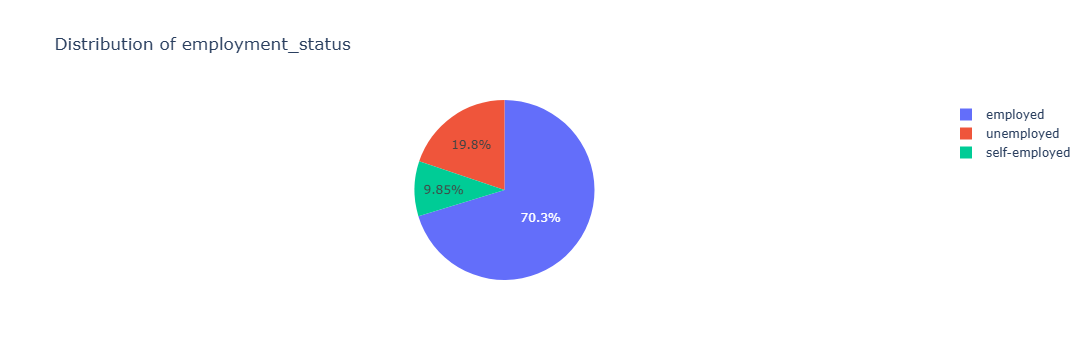

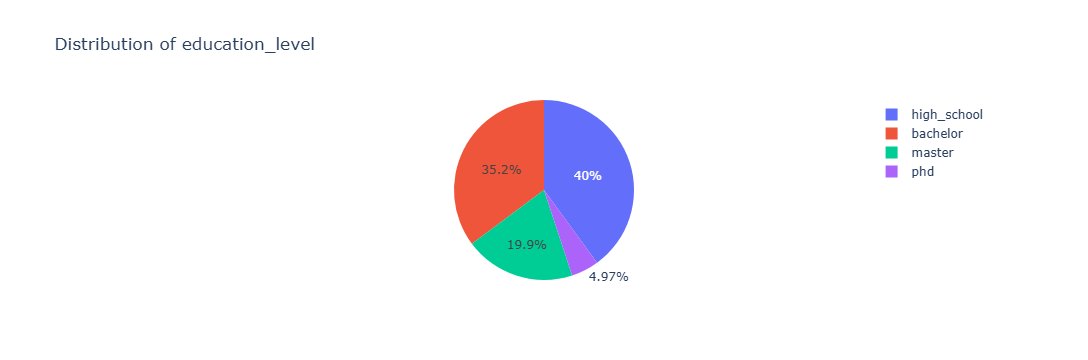

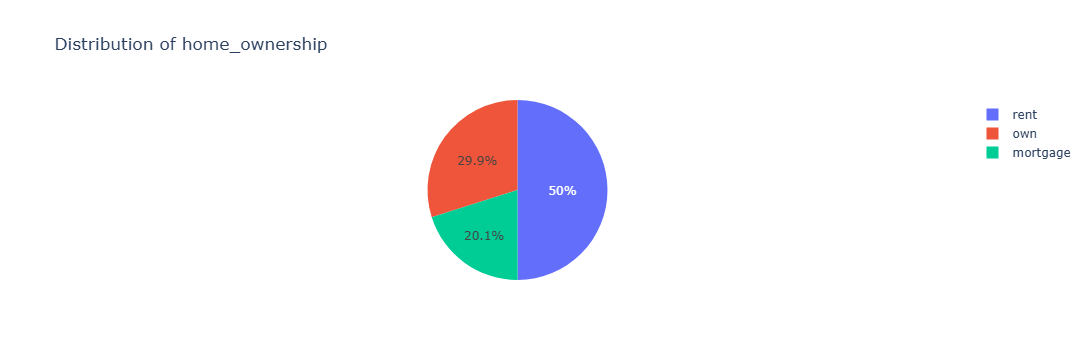

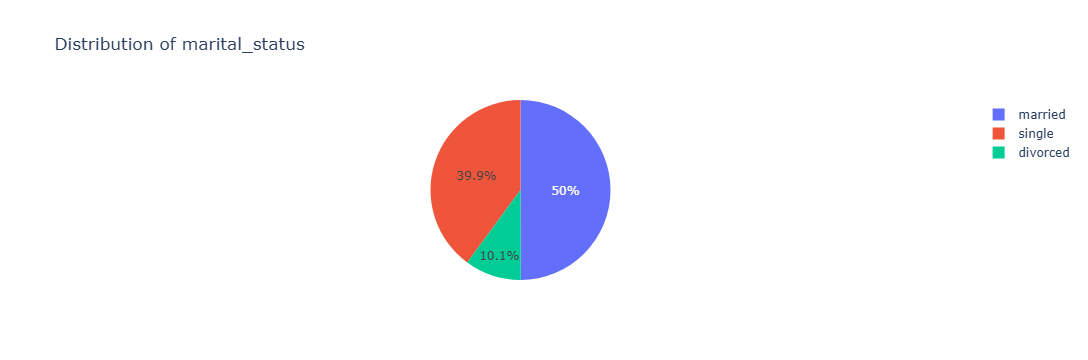

In [10]:
import plotly.express as px
for i in categorical_columns:
    counts = data[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f"Distribution of {i}")
    fig.show()

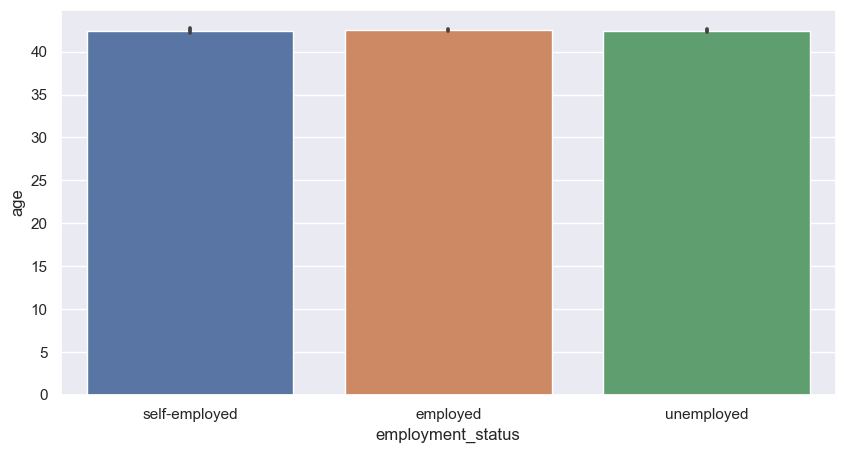

In [11]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.barplot(x='employment_status', y='age', data=data)

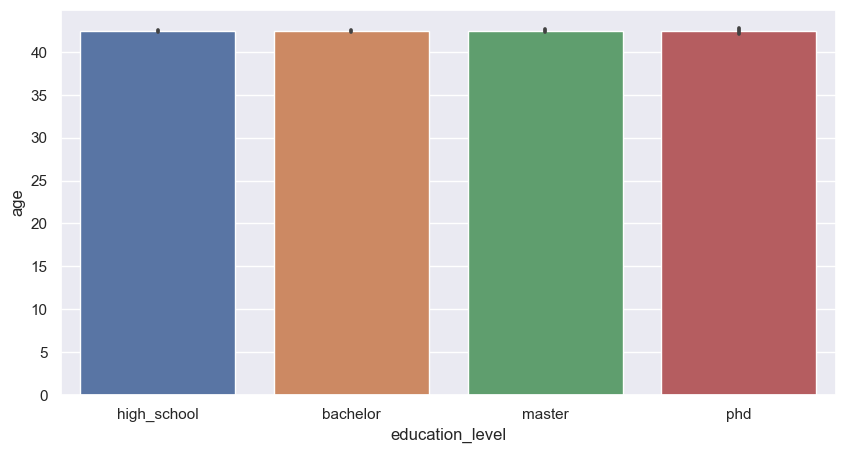

In [14]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.barplot(x='education_level', y='age', data=data)

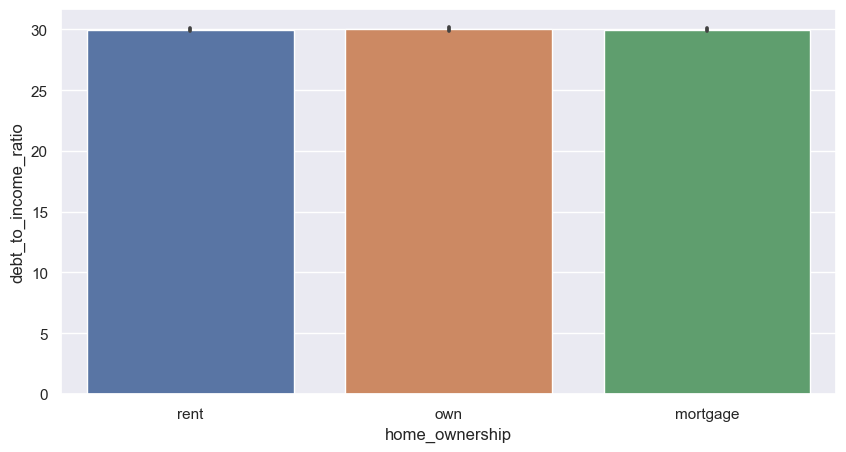

In [15]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.barplot(x='home_ownership', y='debt_to_income_ratio', data=data)

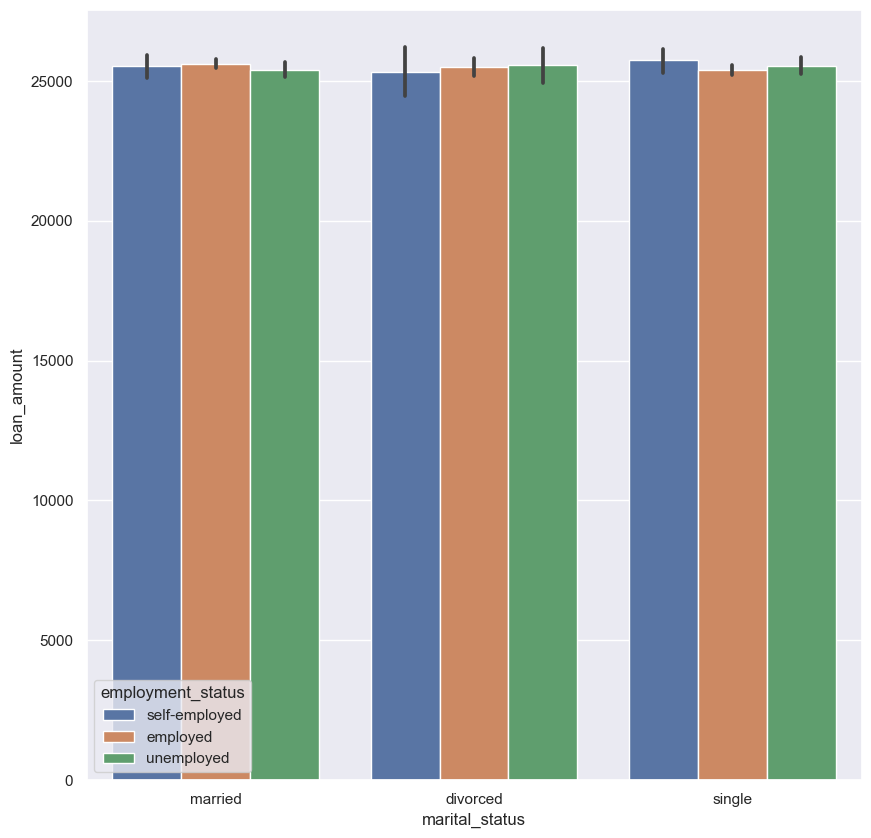

In [17]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.barplot(x='marital_status', y='loan_amount',hue='employment_status', data=data)

# Visualizing Numerical Variables

In [12]:
numerical_columns = data.select_dtypes(include=['int64','float64']).columns
print("\nNumerical type Columns :")
print(numerical_columns)


Numerical type Columns :
Index(['age', 'income', 'loan_amount', 'credit_score', 'default', 'loan_term',
       'interest_rate', 'debt_to_income_ratio', 'num_of_dependents',
       'credit_history_length', 'num_credit_lines', 'late_payments',
       'bankruptcies', 'annual_savings', 'retirement_savings',
       'monthly_expenses'],
      dtype='object')


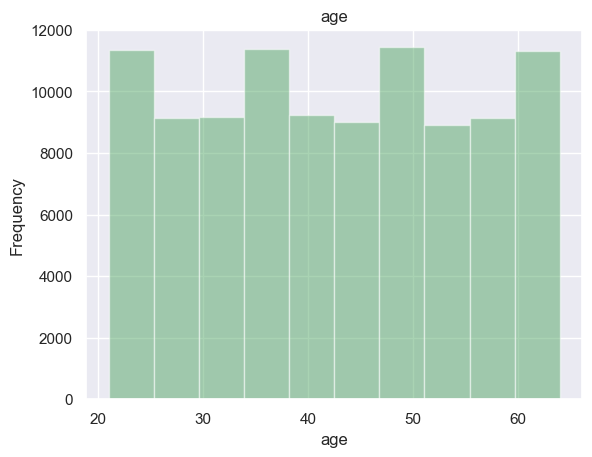

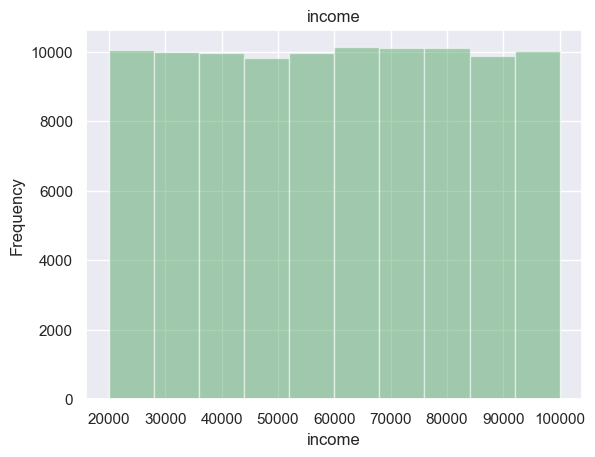

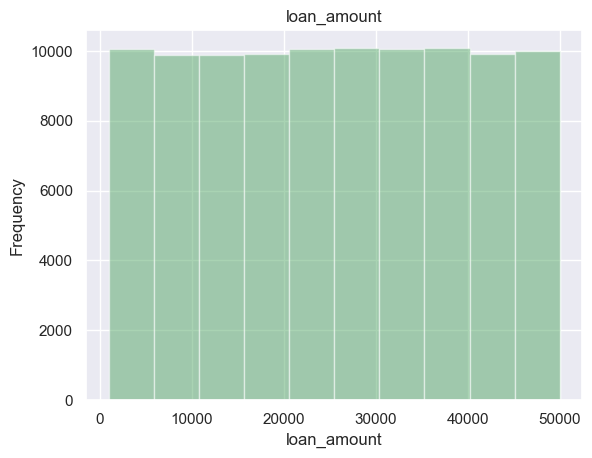

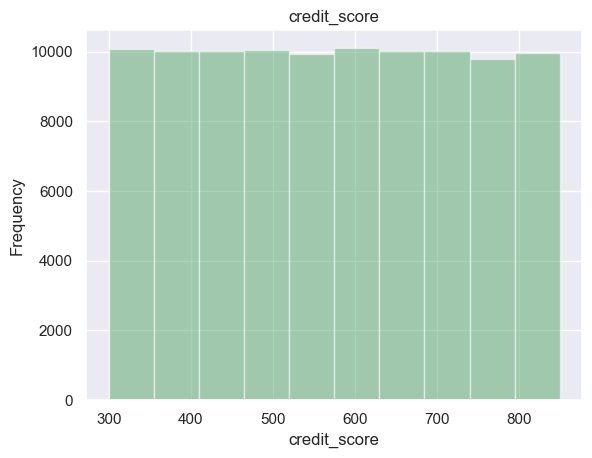

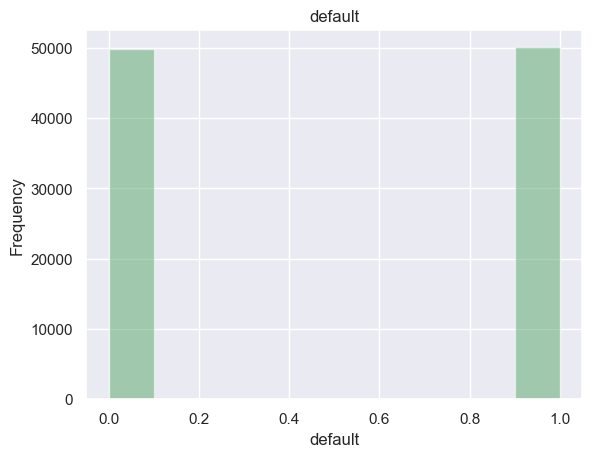

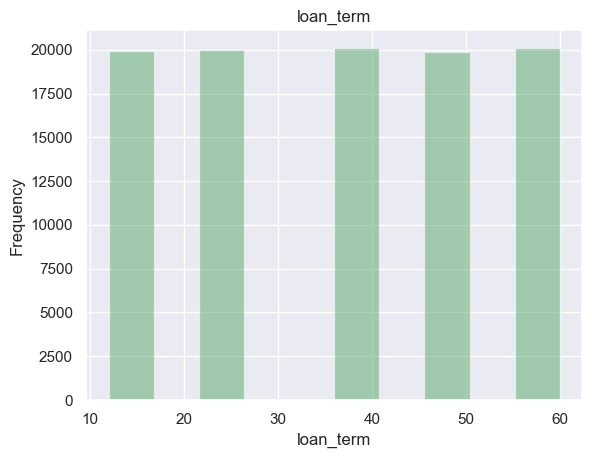

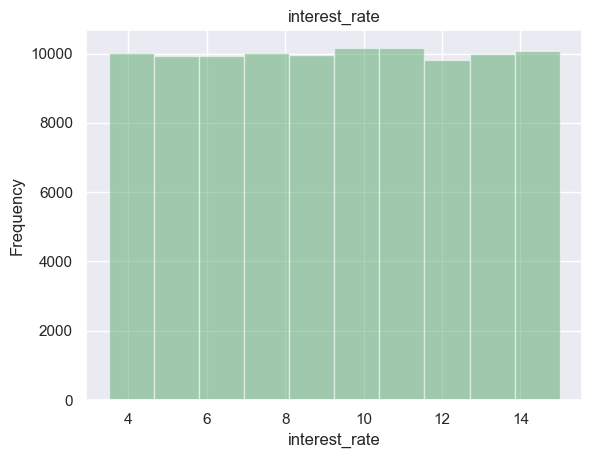

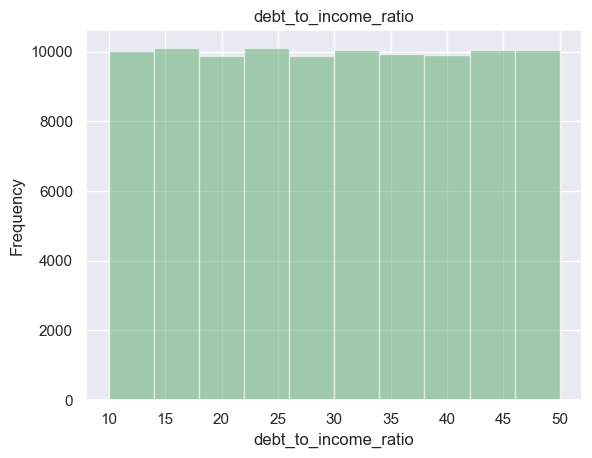

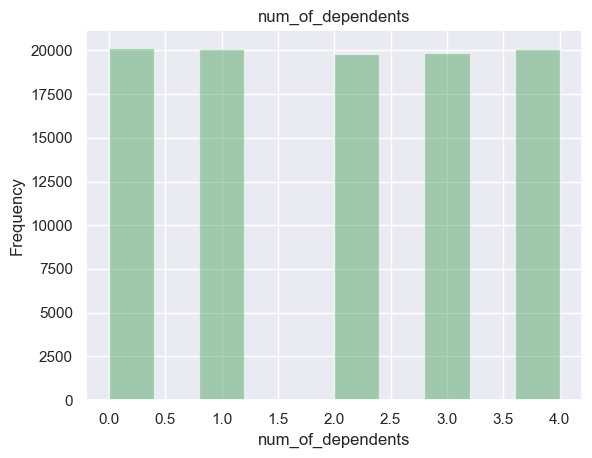

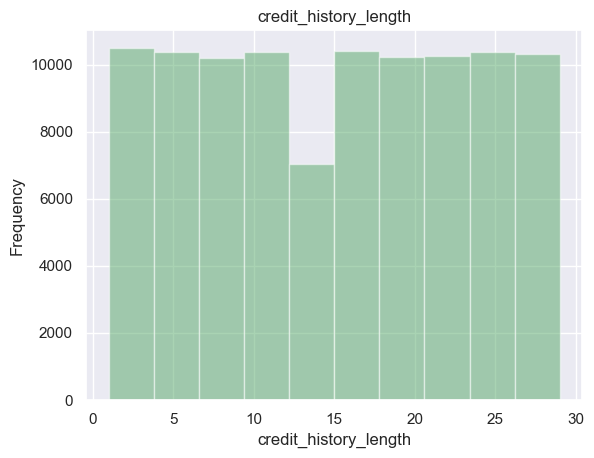

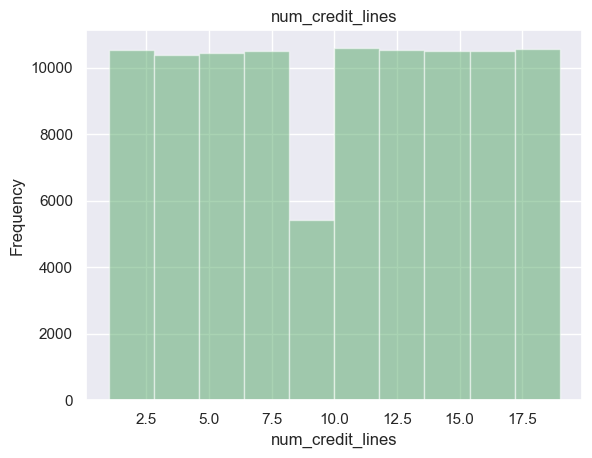

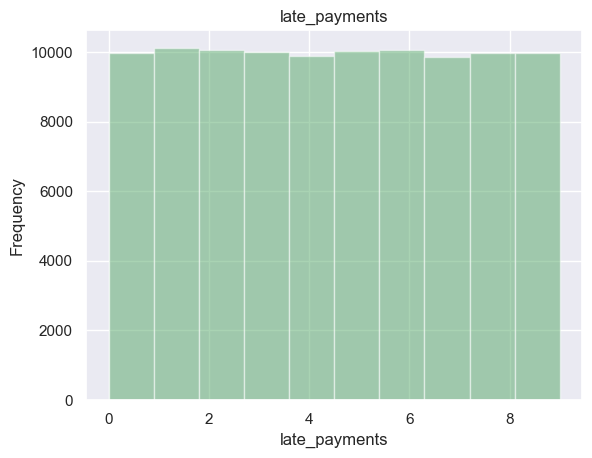

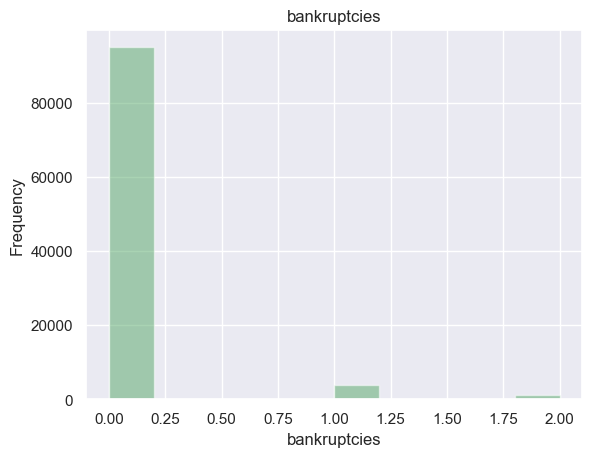

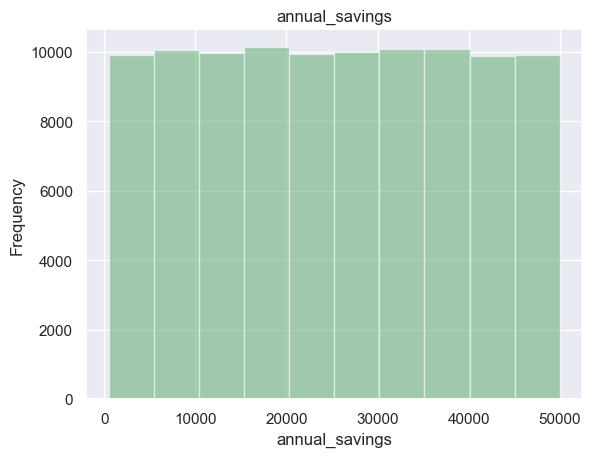

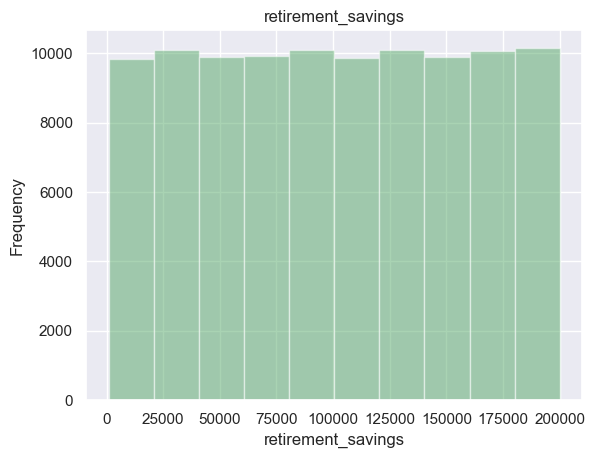

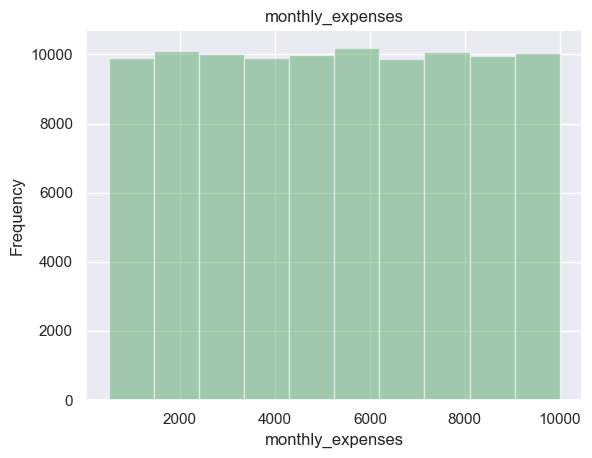

In [13]:
def hist_for_nums(data, numerical_columns):
    for col in numerical_columns:
        data[col].plot.hist(alpha=0.5, color='g')
        plt.xlabel(col)
        plt.title(col)
        plt.show()
hist_for_nums(data, numerical_columns)

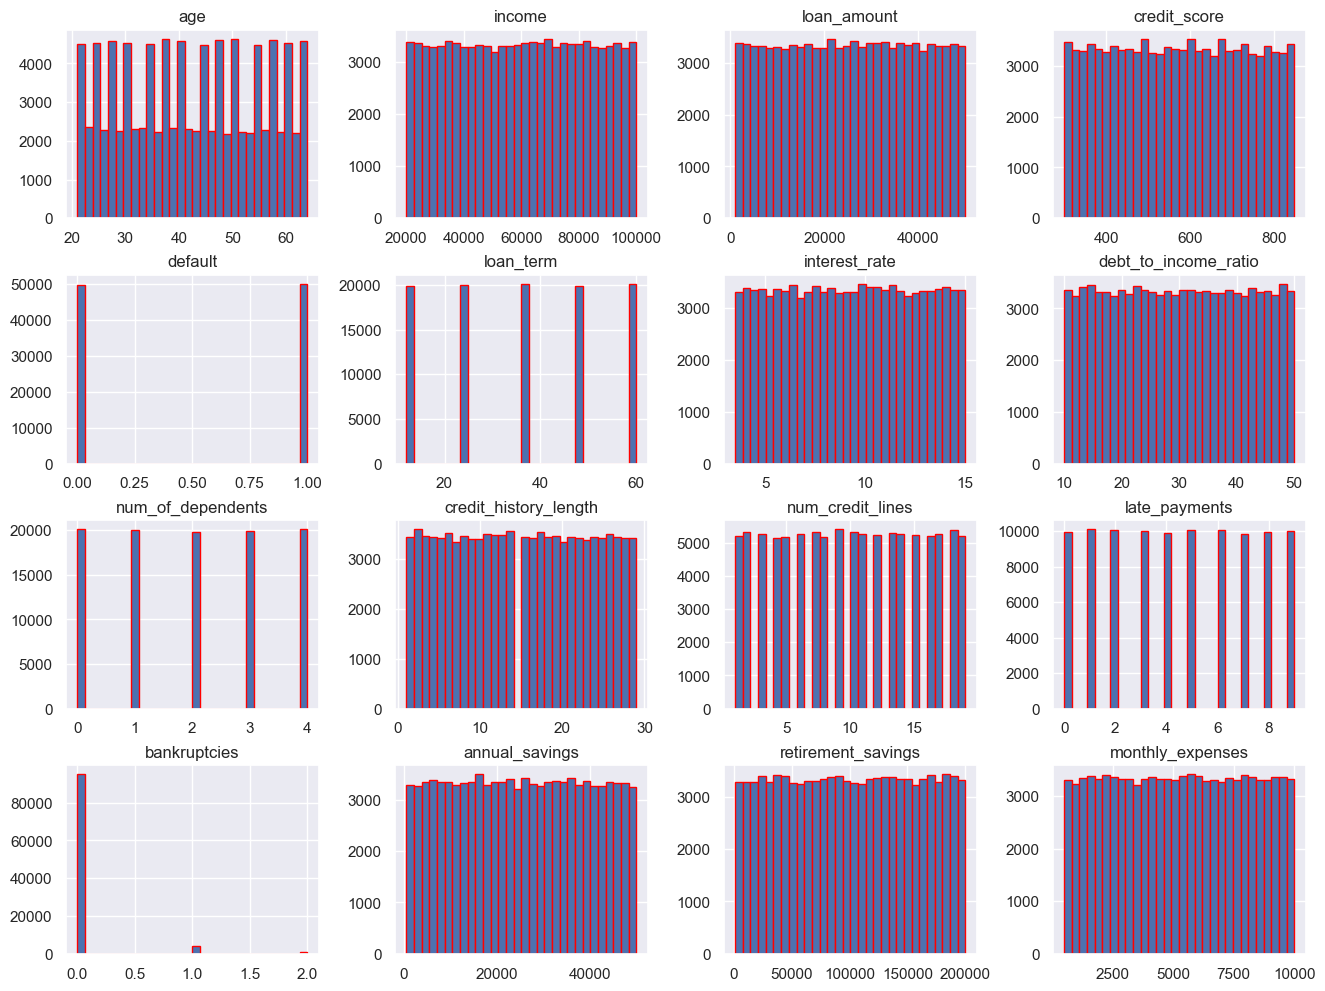

In [18]:
numerical_cols=data.select_dtypes(include=['int64','float']).columns.tolist()
data[numerical_cols].hist(bins=30,figsize=(16,12),edgecolor='red')
plt.show()

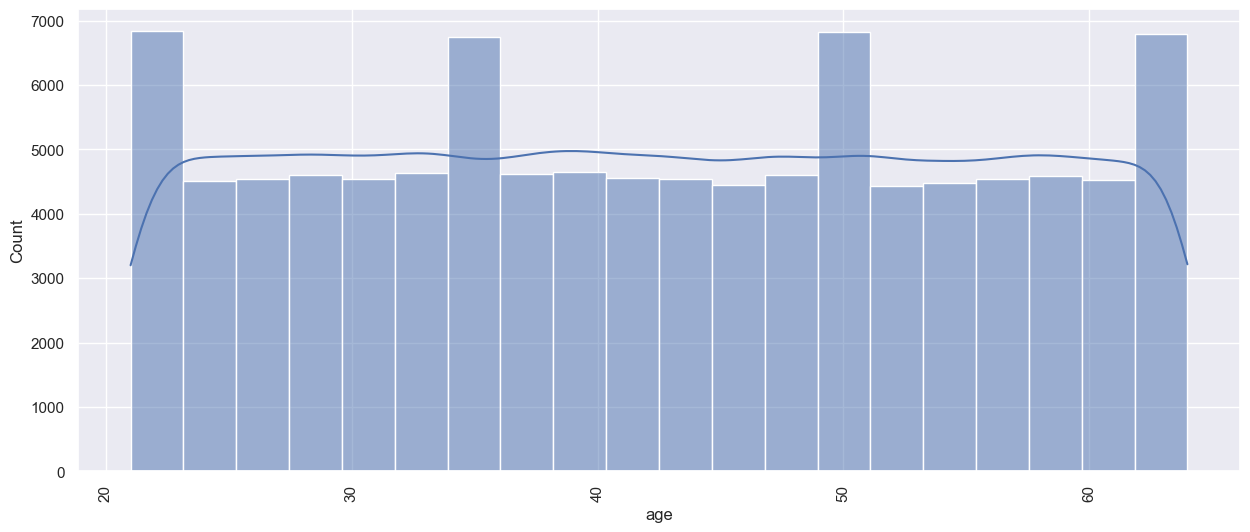

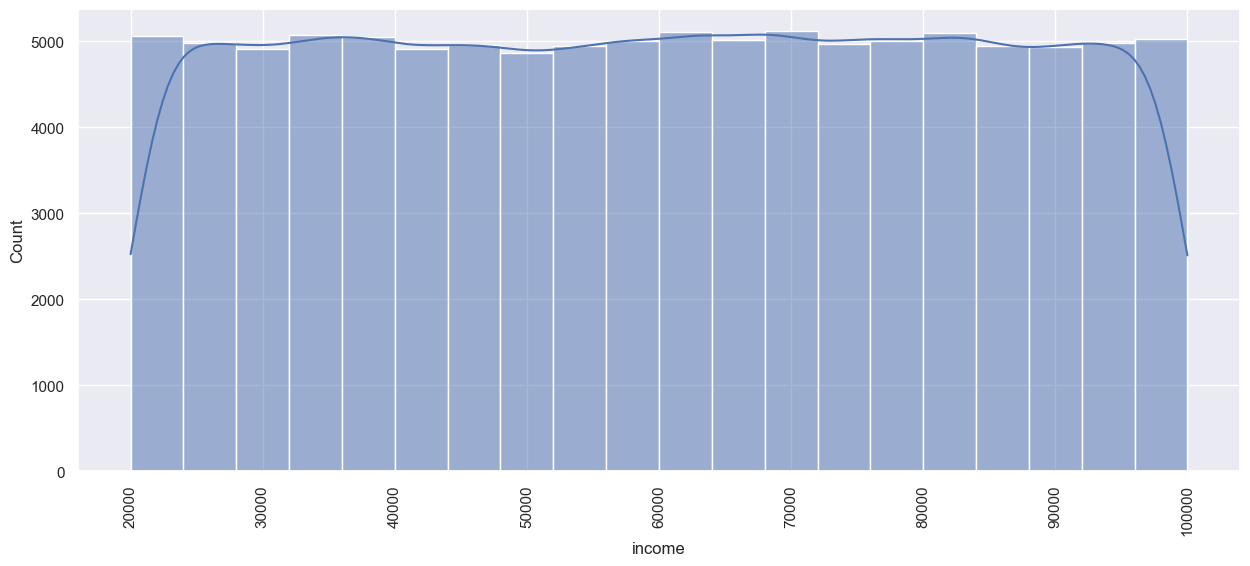

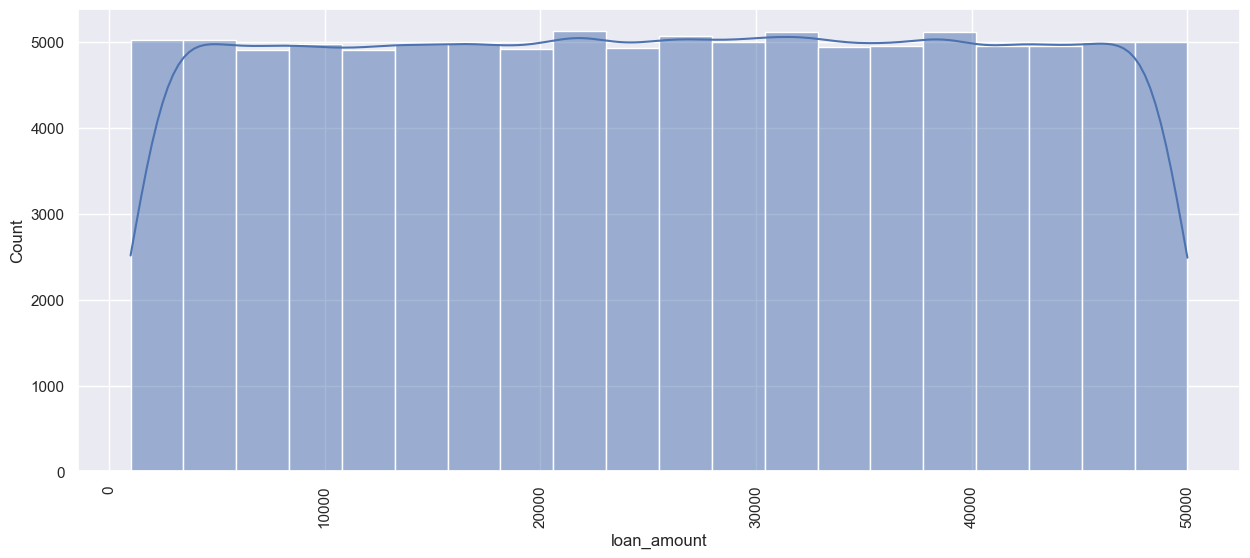

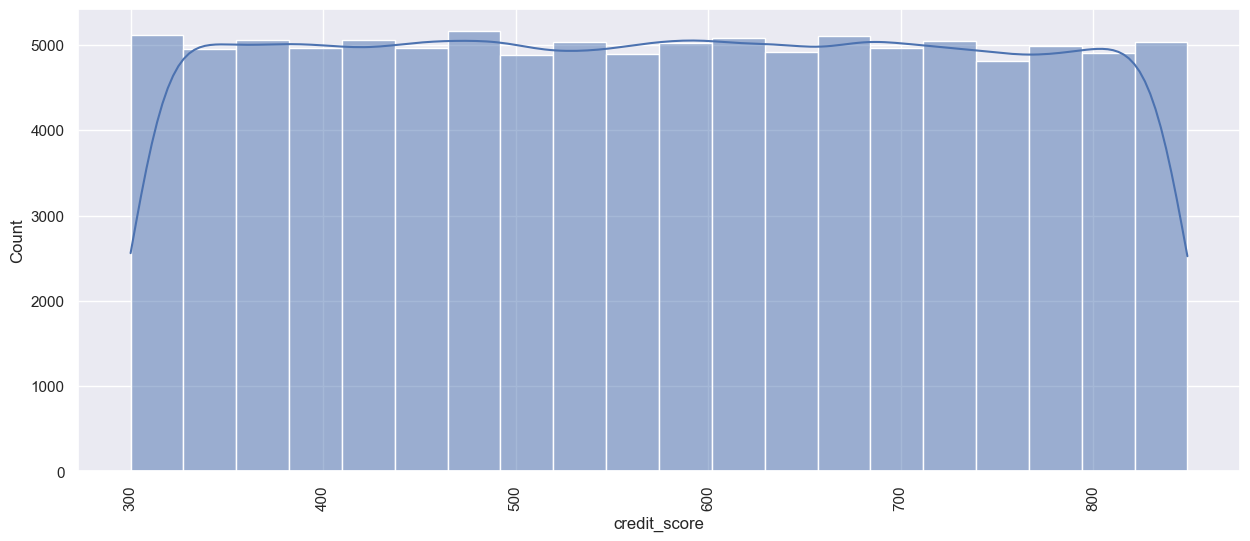

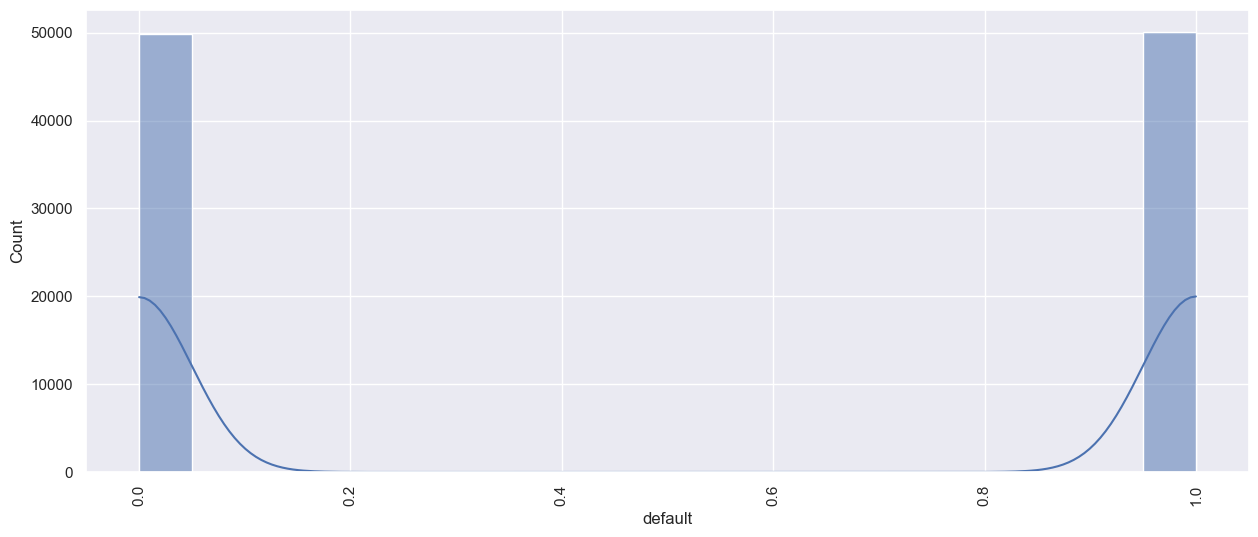

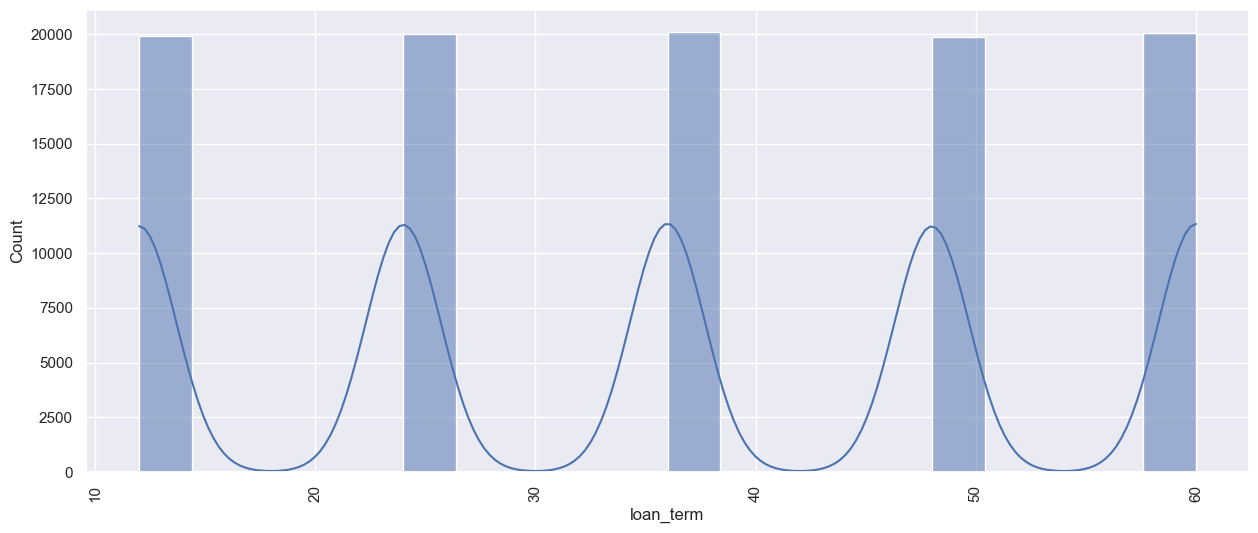

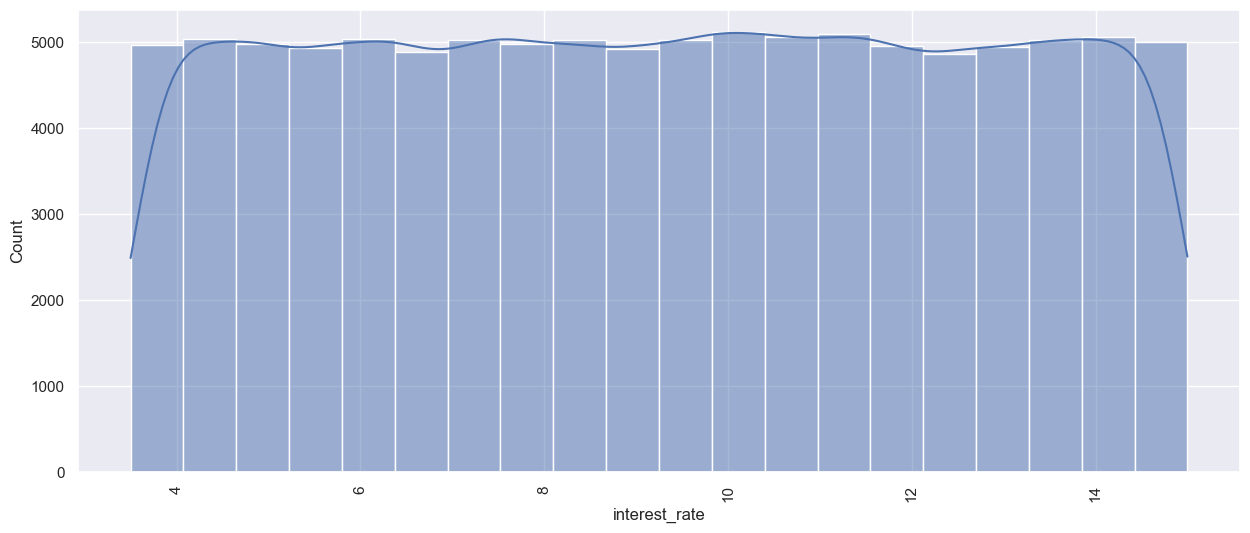

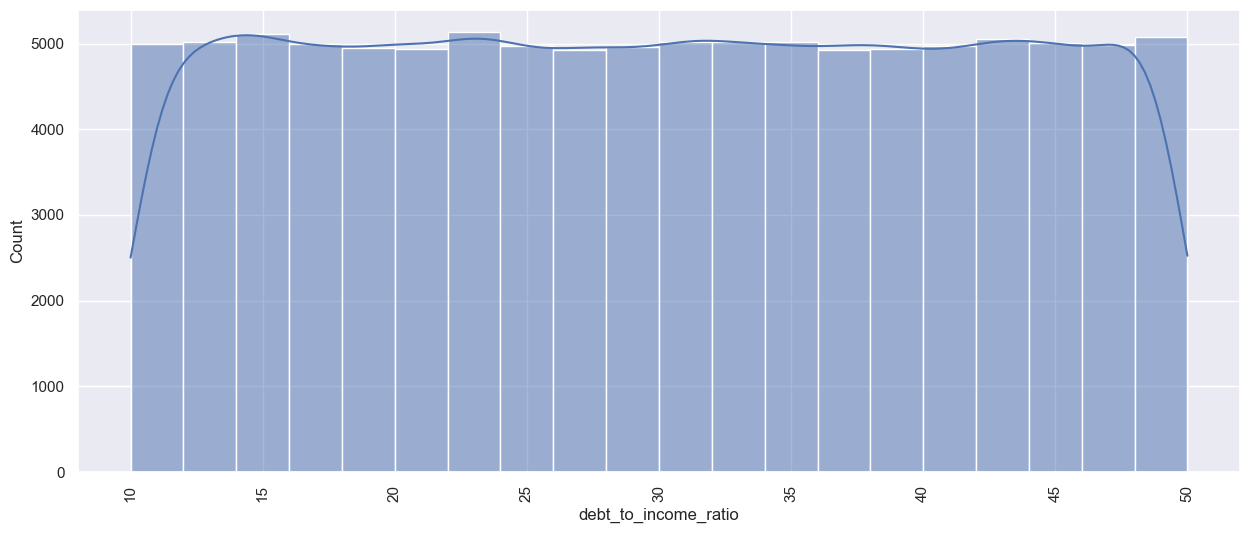

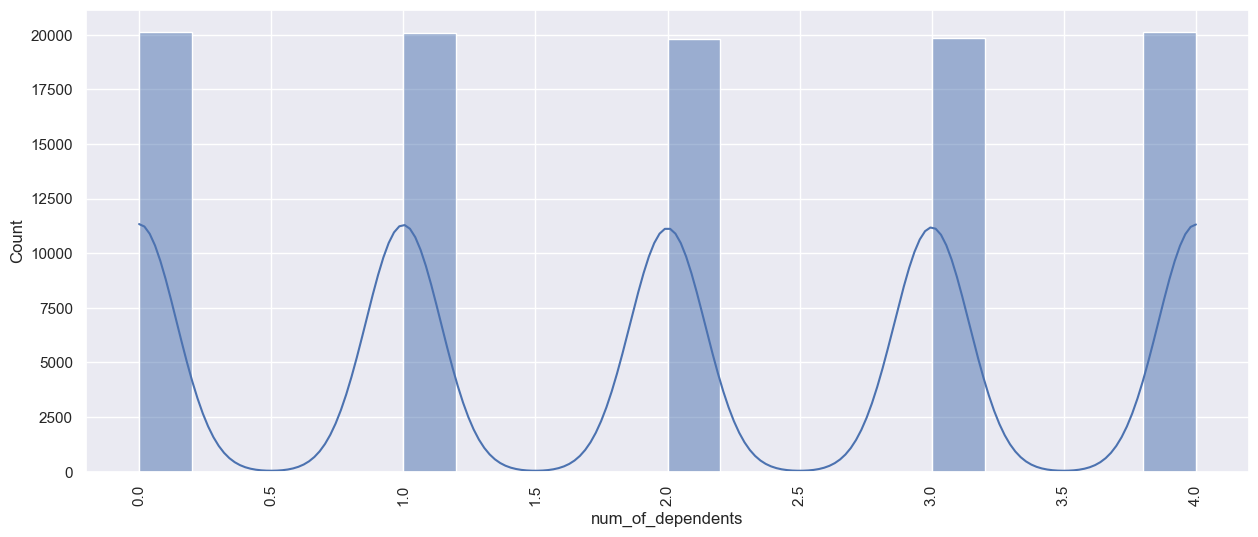

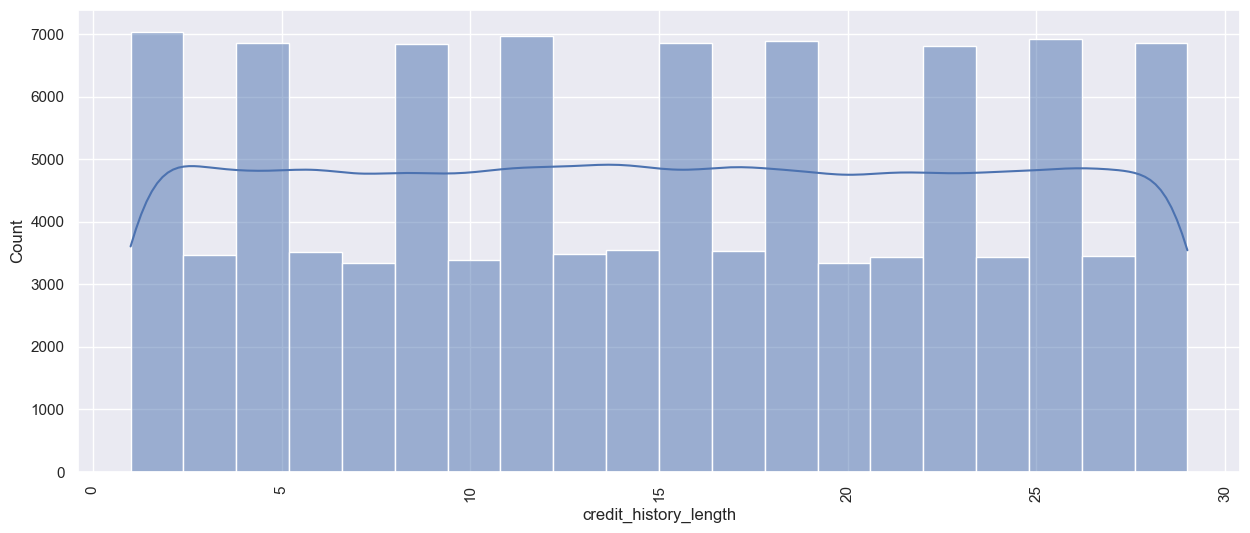

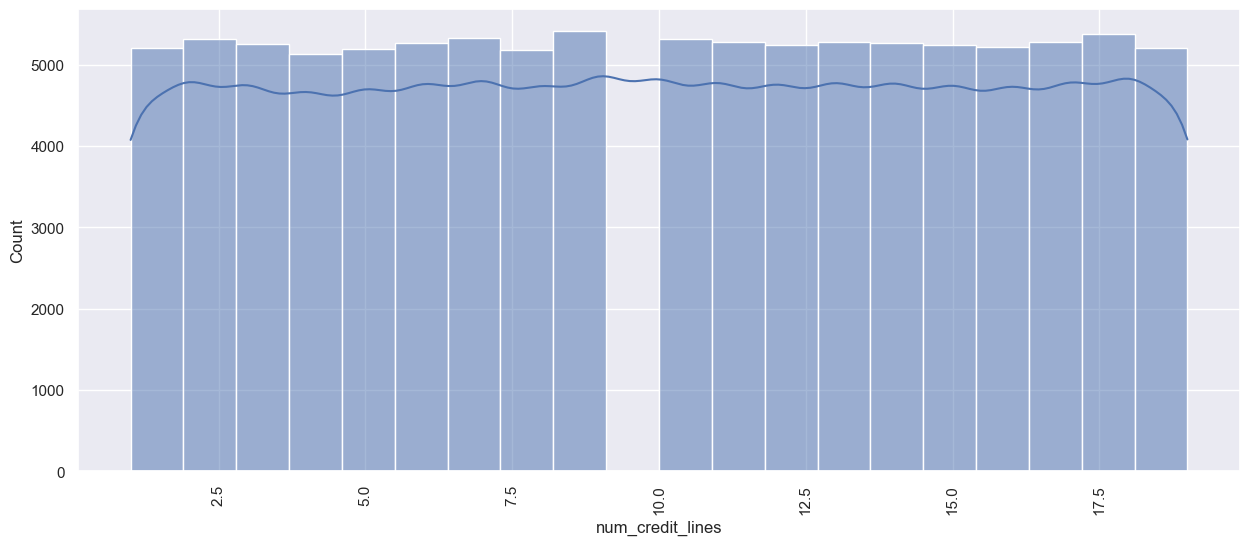

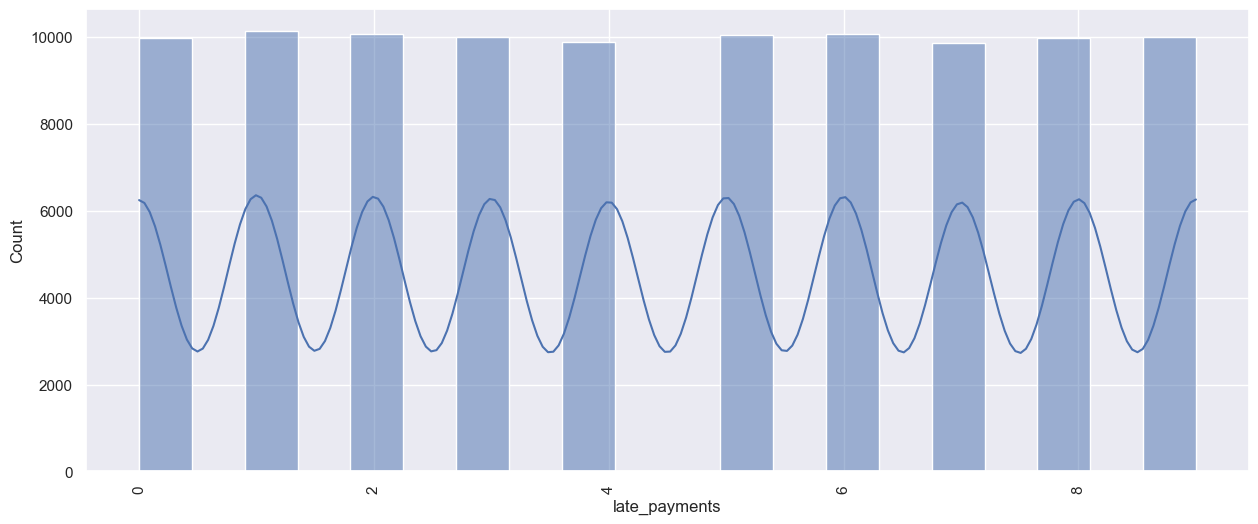

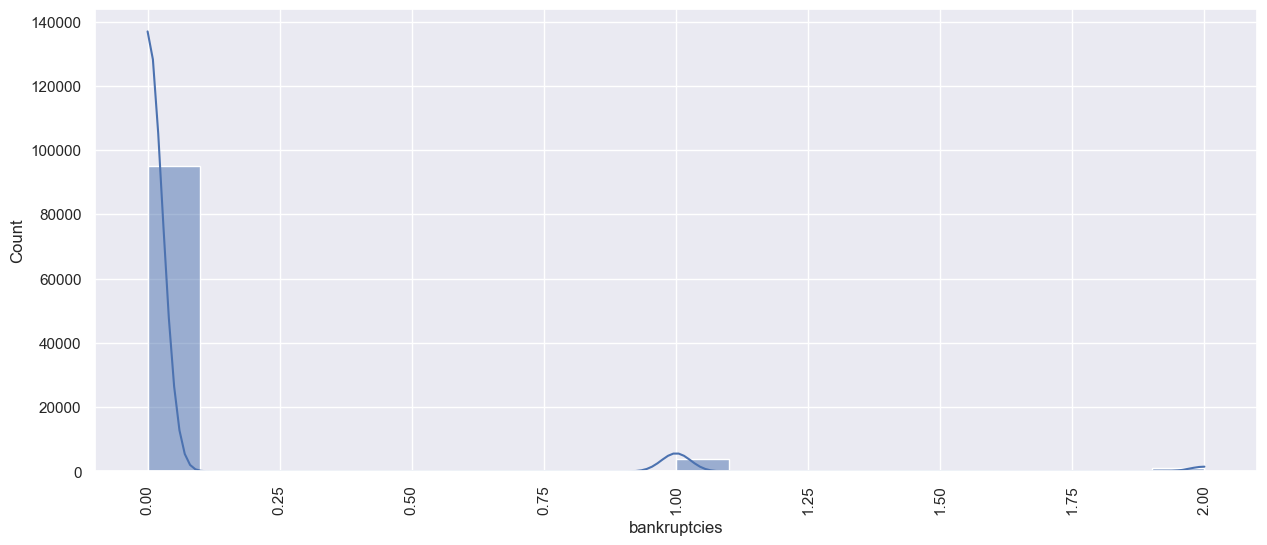

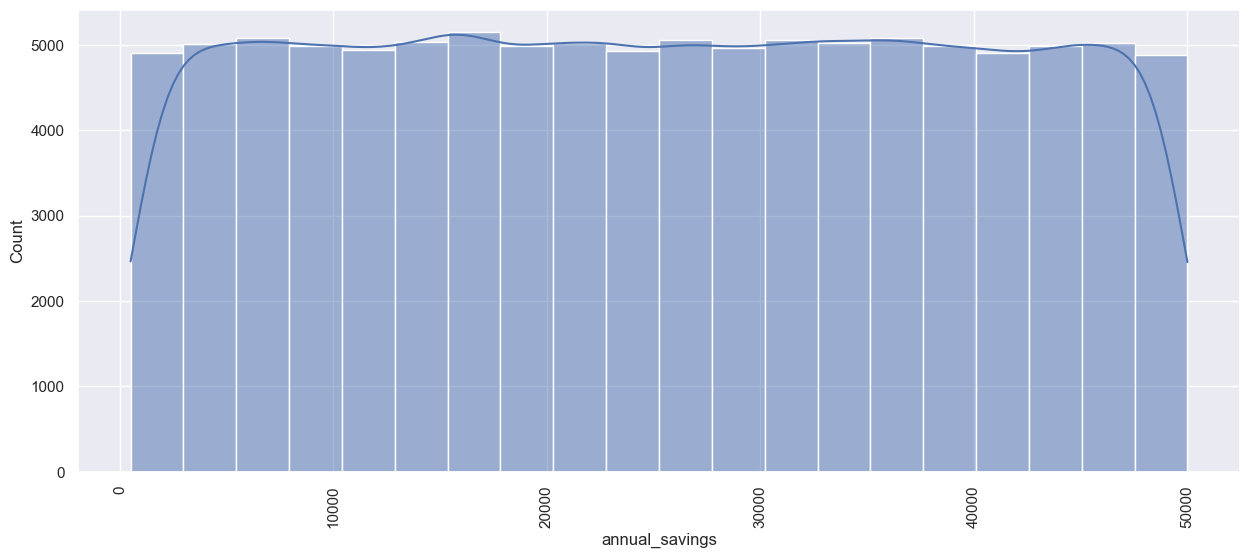

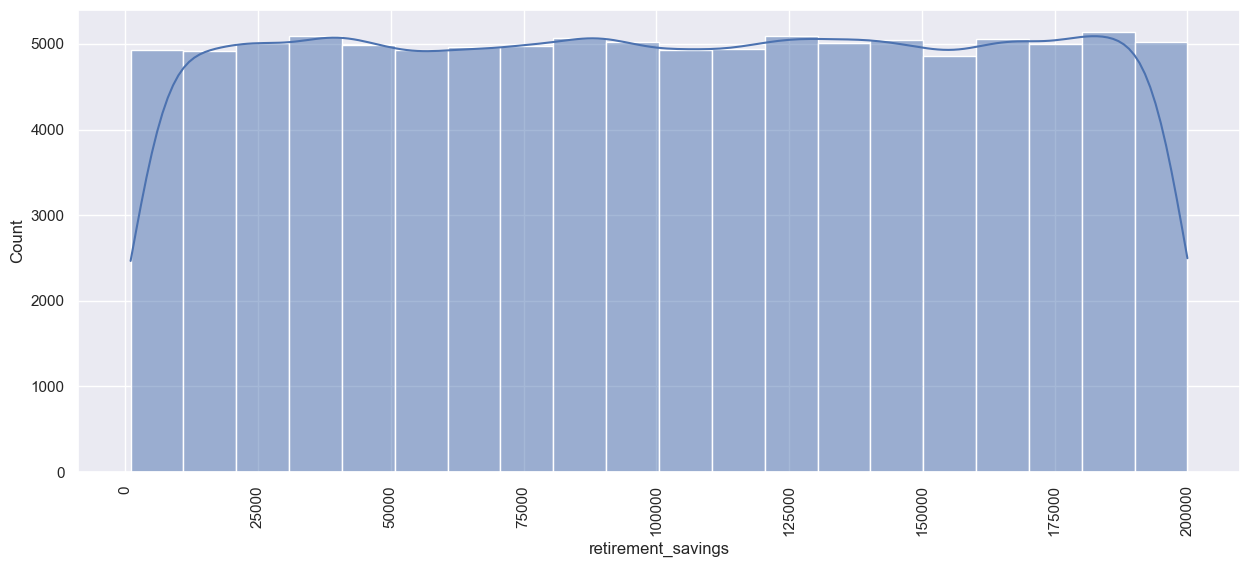

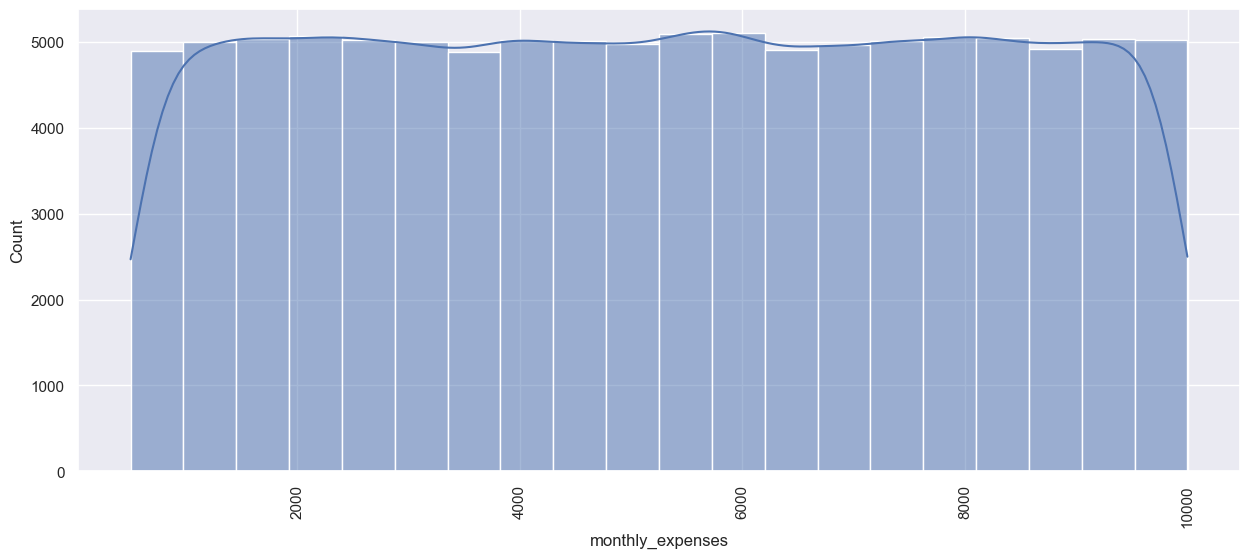

In [19]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.histplot(data[i],bins=20,kde=True,palette='hls')
    plt.xticks(rotation=90)
    plt.show()

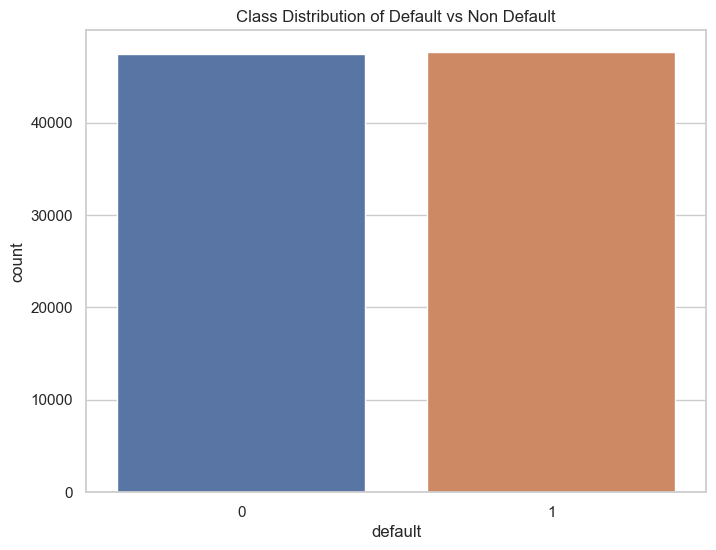

In [49]:
# Visualize the class distribution
plt.figure(figsize=(8,6))
sns.countplot(x='default',data=data)
plt.title('Class Distribution of Default vs Non Default')
plt.show()

# Categorical vs Numerical Variable

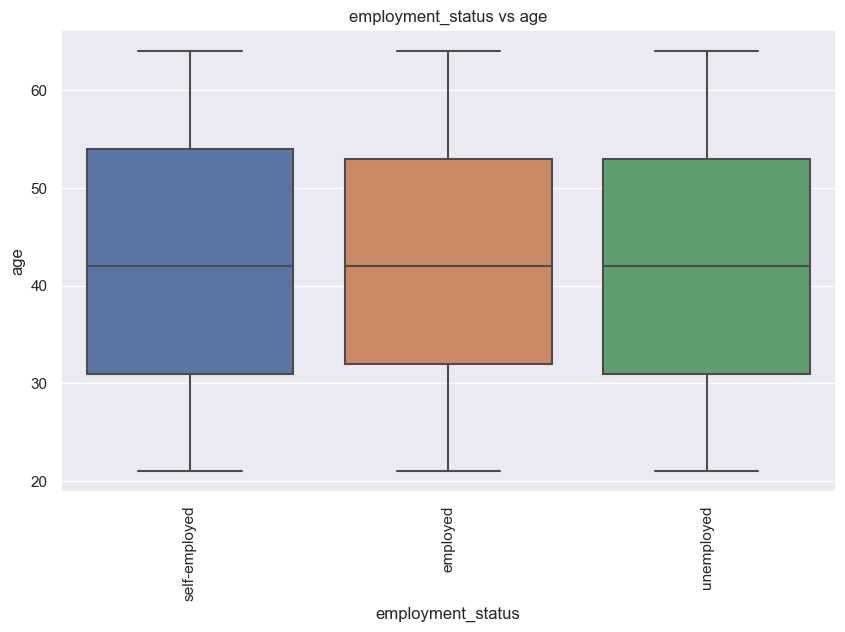

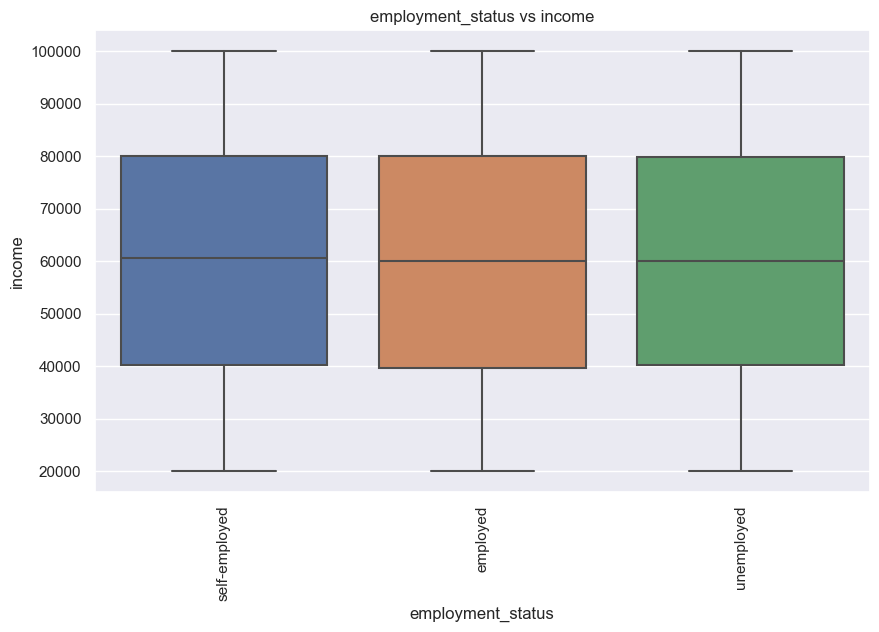

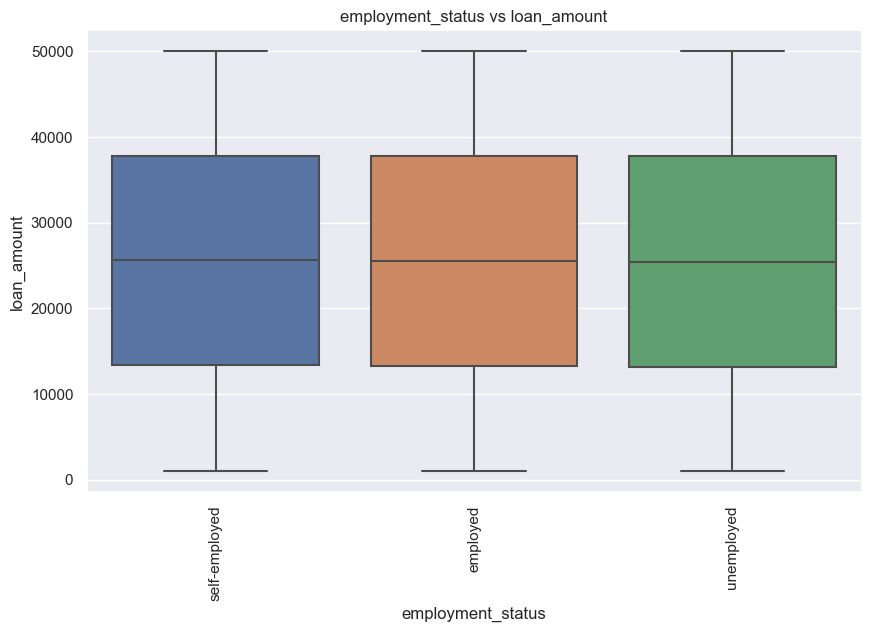

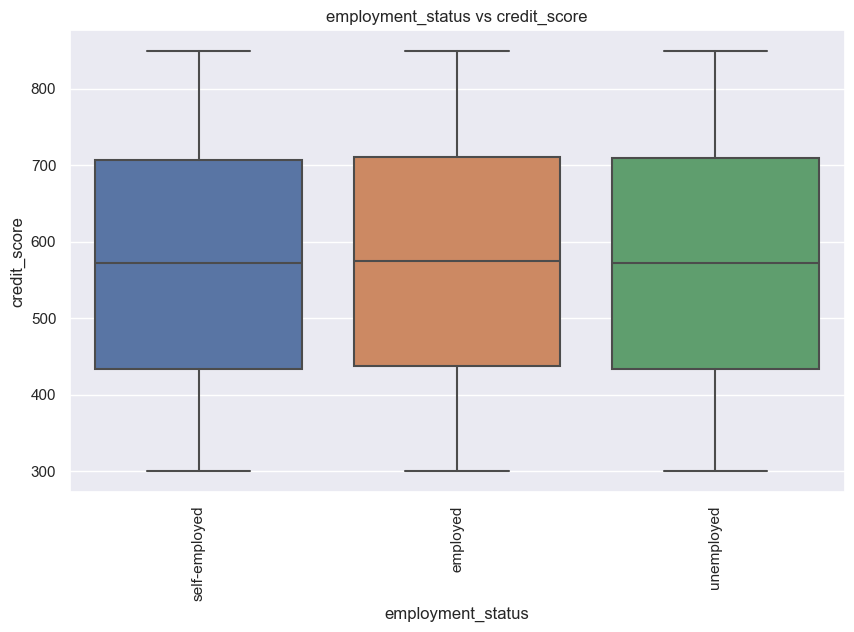

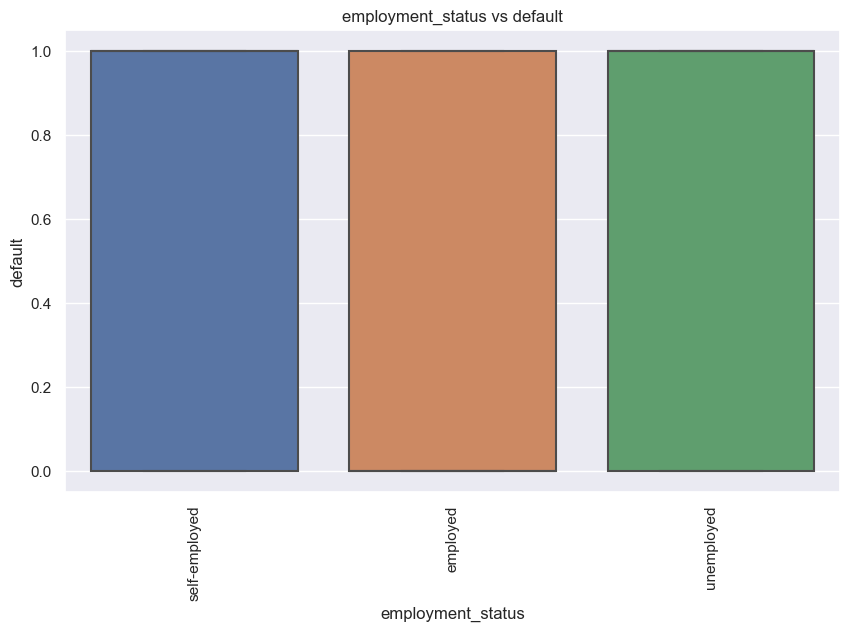

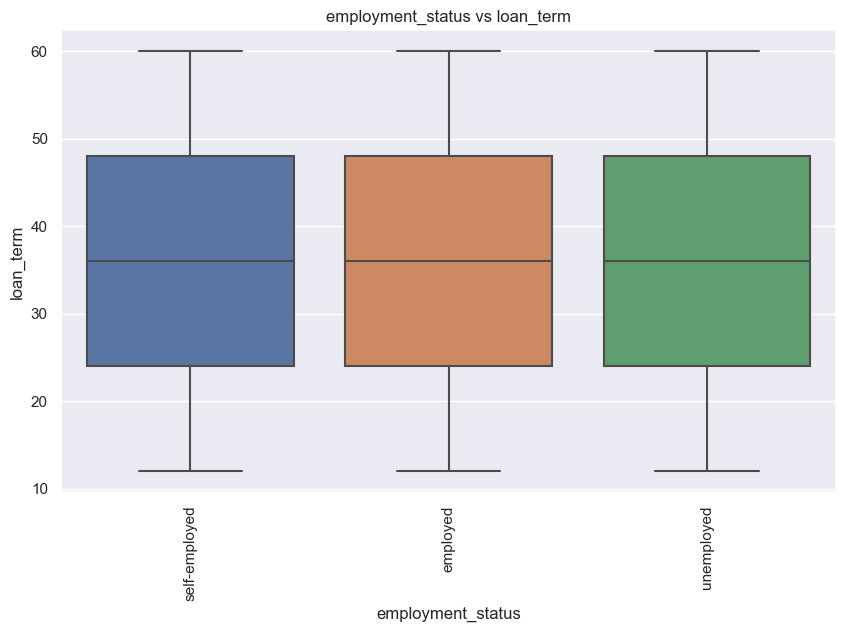

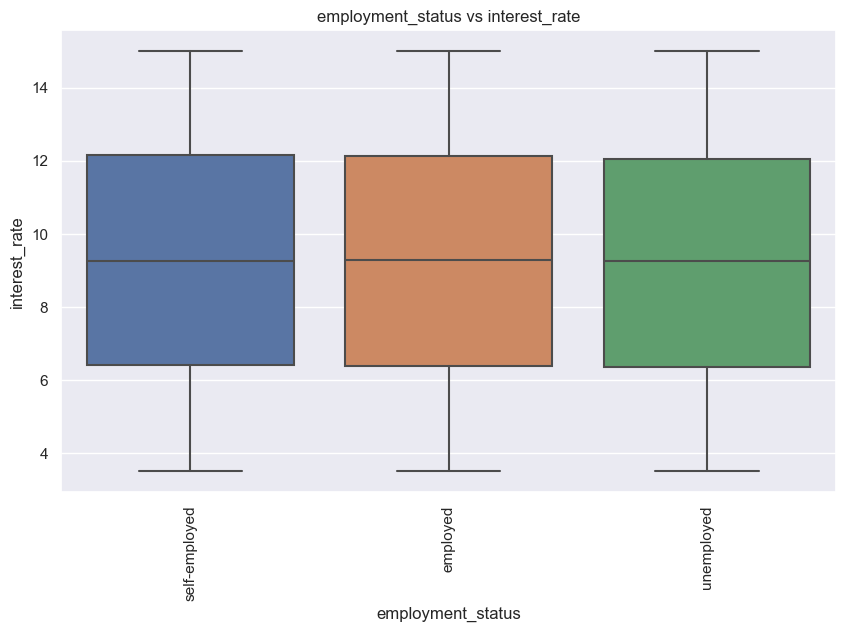

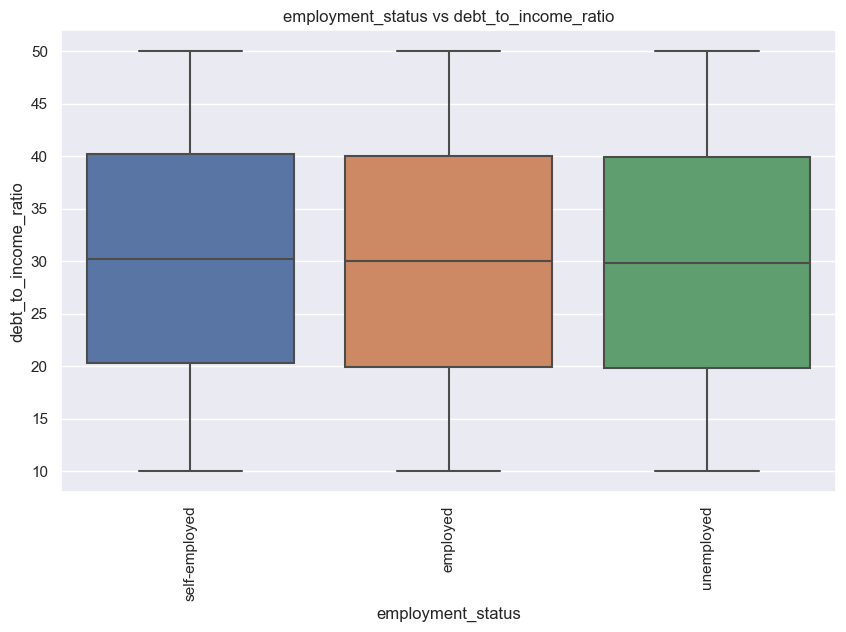

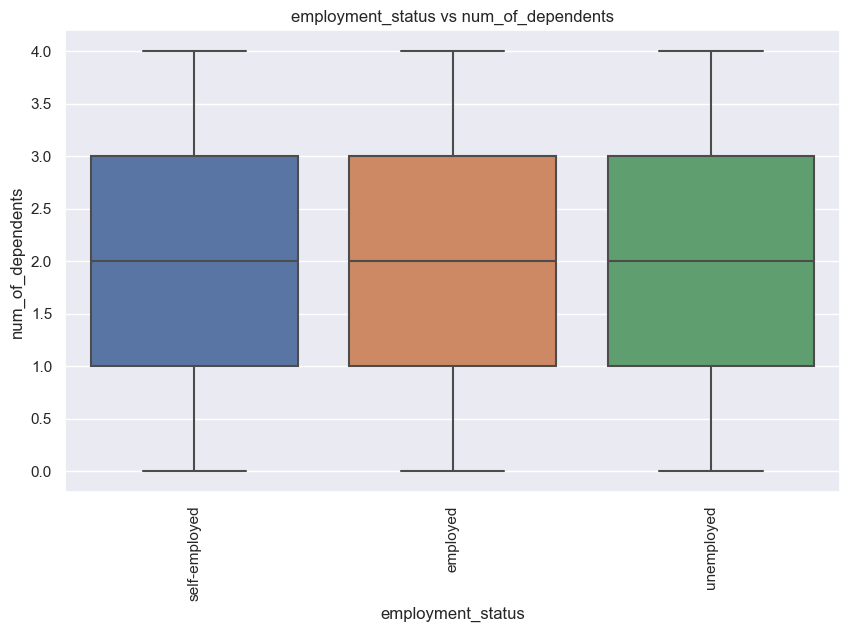

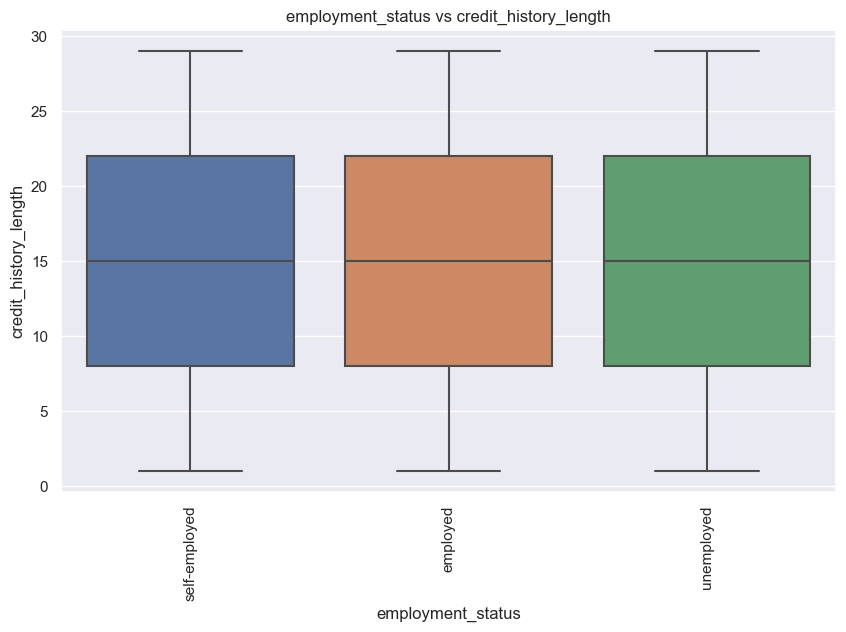

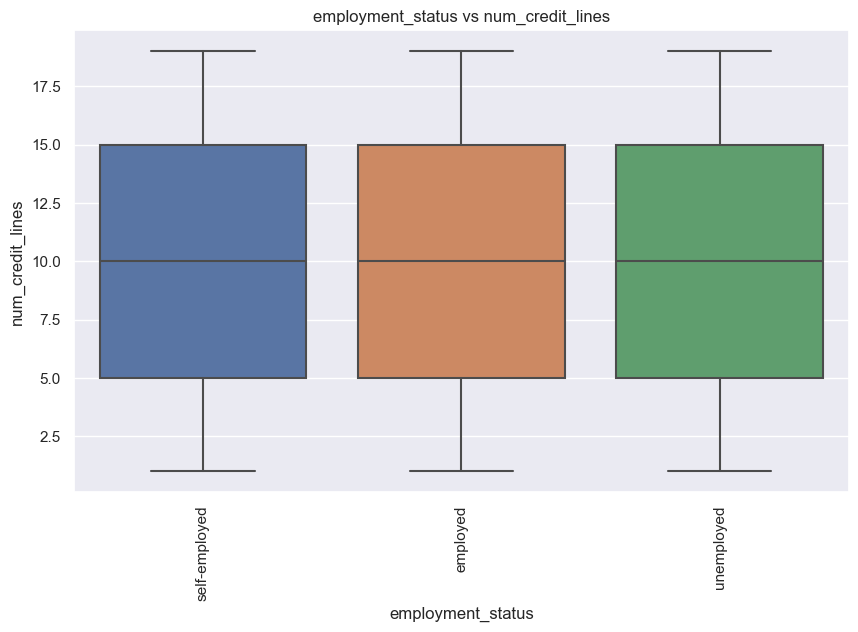

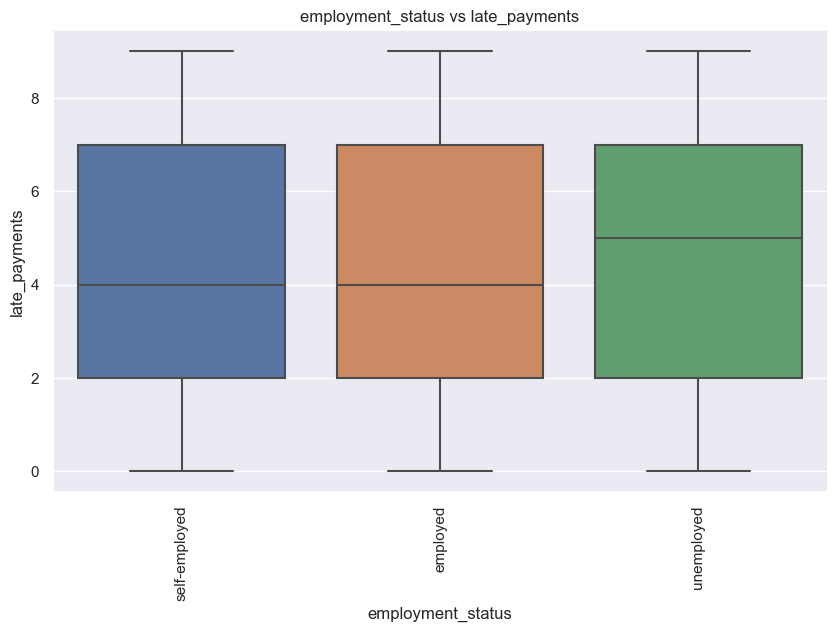

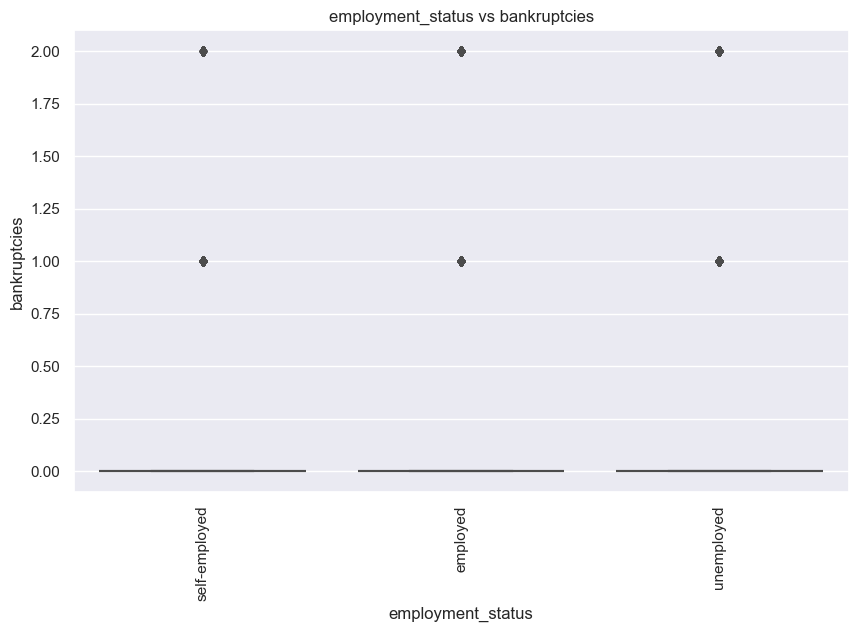

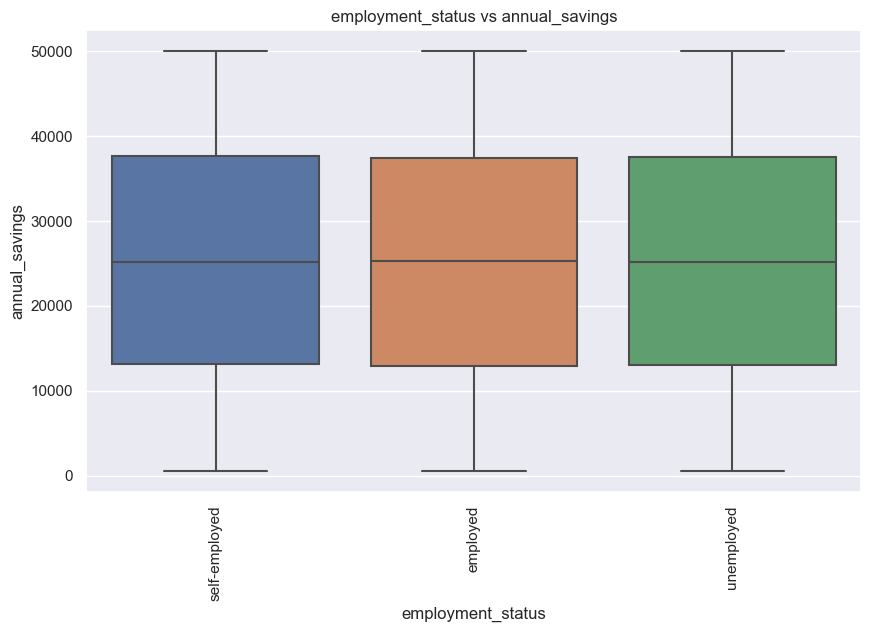

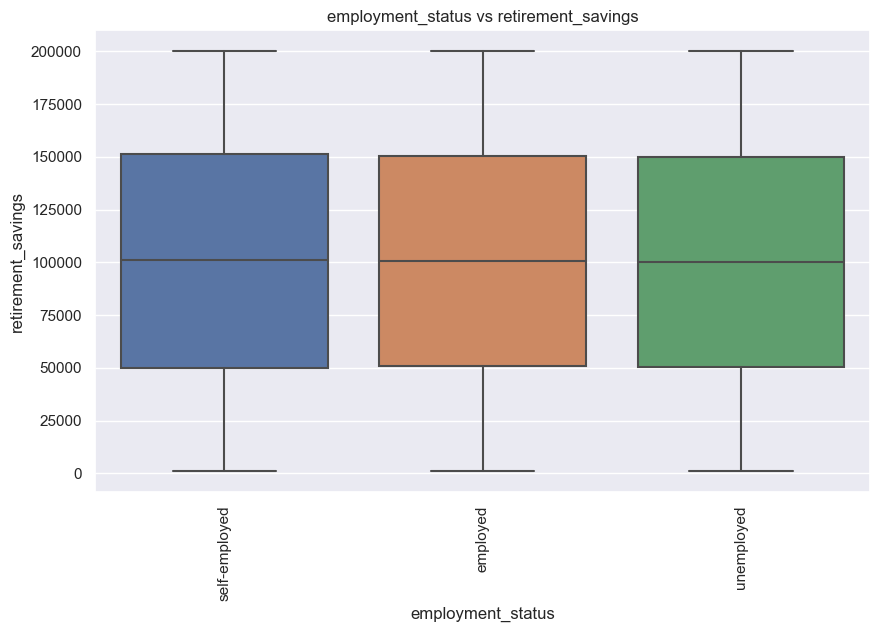

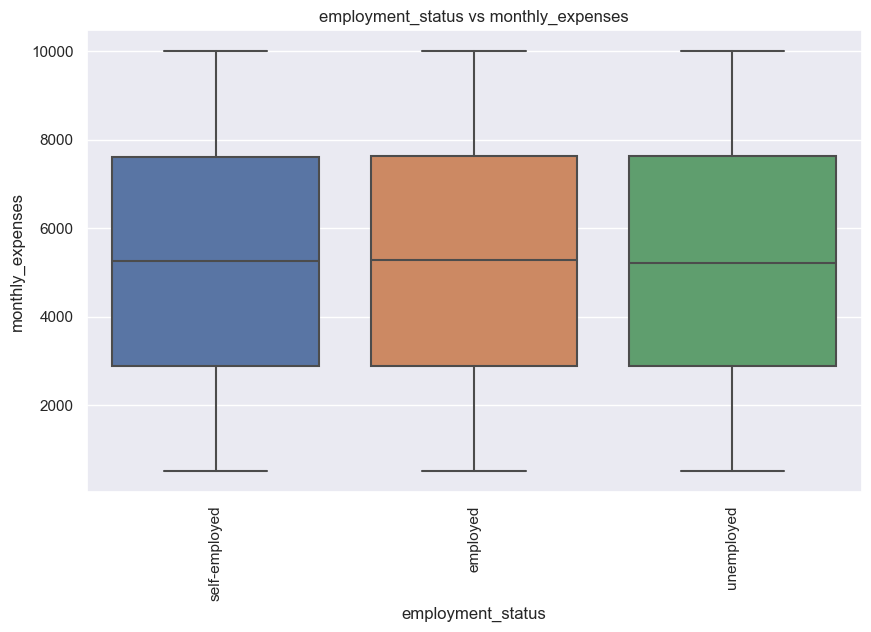

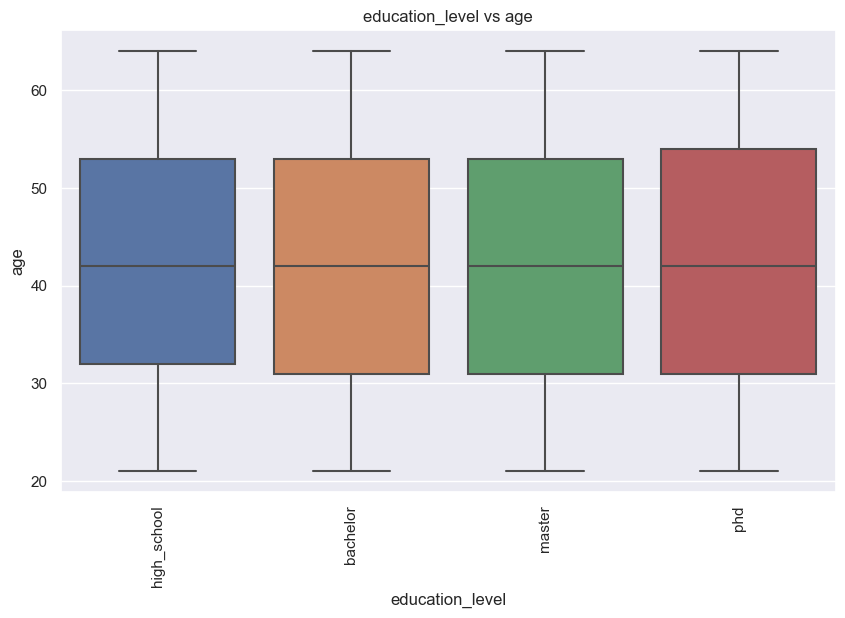

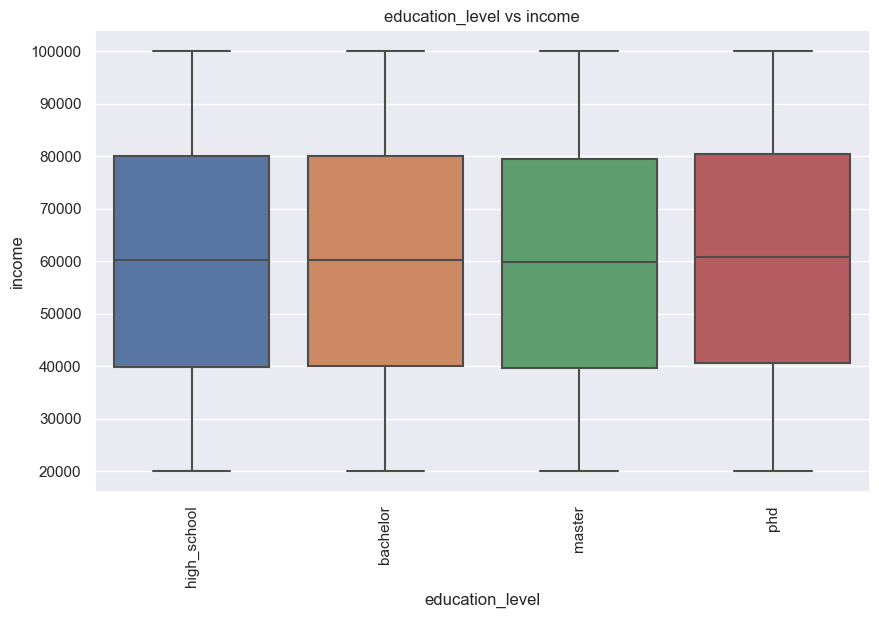

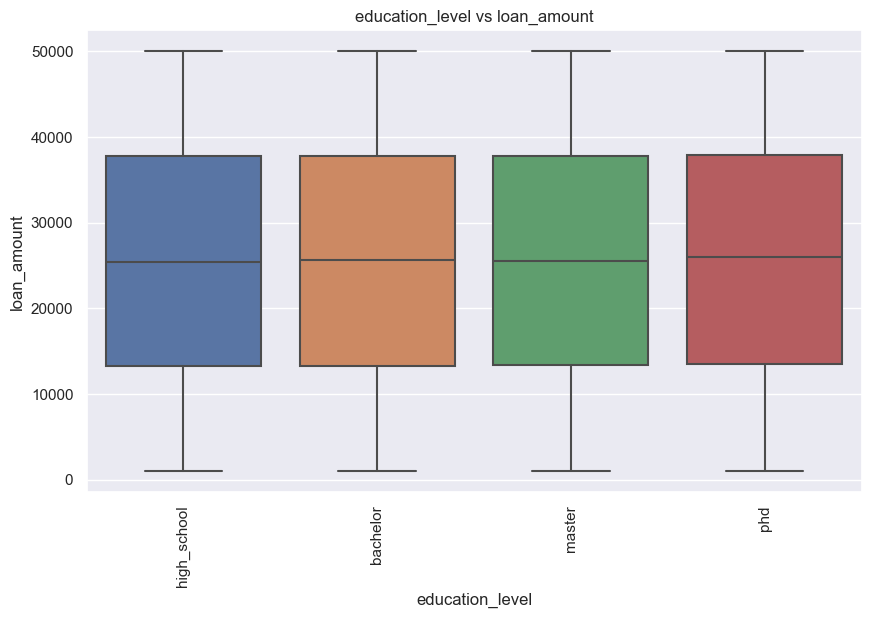

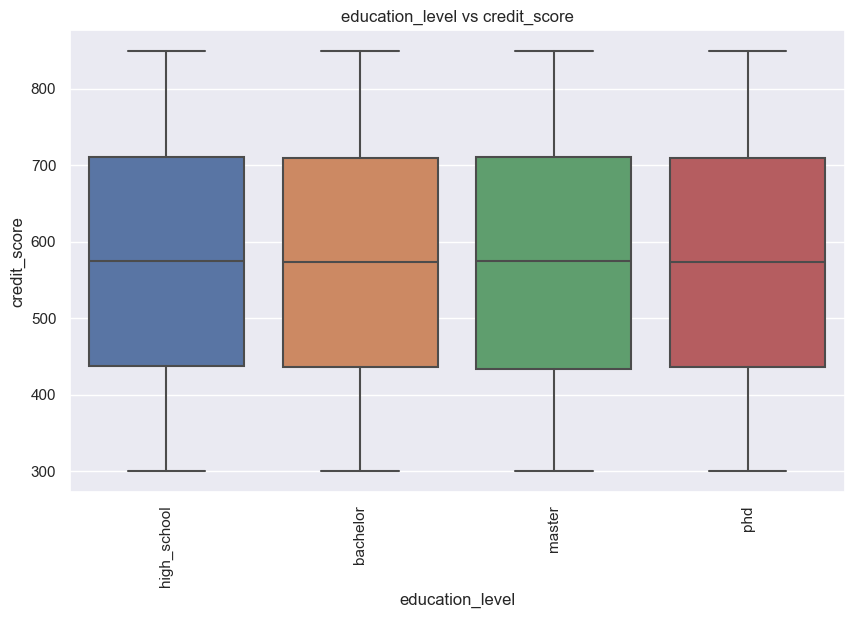

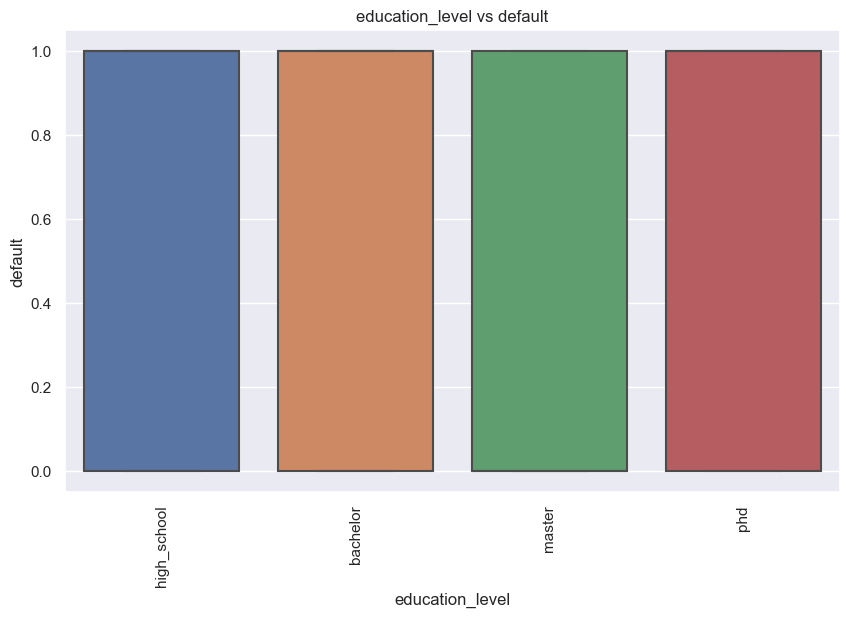

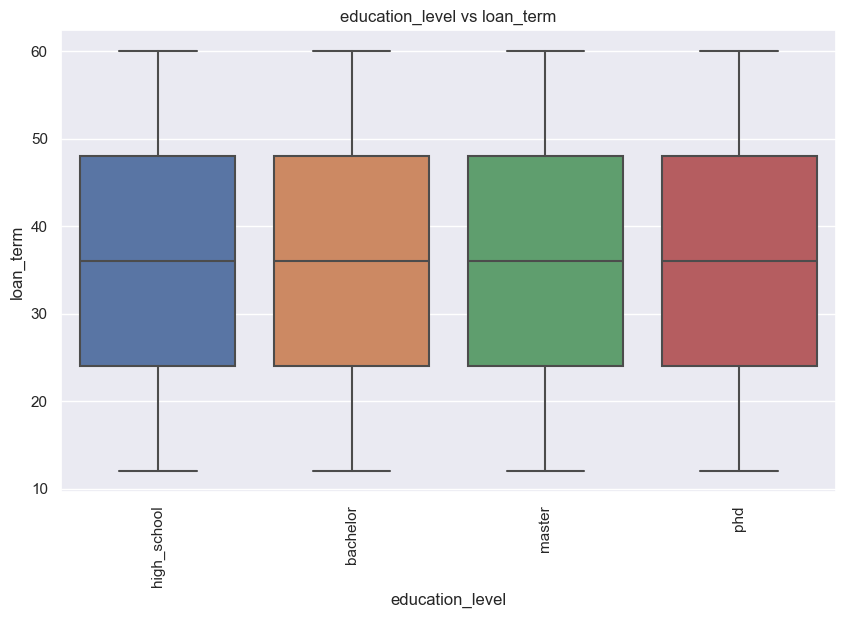

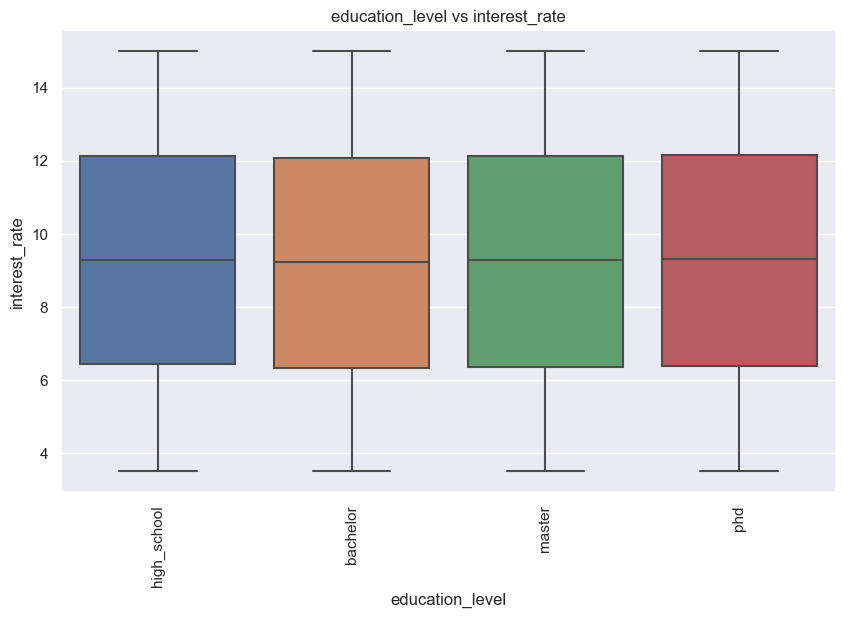

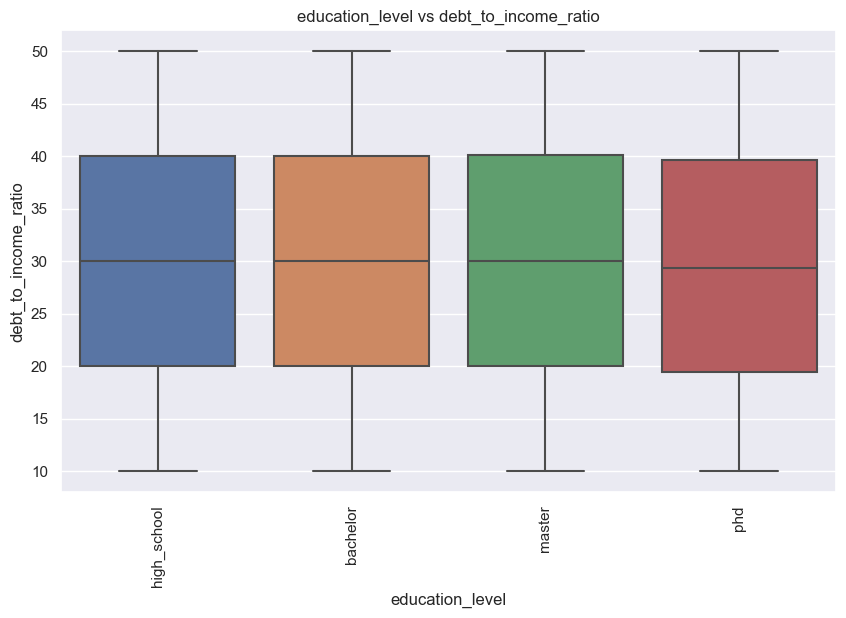

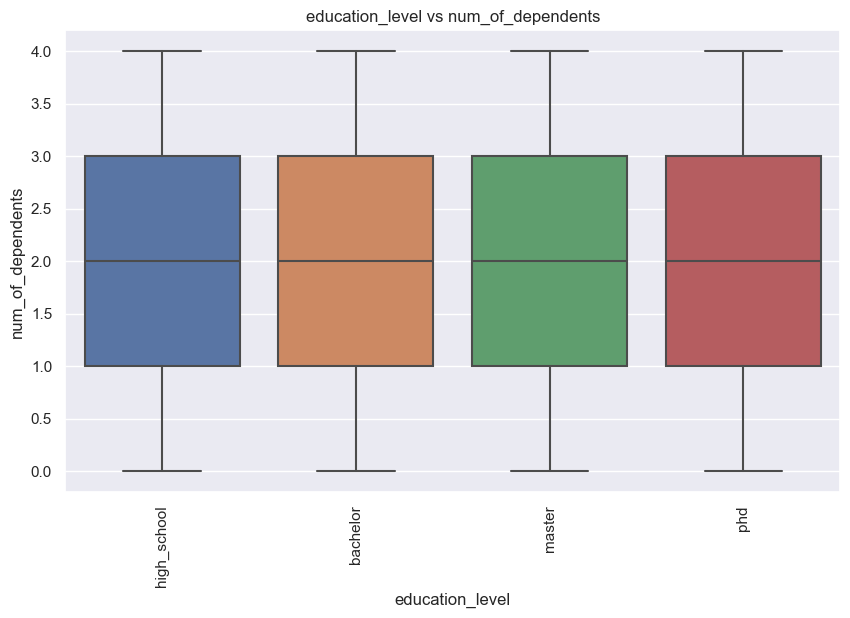

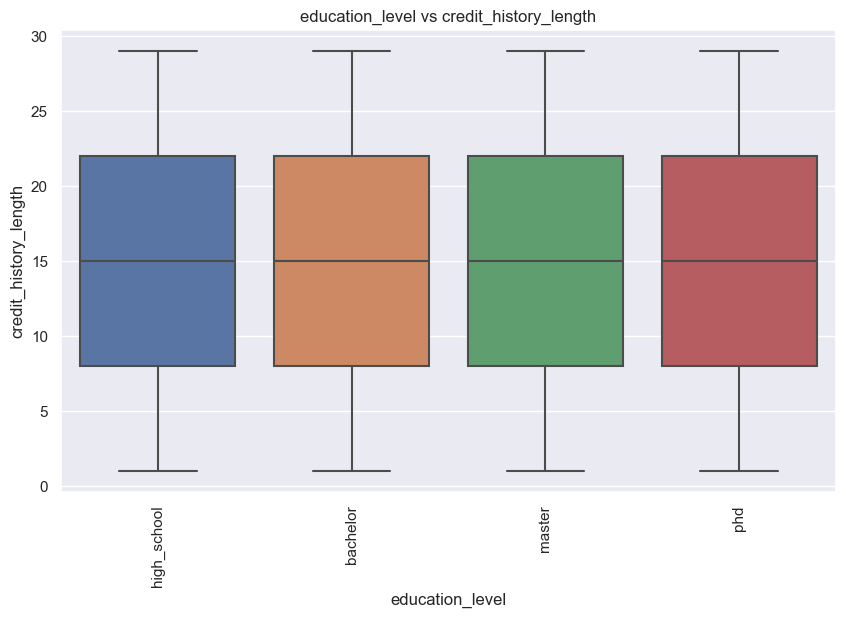

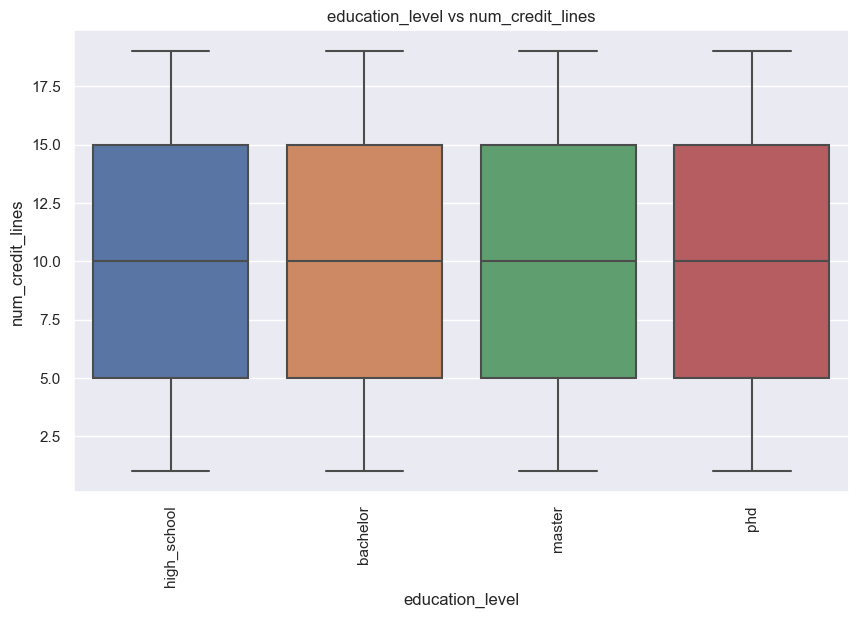

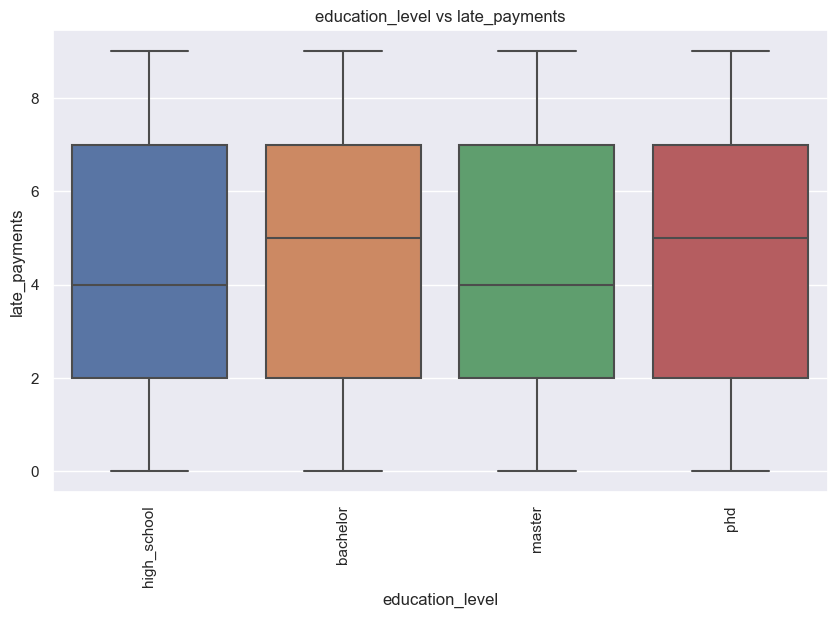

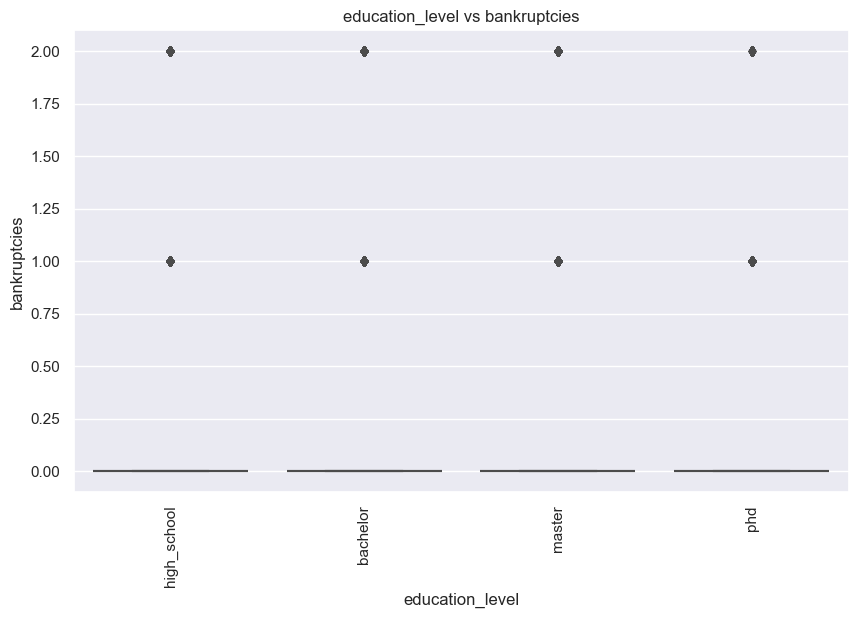

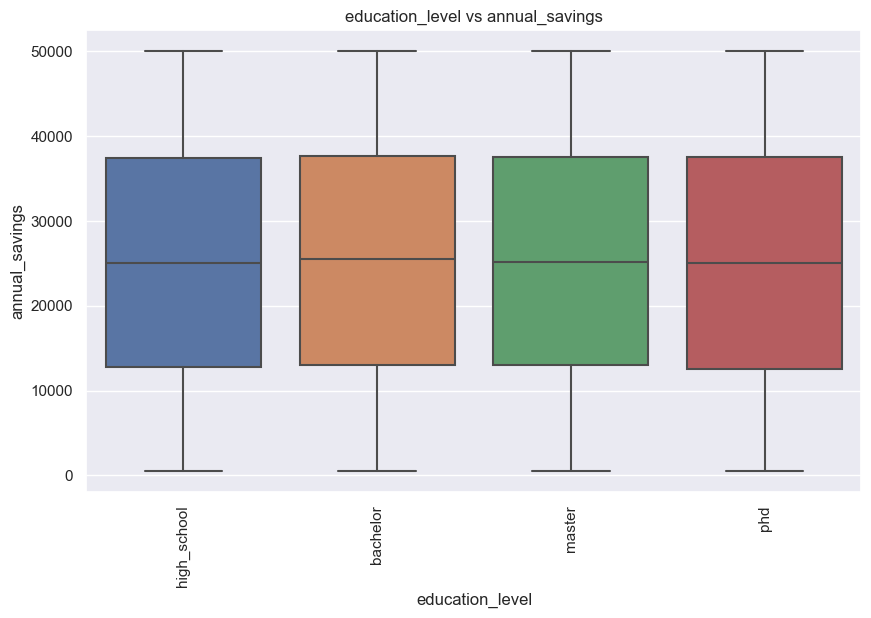

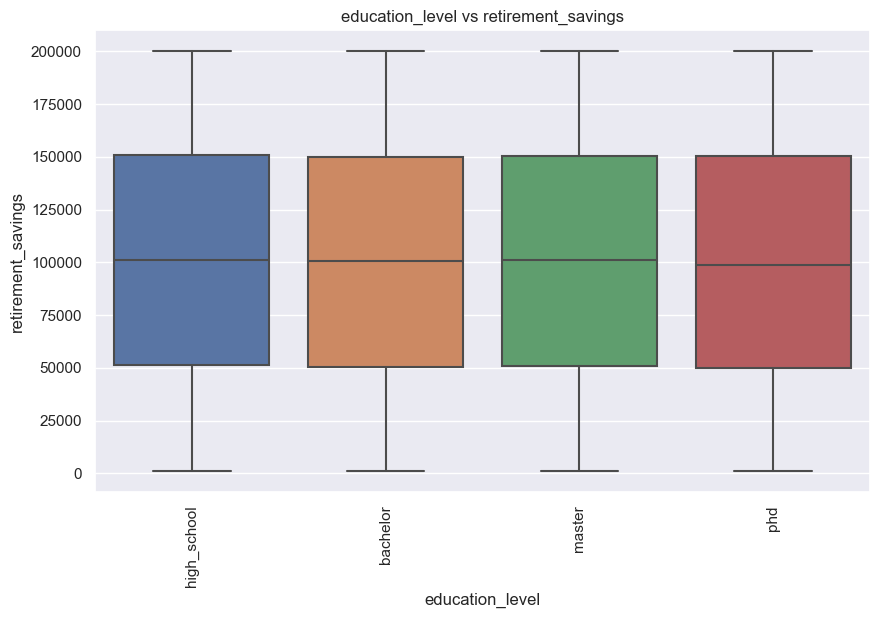

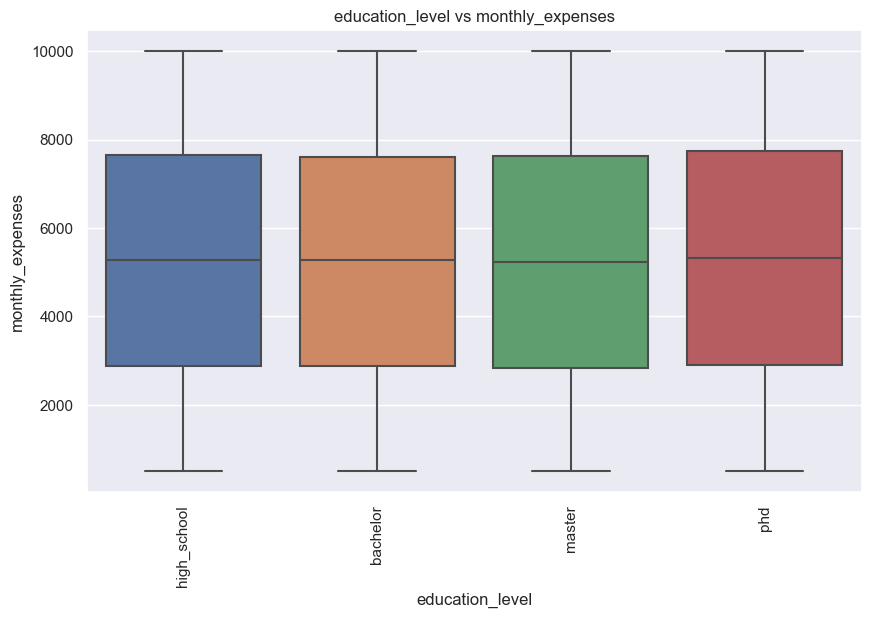

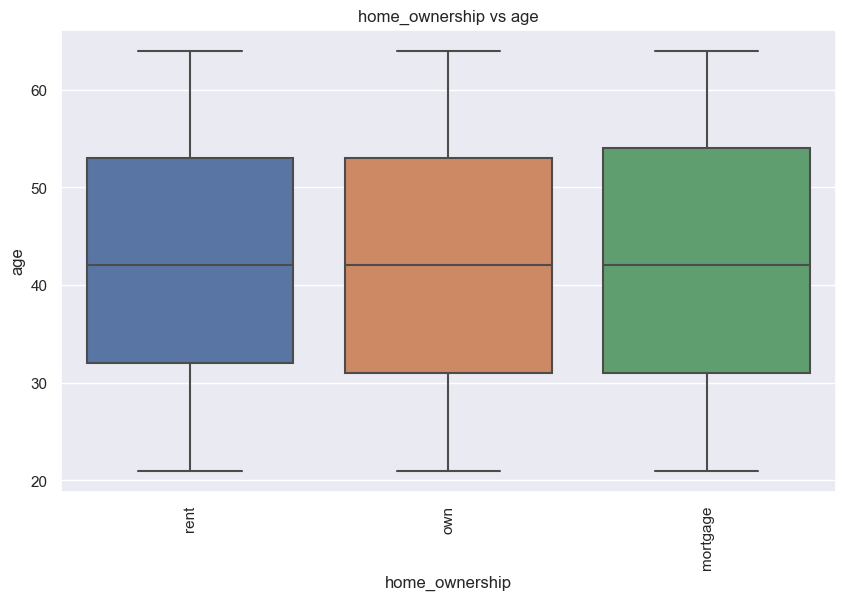

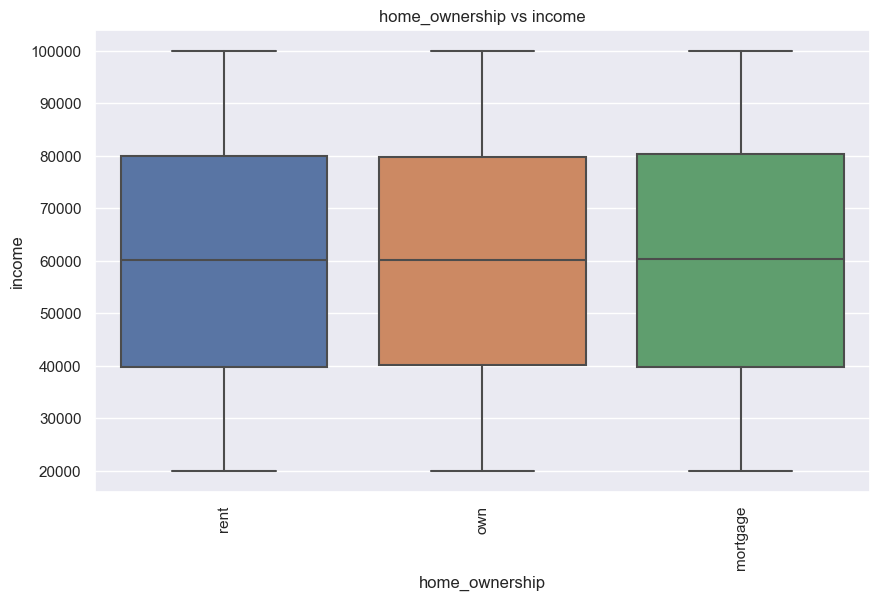

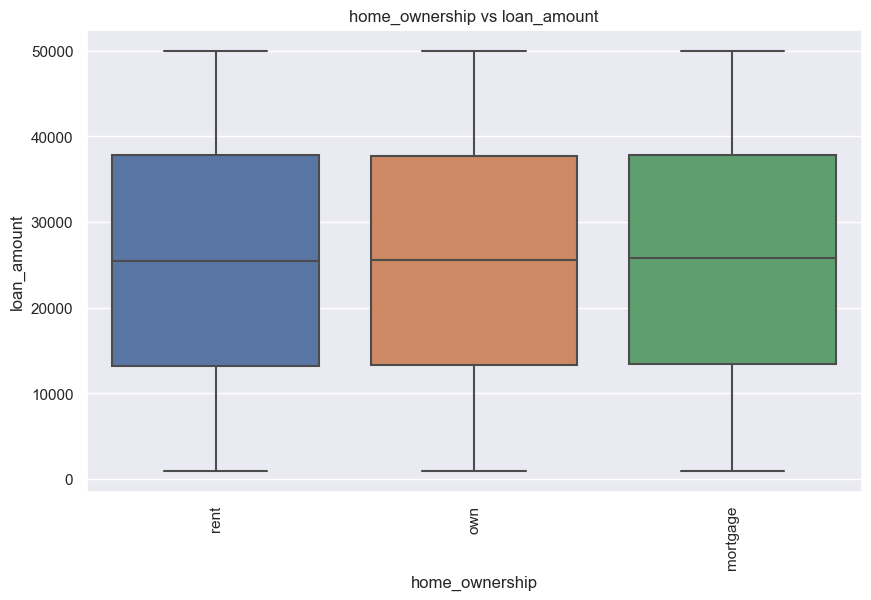

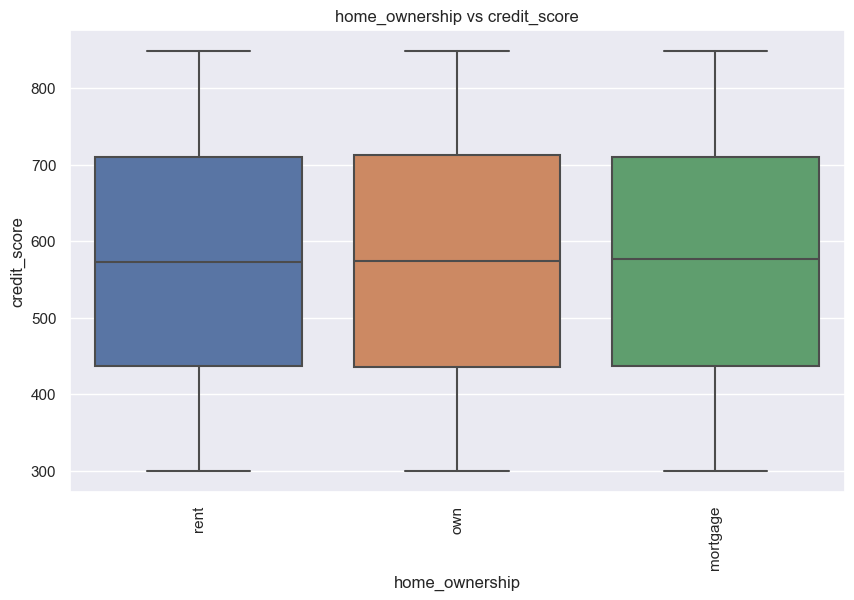

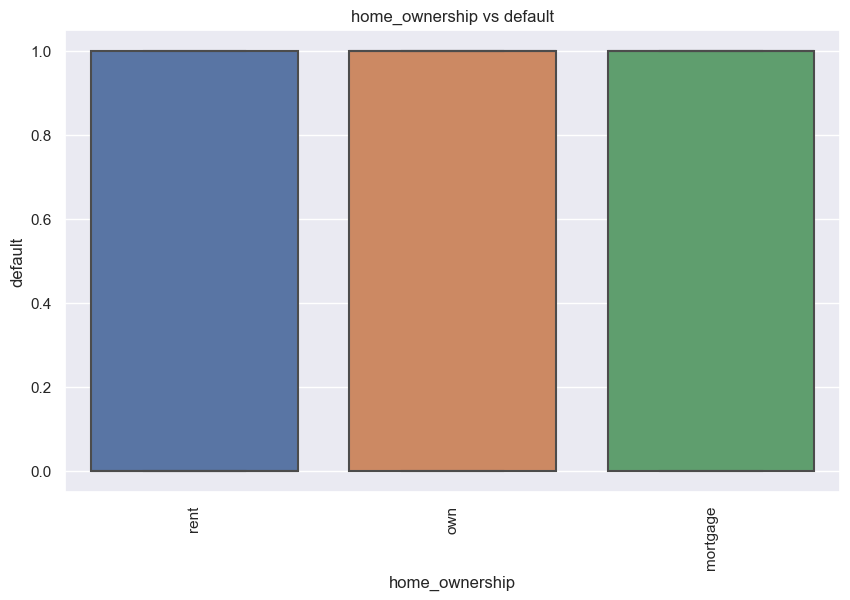

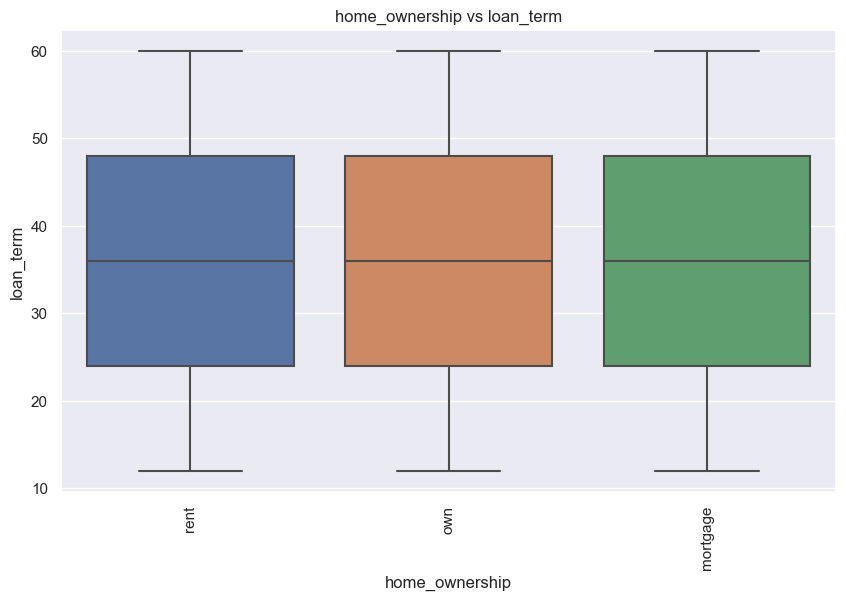

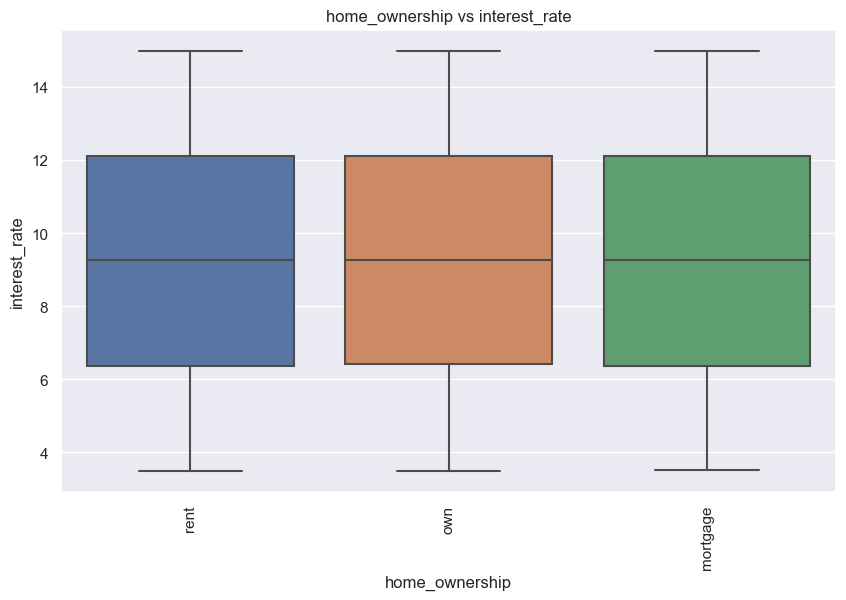

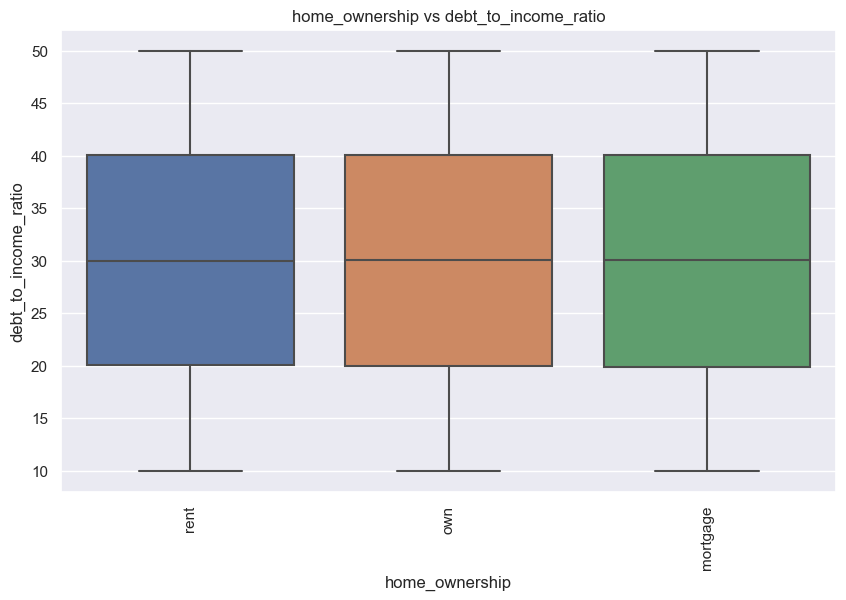

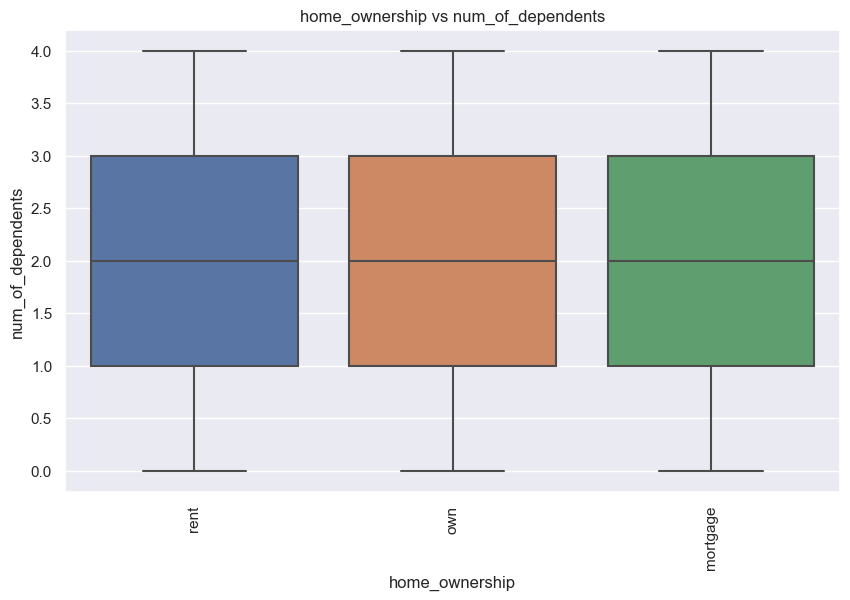

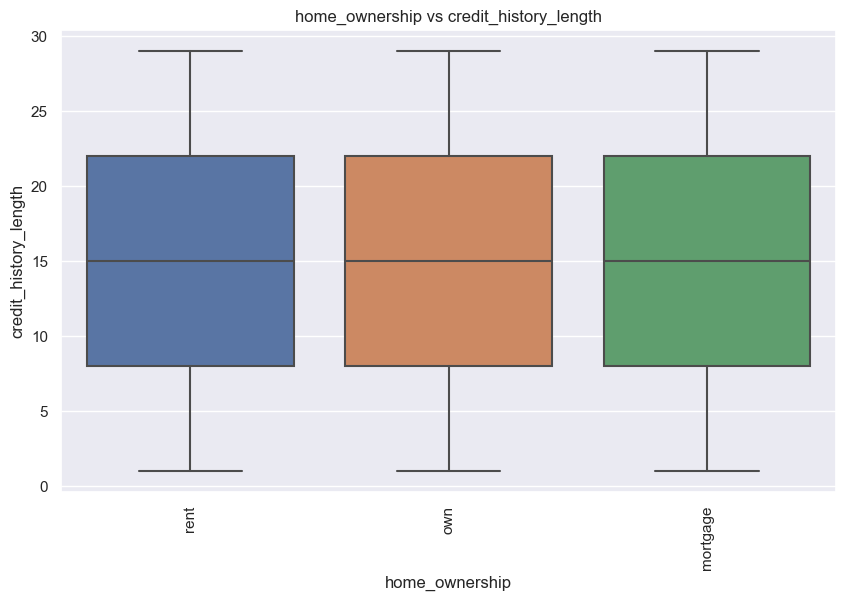

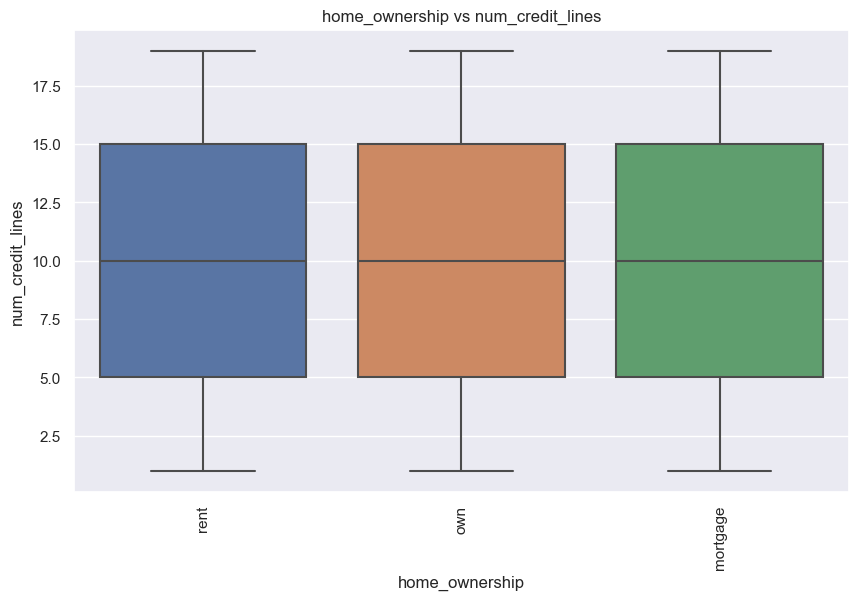

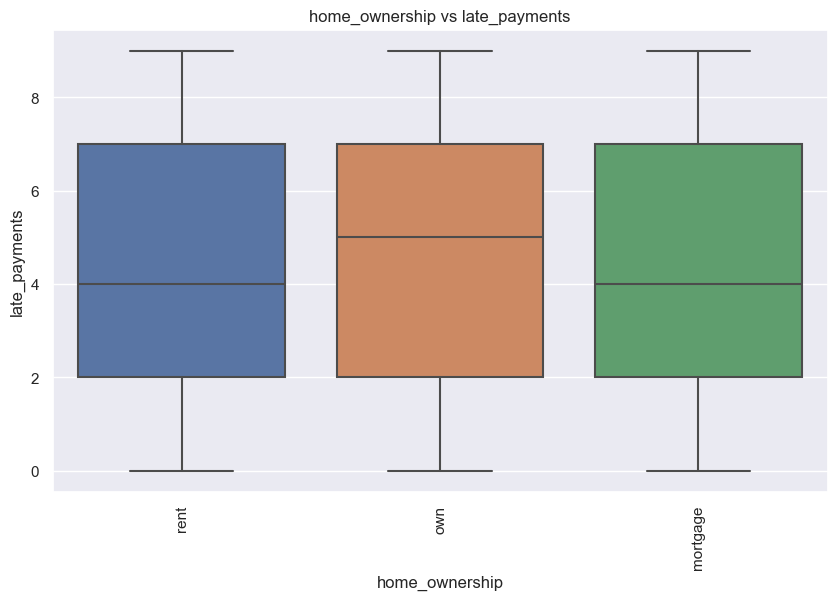

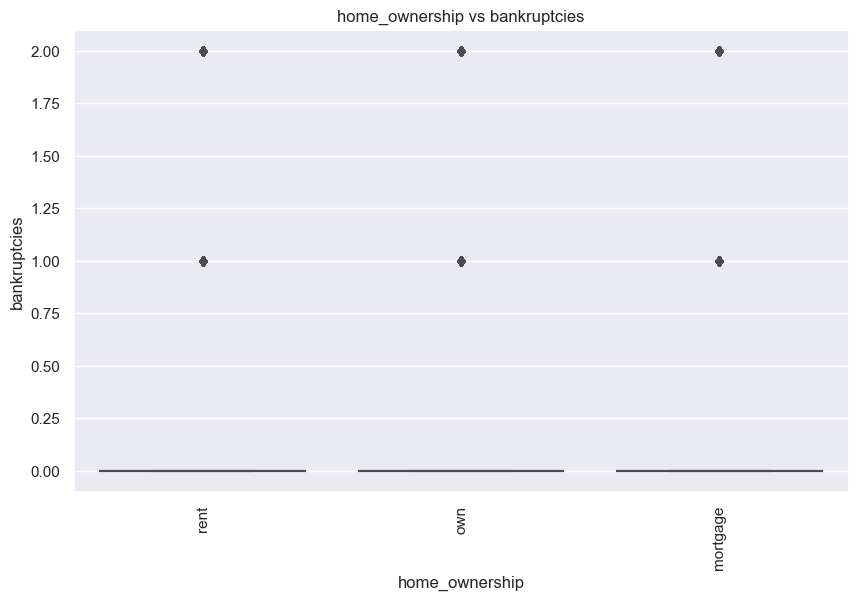

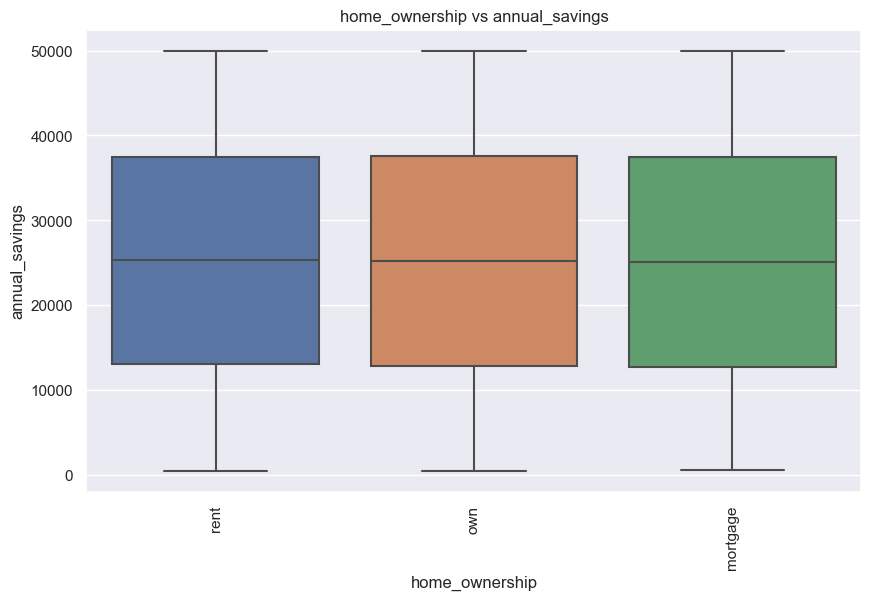

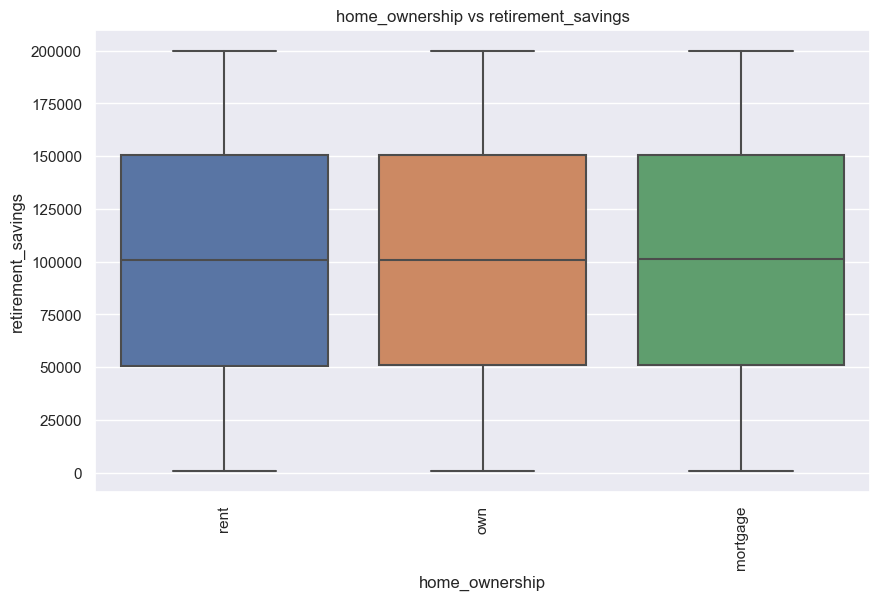

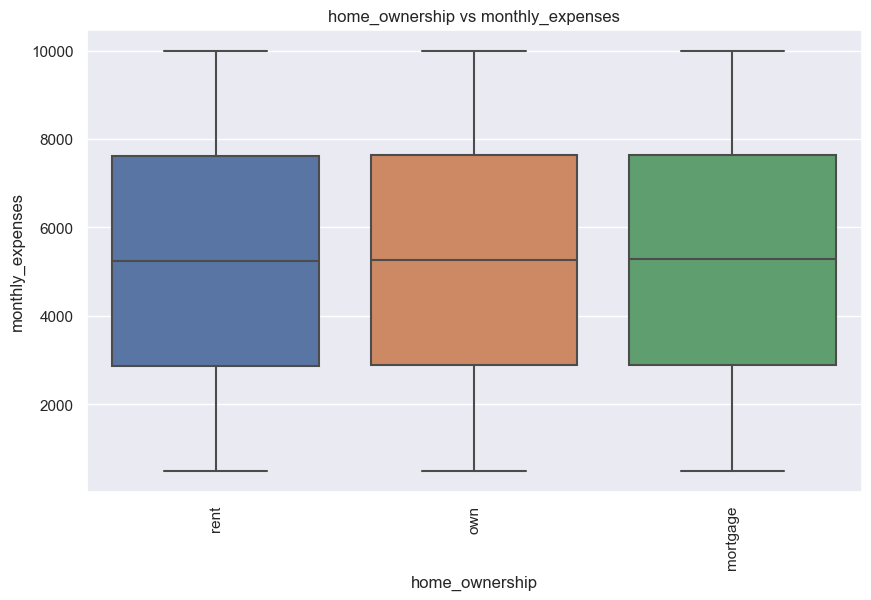

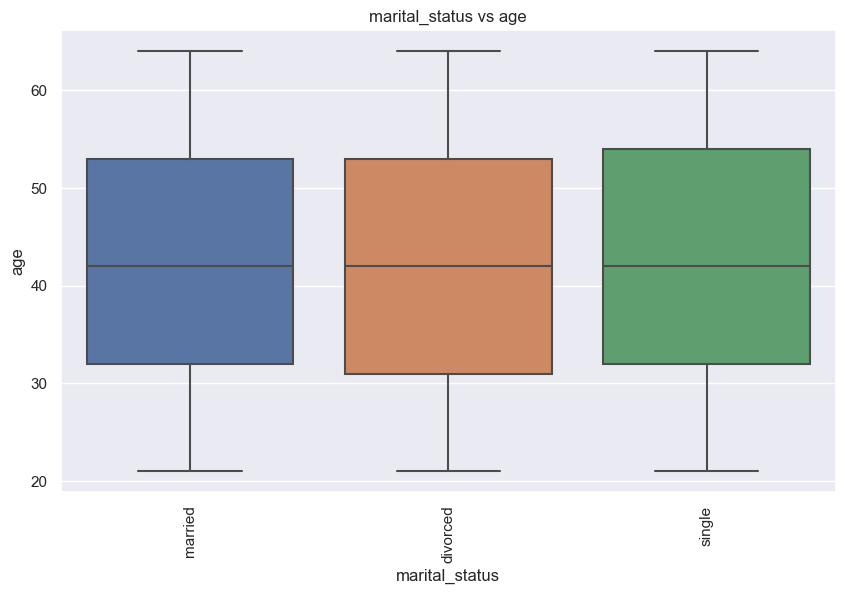

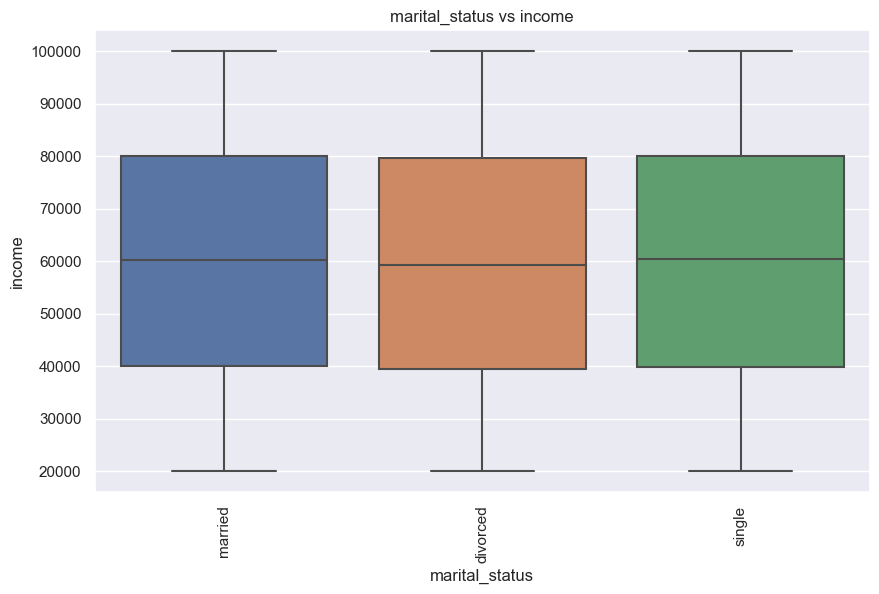

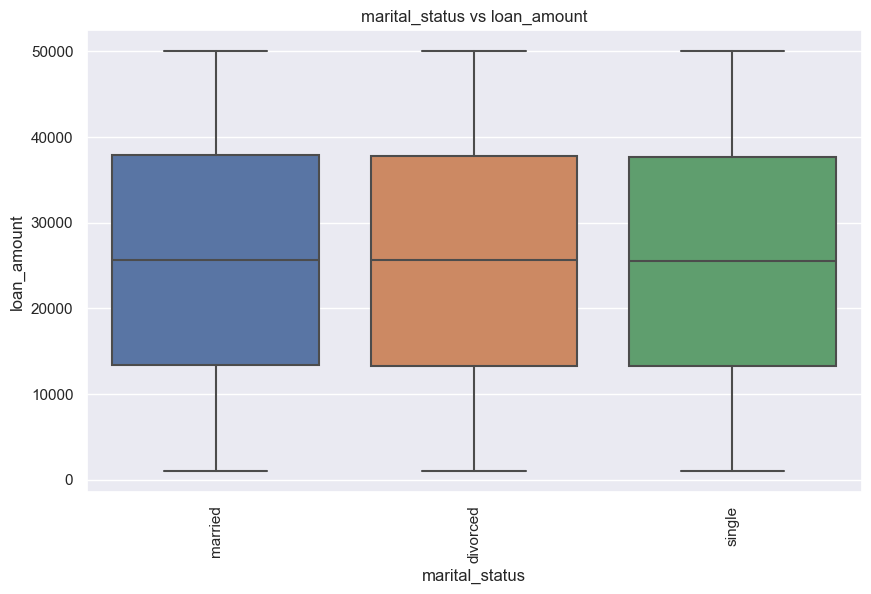

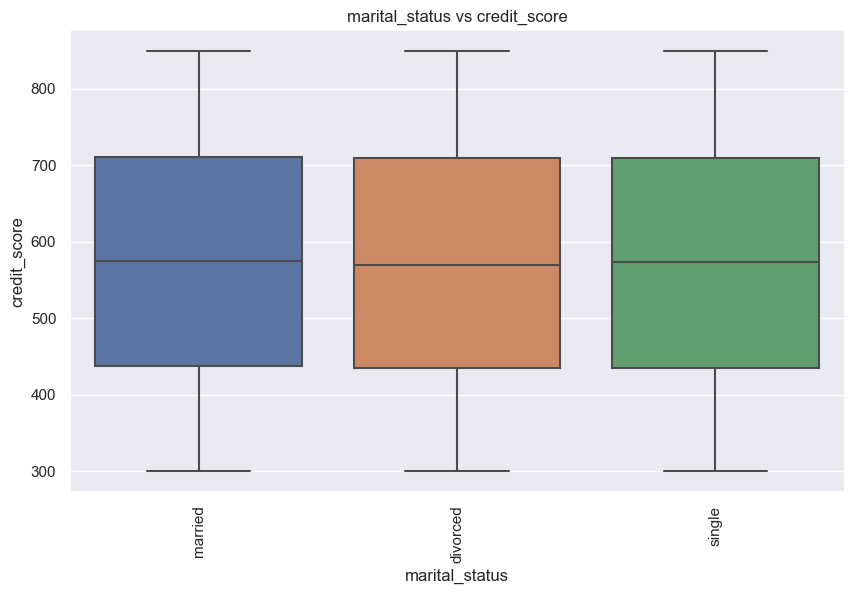

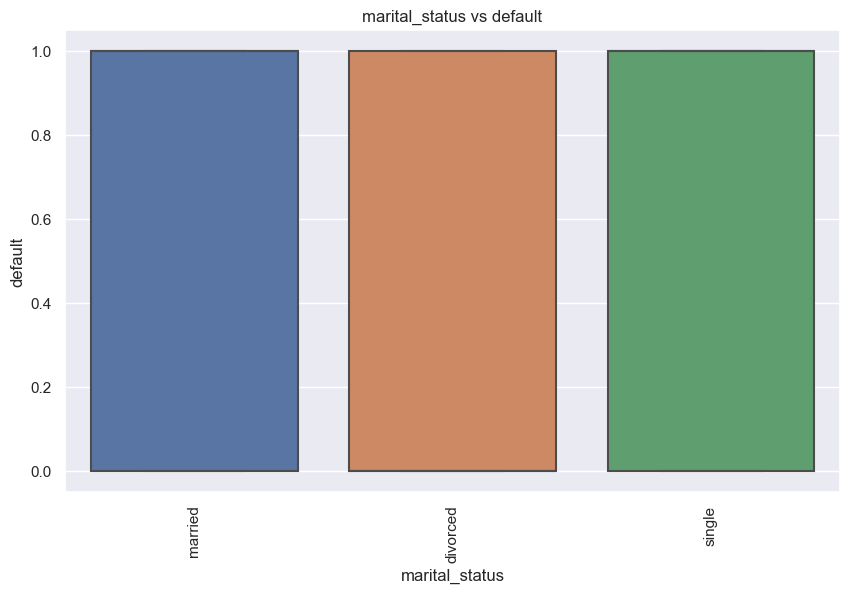

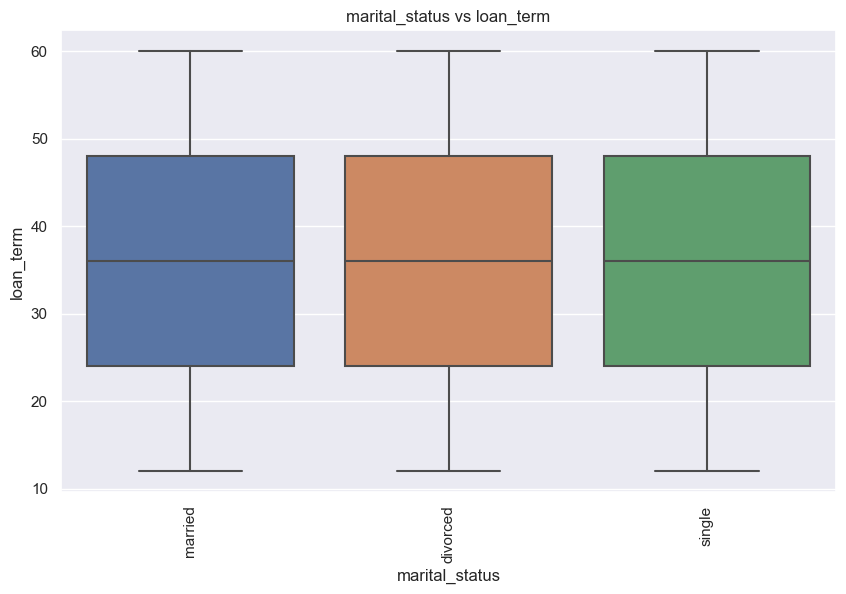

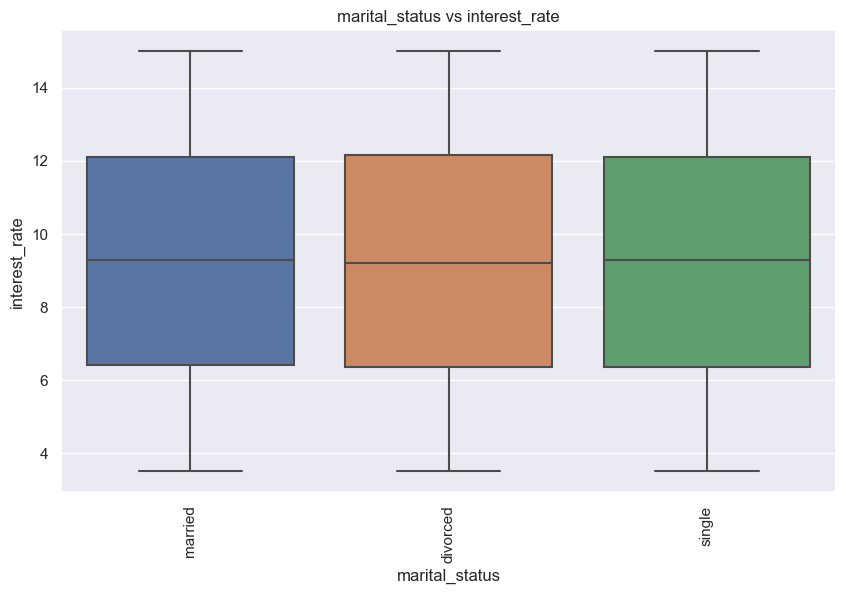

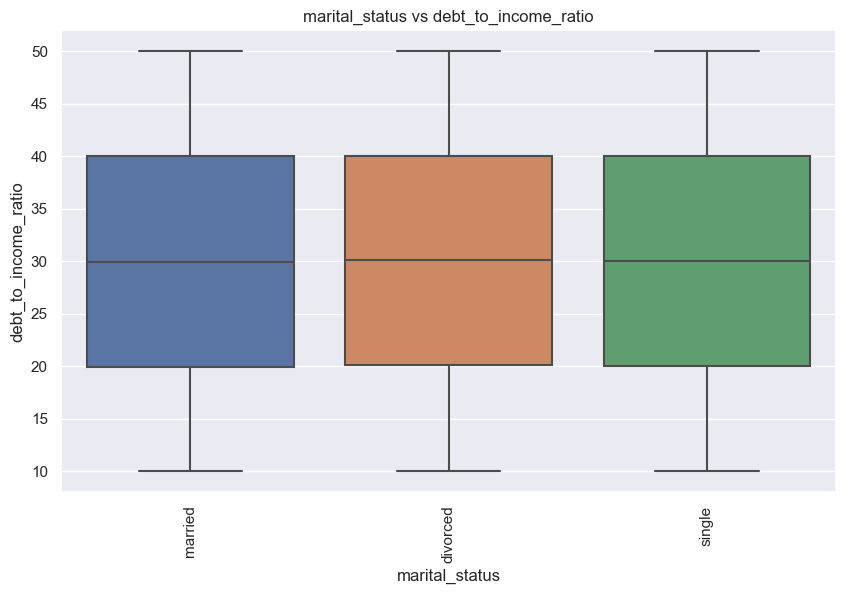

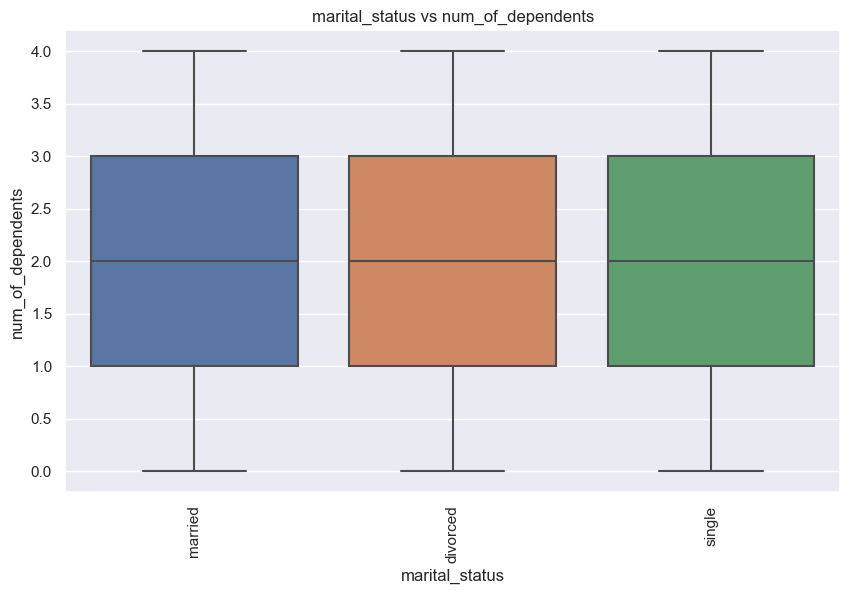

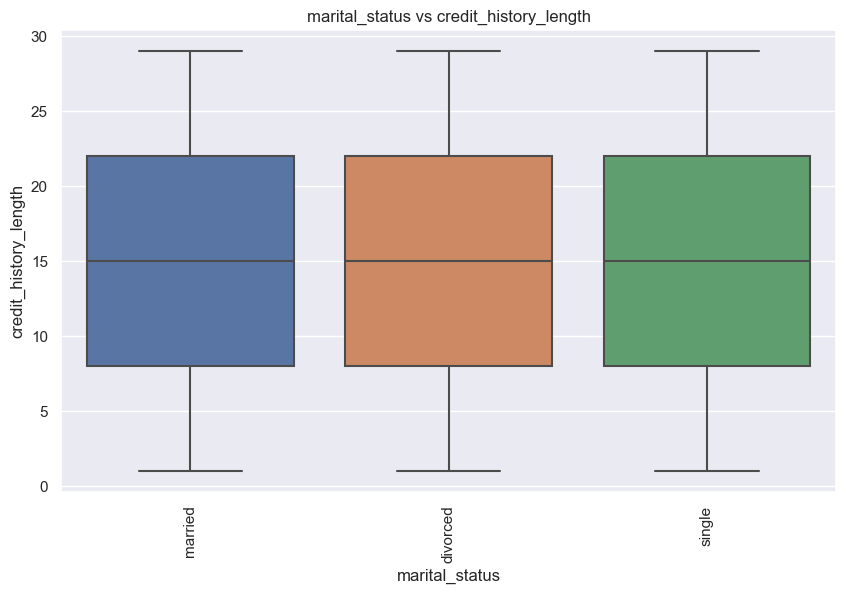

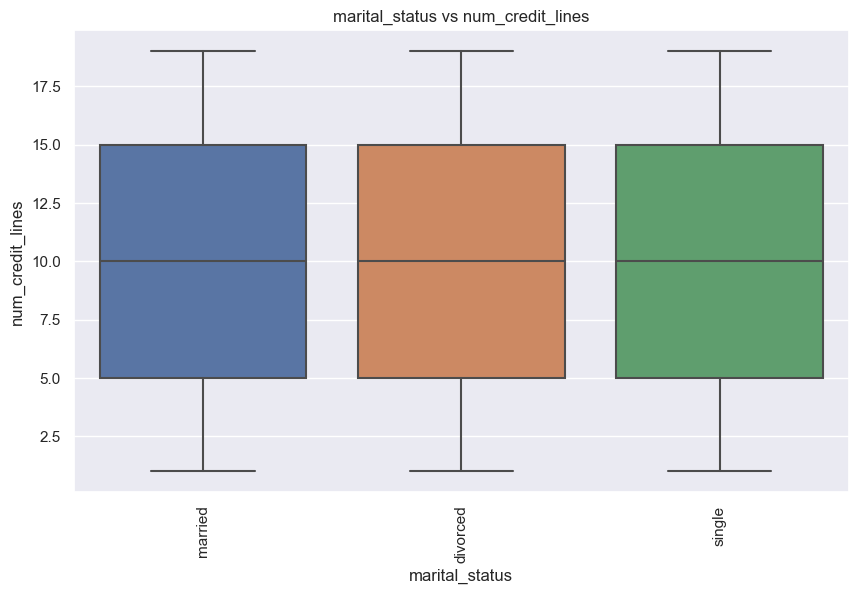

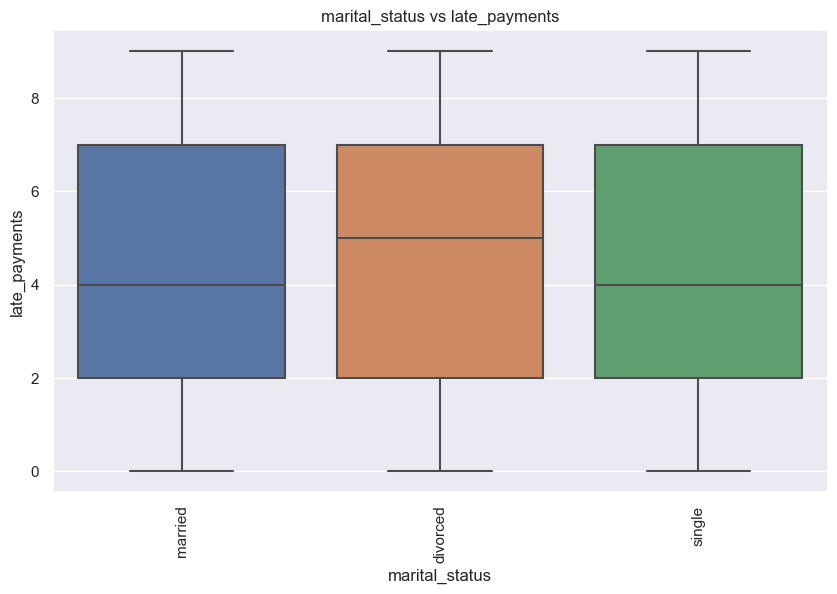

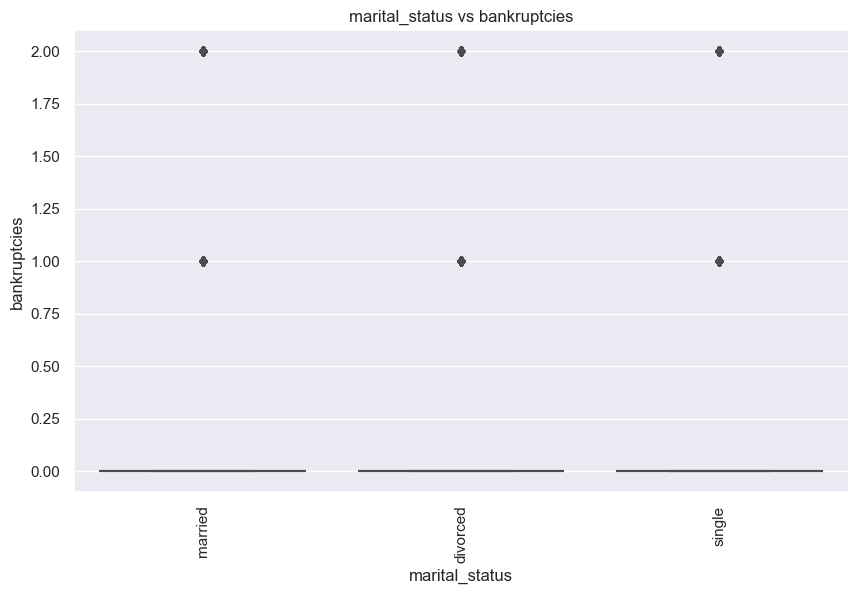

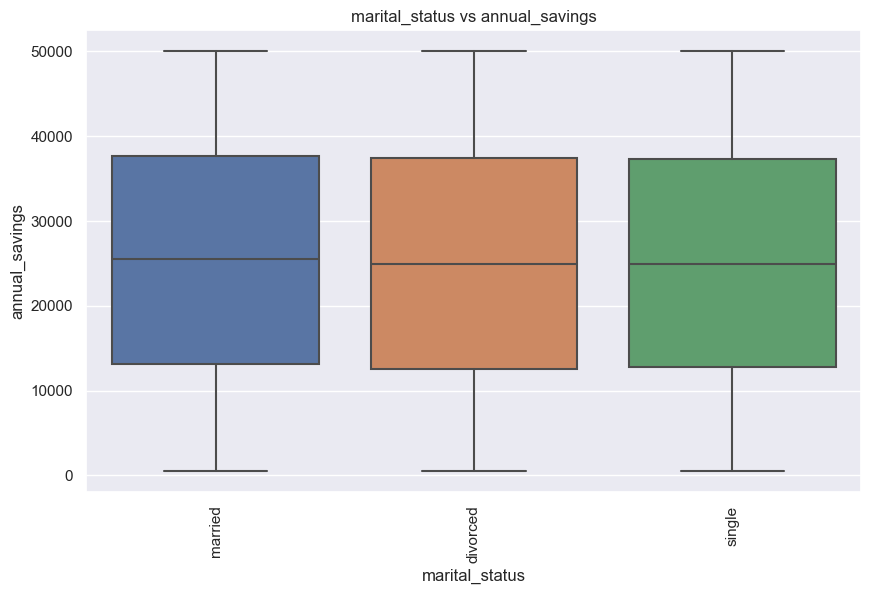

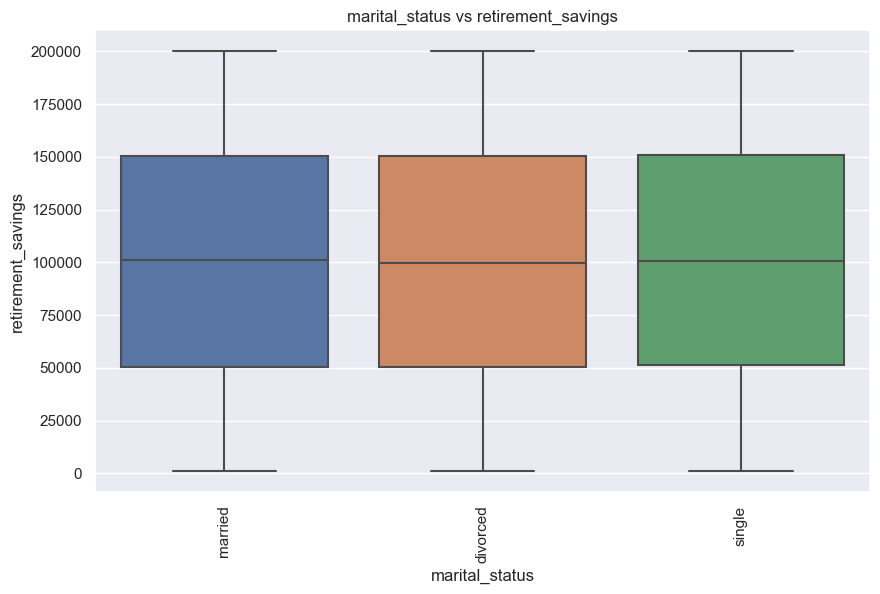

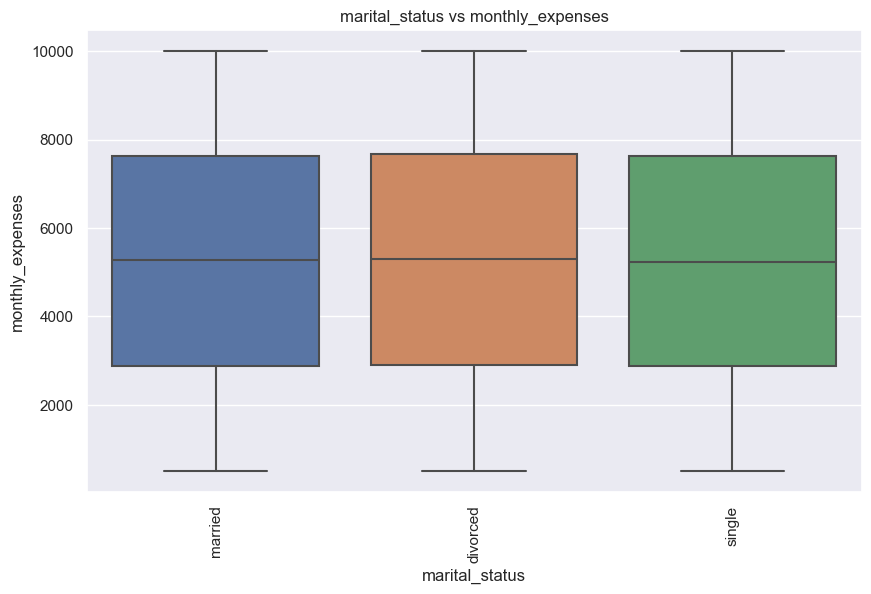

In [14]:
for dist in categorical_columns:
    for cont in numerical_columns:
        plt.figure(figsize=(10,6))
        ax=sns.boxplot(data=data,x=dist,y=cont)
        plt.title(f'{dist} vs {cont}')
        plt.xticks(rotation=90)
        plt.show()

# Data Preprocessing

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    100000 non-null  int64  
 1   income                 100000 non-null  int64  
 2   loan_amount            100000 non-null  int64  
 3   credit_score           100000 non-null  int64  
 4   employment_status      100000 non-null  object 
 5   default                100000 non-null  int64  
 6   loan_term              100000 non-null  int64  
 7   interest_rate          100000 non-null  float64
 8   debt_to_income_ratio   100000 non-null  float64
 9   num_of_dependents      100000 non-null  int64  
 10  education_level        100000 non-null  object 
 11  home_ownership         100000 non-null  object 
 12  marital_status         100000 non-null  object 
 13  credit_history_length  100000 non-null  int64  
 14  num_credit_lines       100000 non-nul

In [16]:
data.describe()

age         income    loan_amount   credit_score  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       42.462720   60012.224960   25519.561950     573.806760   
std        12.690258   23093.209173   14136.260198     158.581563   
min        21.000000   20000.000000    1000.000000     300.000000   
25%        31.000000   39935.750000   13311.750000     437.000000   
50%        42.000000   60175.000000   25583.000000     574.000000   
75%        53.000000   79991.000000   37771.000000     710.000000   
max        64.000000   99998.000000   49999.000000     849.000000   

             default      loan_term  interest_rate  debt_to_income_ratio  \
count  100000.000000  100000.000000  100000.000000         100000.000000   
mean        0.500940      36.025560       9.254996             29.995874   
std         0.500002      16.964051       3.318369             11.563967   
min         0.000000      12.000000       3.500245             10.000275   
25%         0.000000      24.000000       6.377951             19.973035   
50%         1.000000      36.000000       9.269498             30.007073   
75%         1.000000      48.000000      12.113304             40.034245   
max         1.000000      60.000000      14.999895             49.999915   

       num_of_dependents  credit_history_length  num_credit_lines  \
count      100000.000000          100000.000000     100000.000000   
mean            1.997350              14.975920         10.012660   
std             1.417576               8.369603          5.470983   
min             0.000000               1.000000          1.000000   
25%             1.000000               8.000000          5.000000   
50%             2.000000              15.000000         10.000000   
75%             3.000000              22.000000         15.000000   
max             4.000000              29.000000         19.000000   

       late_payments   bankruptcies  annual_savings  retirement_savings  \
count  100000.000000  100000.000000   100000.000000       100000.000000   
mean        4.492340       0.059720    25221.936980       100743.644020   
std         2.872665       0.276973    14258.782992        57459.490883   
min         0.000000       0.000000      500.000000         1002.000000   
25%         2.000000       0.000000    12912.750000        50855.500000   
50%         4.000000       0.000000    25230.500000       100694.500000   
75%         7.000000       0.000000    37514.000000       150403.750000   
max         9.000000       2.000000    49999.000000       199997.000000   

       monthly_expenses  
count     100000.000000  
mean        5253.344490  
std         2740.027792  
min          500.000000  
25%         2874.750000  
50%         5263.000000  
75%         7631.000000  
max         9999.000000

In [17]:
data.isnull().sum()

age                      0
income                   0
loan_amount              0
credit_score             0
employment_status        0
default                  0
loan_term                0
interest_rate            0
debt_to_income_ratio     0
num_of_dependents        0
education_level          0
home_ownership           0
marital_status           0
credit_history_length    0
num_credit_lines         0
late_payments            0
bankruptcies             0
annual_savings           0
retirement_savings       0
monthly_expenses         0
dtype: int64

In [18]:
data.duplicated().sum()

0

In [25]:
data.nunique()

age                          44
income                    57091
loan_amount               42620
credit_score                550
employment_status             3
default                       2
loan_term                     5
interest_rate             99997
debt_to_income_ratio     100000
num_of_dependents             5
education_level               4
home_ownership                3
marital_status                3
credit_history_length        29
num_credit_lines             19
late_payments                10
bankruptcies                  3
annual_savings            42976
retirement_savings        78546
monthly_expenses           9499
dtype: int64

# Dealing with Outliers

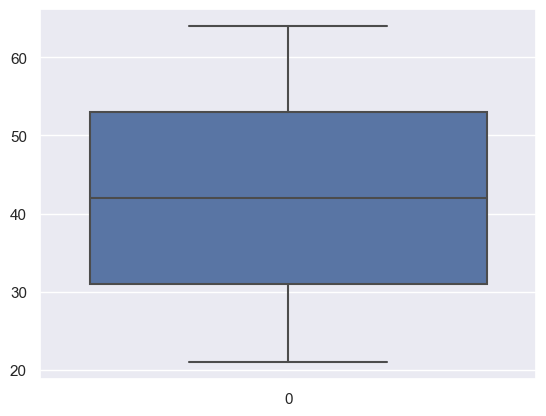

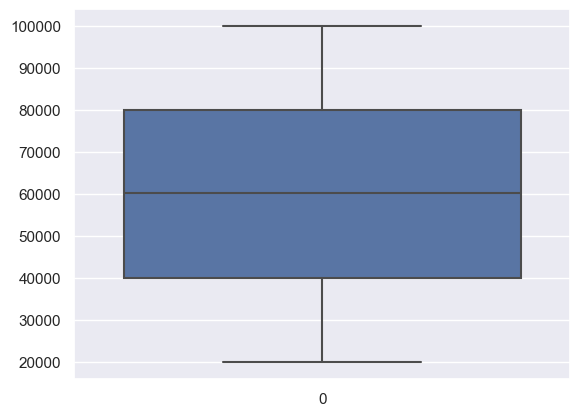

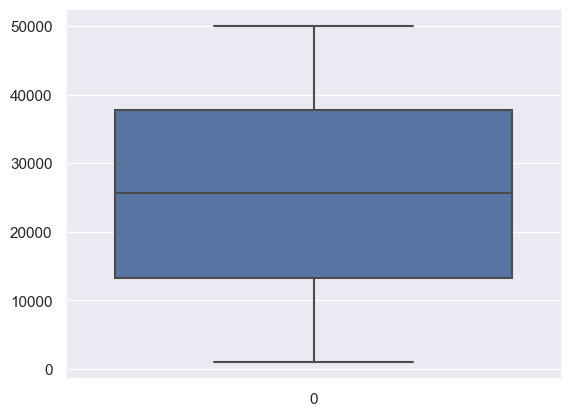

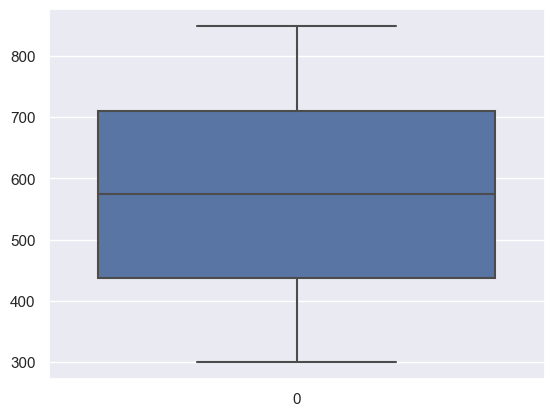

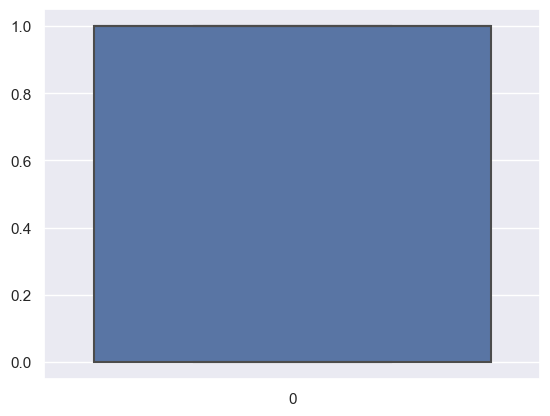

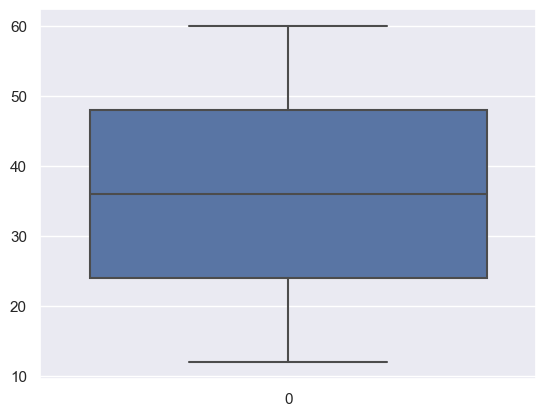

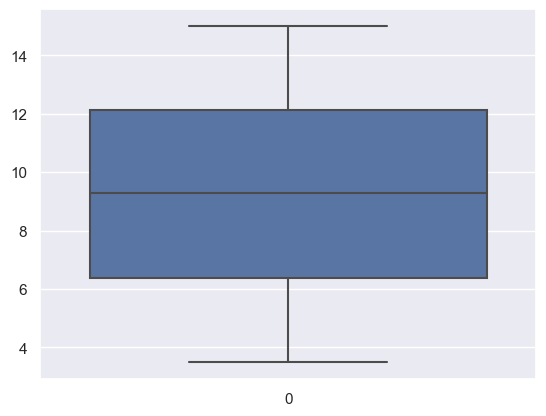

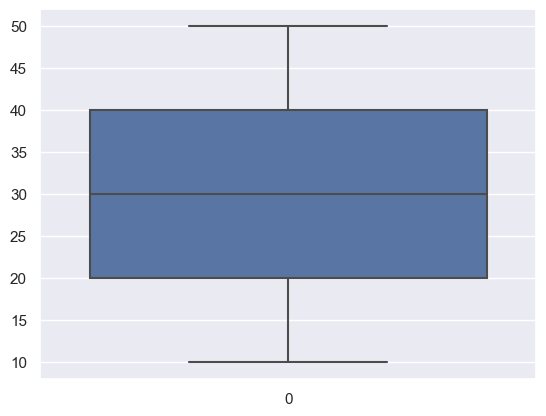

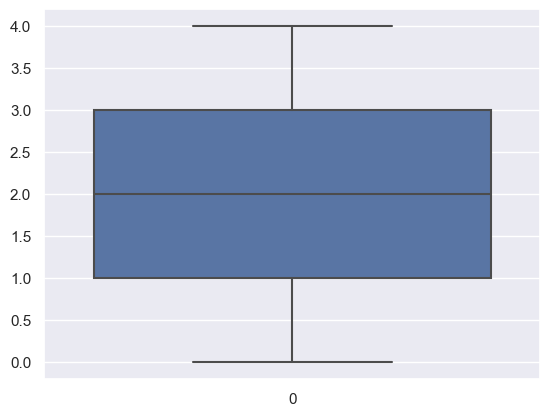

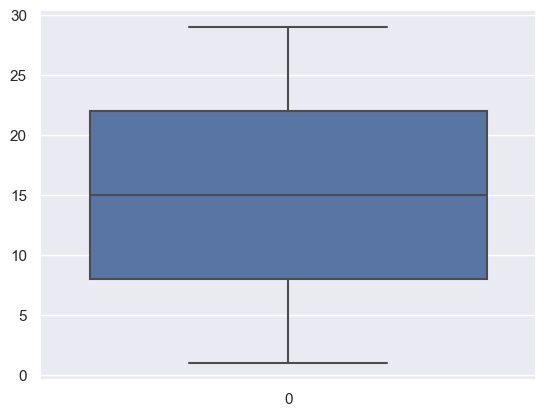

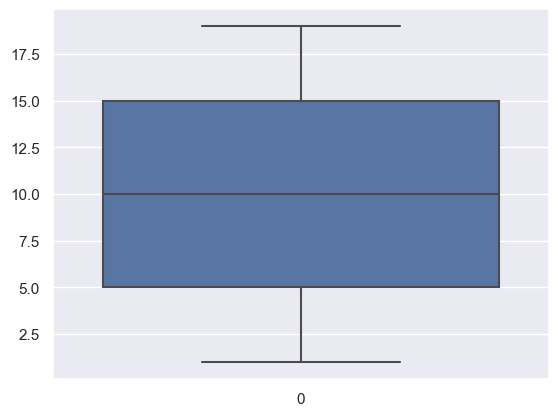

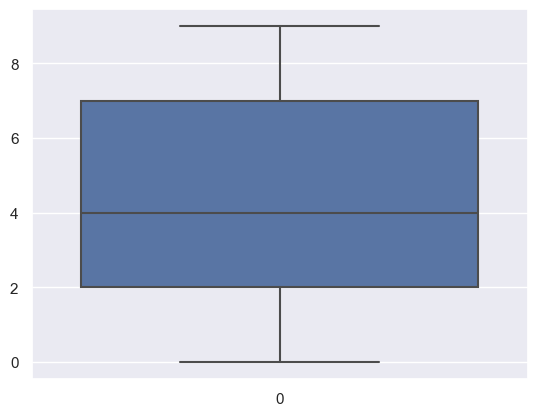

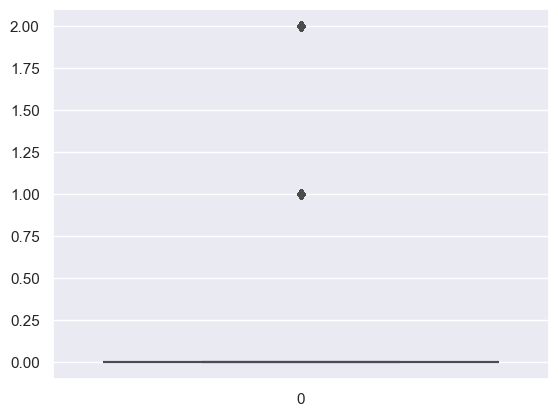

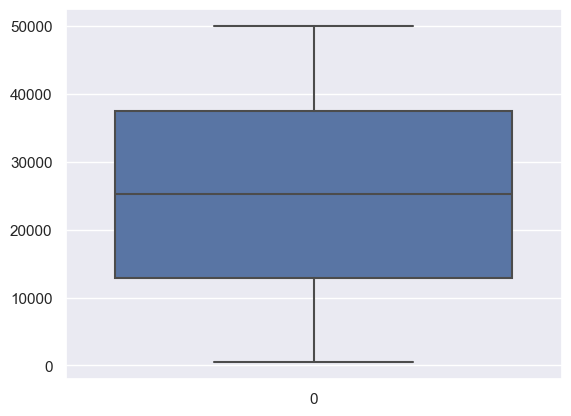

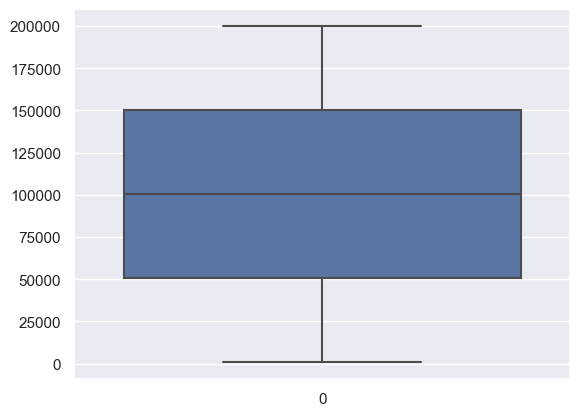

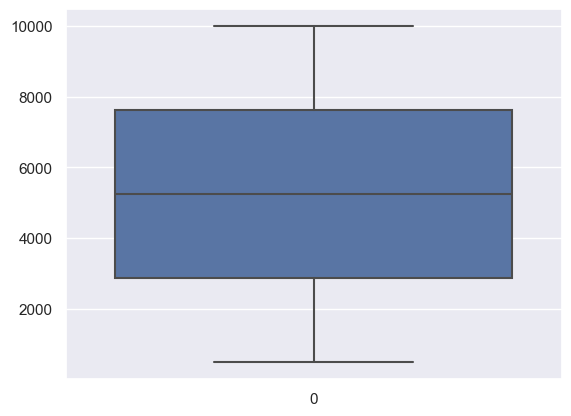

In [19]:
# Checking outlier
def boxplots(col):
    sns.boxplot(data[col])
    plt.show()

for i in list(data.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [20]:
# Remove outliers using IQR method
Q1=data['bankruptcies'].quantile(0.25)
Q3=data['bankruptcies'].quantile(0.75)
IQR=Q3-Q1
Upper_limit=Q1-1.5*IQR
Lower_limit=Q3+1.5*IQR
data=data[(data['bankruptcies'] >= Upper_limit) & (data['bankruptcies'] <= Lower_limit)]

In [21]:
data

age  income  loan_amount  credit_score employment_status  default  \
1       36   90200        14895           578          employed        0   
2       47   85896         2613           352          employed        1   
4       44   77529        37731           615     self-employed        0   
5       29   85866        36115           421          employed        0   
6       24   32907        41453           663          employed        1   
...    ...     ...          ...           ...               ...      ...   
99995   23   51865        47611           542          employed        1   
99996   34   80958        26297           799          employed        0   
99997   53   97881        47710           806          employed        0   
99998   59   39865         4827           379          employed        1   
99999   21   82691        11838           650          employed        1   

       loan_term  interest_rate  debt_to_income_ratio  num_of_dependents  \
1             48      13.624882             21.845252                  0   
2             12       6.676366             12.562405                  1   
4             12       4.111636             35.892430                  3   
5             48       6.045977             15.189284                  3   
6             60       3.817818             13.095055                  4   
...          ...            ...                   ...                ...   
99995         48      14.829470             34.446382                  0   
99996         48      12.085357             23.618622                  3   
99997         36       5.521324             14.515193                  3   
99998         48       4.438388             28.148553                  2   
99999         36      13.545356             38.341493                  1   

      education_level home_ownership marital_status  credit_history_length  \
1         high_school            own        married                     11   
2            bachelor       mortgage       divorced                     24   
4         high_school            own         single                     27   
5            bachelor       mortgage         single                      3   
6            bachelor           rent         single                     11   
...               ...            ...            ...                    ...   
99995        bachelor           rent        married                     10   
99996        bachelor           rent        married                     23   
99997     high_school           rent        married                     22   
99998     high_school            own        married                      8   
99999     high_school            own         single                      5   

       num_credit_lines  late_payments  bankruptcies  annual_savings  \
1                    16              8             0           40761   
2                     2              2             0           34857   
4                     7              5             0            5668   
5                     7              4             0           34796   
6                    19              3             0           19314   
...                 ...            ...           ...             ...   
99995                 2              6             0           42800   
99996                18              3             0           12779   
99997                 5              5             0           26205   
99998                11              8             0           38120   
99999                13              5             0           16118   

       retirement_savings  monthly_expenses  
1                  152999              4064  
2                   67487              2848  
4                   42397              8009  
5                   25986              5079  
6                   93462              1545  
...                   ...               ...  
99995               99609              4770  
99996      

In [22]:
data=data.rename(columns={'default(y)':'default'})
data.default.value_counts()

default
1    47606
0    47450
Name: count, dtype: int64

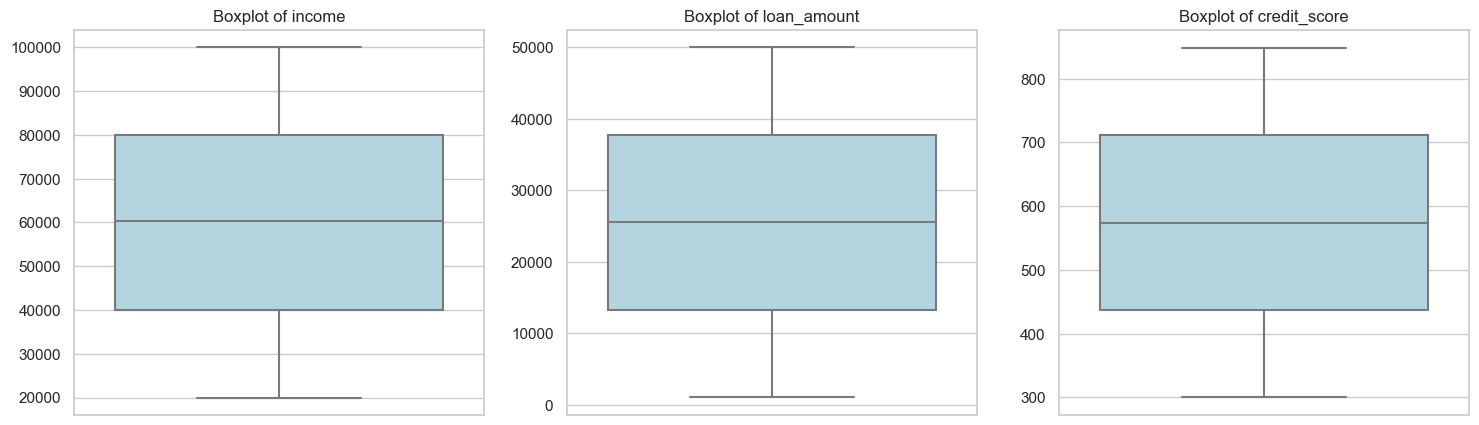

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(18,5))
features=['income','loan_amount','credit_score']
for i, feature in enumerate(features,1):
    plt.subplot(1,3,i)
    sns.boxplot(y=data[feature],color='lightblue')
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('')
plt.show()

# Encoding

In [24]:
#Encoding Categorical variables
categorical_cols=['employment_status','education_level','home_ownership','marital_status']
data[categorical_cols]=data[categorical_cols].apply(LabelEncoder().fit_transform)


In [25]:
new_data=data.drop(['bankruptcies'],axis=1)
new_data

age  income  loan_amount  credit_score  employment_status  default  \
1       36   90200        14895           578                  0        0   
2       47   85896         2613           352                  0        1   
4       44   77529        37731           615                  1        0   
5       29   85866        36115           421                  0        0   
6       24   32907        41453           663                  0        1   
...    ...     ...          ...           ...                ...      ...   
99995   23   51865        47611           542                  0        1   
99996   34   80958        26297           799                  0        0   
99997   53   97881        47710           806                  0        0   
99998   59   39865         4827           379                  0        1   
99999   21   82691        11838           650                  0        1   

       loan_term  interest_rate  debt_to_income_ratio  num_of_dependents  \
1             48      13.624882             21.845252                  0   
2             12       6.676366             12.562405                  1   
4             12       4.111636             35.892430                  3   
5             48       6.045977             15.189284                  3   
6             60       3.817818             13.095055                  4   
...          ...            ...                   ...                ...   
99995         48      14.829470             34.446382                  0   
99996         48      12.085357             23.618622                  3   
99997         36       5.521324             14.515193                  3   
99998         48       4.438388             28.148553                  2   
99999         36      13.545356             38.341493                  1   

       education_level  home_ownership  marital_status  credit_history_length  \
1                    1               1               1                     11   
2                    0               0               0                     24   
4                    1               1               2                     27   
5                    0               0               2                      3   
6                    0               2               2                     11   
...                ...             ...             ...                    ...   
99995                0               2               1                     10   
99996                0               2               1                     23   
99997                1               2               1                     22   
99998                1               1               1                      8   
99999                1               1               2                      5   

       num_credit_lines  late_payments  annual_savings  retirement_savings  \
1                    16              8           40761              152999   
2                     2              2           34857               67487   
4                     7              5            5668               42397   
5                     7              4           34796               25986   
6                    19              3           19314               93462   
...                 ...            ...             ...                 ...   
99995                 2              6           42800               99609   
99996                18              3           12779              155431   
99997                 5              5           26205               86238   
99998                11              8           38120               73946   
99999                13              5           16118               72205   

       monthly_expenses  
1                  4064  
2                  2848  
4                  8009  
5                  5079  
6                  1545  
...                 ...  
99995              4770  
99996              4776  
99997              4250  

# Analysis of Correlation

Text(0.5, 1.0, 'Confusion Matrix')

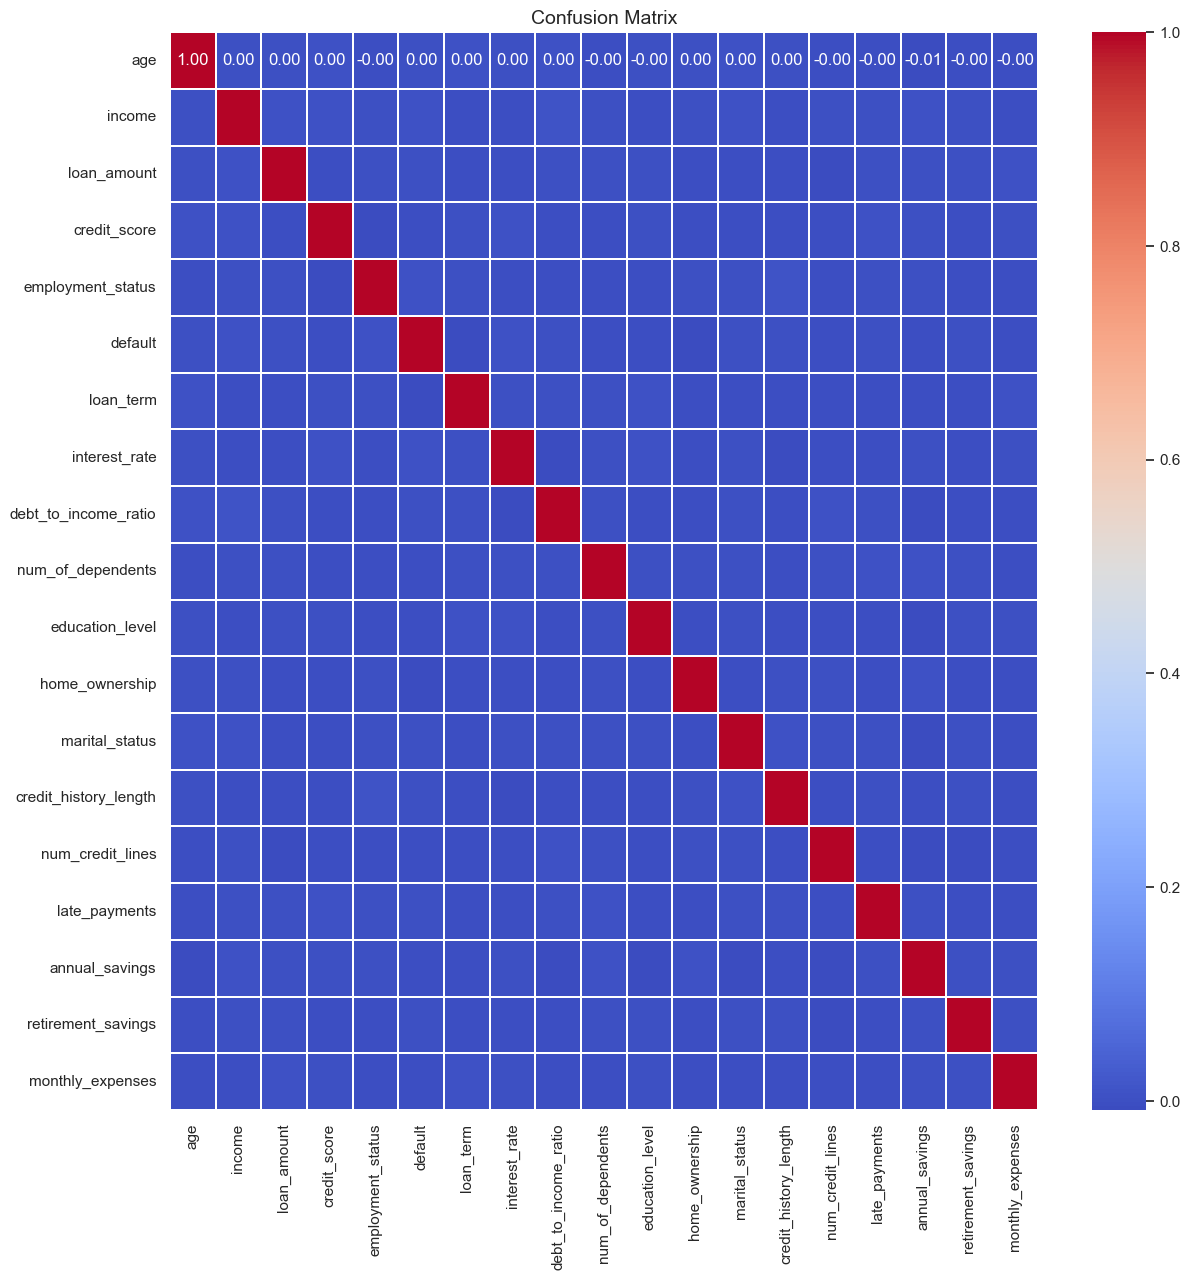

In [26]:
plt.figure(figsize=(14,14))
sns.heatmap(new_data.corr(),annot=True,cmap='coolwarm',fmt=".2f",linewidth=0.2)
plt.title('Confusion Matrix',fontsize=14)

In [27]:
new_data.describe()

age        income   loan_amount  credit_score  \
count  95056.000000  95056.000000  95056.000000  95056.000000   
mean      42.466020  60047.663135  25510.778120    573.824640   
std       12.691398  23103.080247  14132.306561    158.547863   
min       21.000000  20000.000000   1000.000000    300.000000   
25%       31.000000  39972.000000  13313.000000    437.000000   
50%       42.000000  60239.000000  25561.500000    574.000000   
75%       53.000000  80040.250000  37757.250000    711.000000   
max       64.000000  99998.000000  49999.000000    849.000000   

       employment_status       default     loan_term  interest_rate  \
count       95056.000000  95056.000000  95056.000000   95056.000000   
mean            0.494887      0.500821     36.020577       9.253130   
std             0.803951      0.500002     16.964345       3.319236   
min             0.000000      0.000000     12.000000       3.500245   
25%             0.000000      0.000000     24.000000       6.374884   
50%             0.000000      1.000000     36.000000       9.265603   
75%             1.000000      1.000000     48.000000      12.114058   
max             2.000000      1.000000     60.000000      14.999895   

       debt_to_income_ratio  num_of_dependents  education_level  \
count          95056.000000       95056.000000     95056.000000   
mean              29.987286           1.995908         0.945906   
std               11.563040           1.417592         0.863620   
min               10.000275           0.000000         0.000000   
25%               19.968127           1.000000         0.000000   
50%               29.994392           2.000000         1.000000   
75%               40.030476           3.000000         1.000000   
max               49.999915           4.000000         3.000000   

       home_ownership  marital_status  credit_history_length  \
count    95056.000000    95056.000000           95056.000000   
mean         1.298024        1.297593              14.980338   
std          0.782174        0.641635               8.370490   
min          0.000000        0.000000               1.000000   
25%          1.000000        1.000000               8.000000   
50%          1.000000        1.000000              15.000000   
75%          2.000000        2.000000              22.000000   
max          2.000000        2.000000              29.000000   

       num_credit_lines  late_payments  annual_savings  retirement_savings  \
count      95056.000000   95056.000000    95056.000000        95056.000000   
mean          10.014339       4.494624    25234.485051       100728.818917   
std            5.472260       2.872288    14266.674153        57442.516151   
min            1.000000       0.000000      500.000000         1002.000000   
25%            5.000000       2.000000    12916.000000        50870.750000   
50%           10.000000       4.000000    25262.500000       100706.500000   
75%           15.000000       7.000000    37552.500000       150355.000000   
max           19.000000       9.000000    49999.000000       199997.000000   

       monthly_expenses  
count      95056.000000  
mean        5254.572778  
std         2740.186829  
min          500.000000  
25%         2875.000000  
50%         5263.000000  
75%         7633.000000  
max         9999.000000

In [28]:
key_features=data.drop(['loan_term','employment_status','num_of_dependents','education_level', 'home_ownership','num_credit_lines','bankruptcies',
       'marital_status'],axis=1)

In [36]:
key_features.head()

age  income  loan_amount  credit_score  default  interest_rate  \
1   36   90200        14895           578        0      13.624882   
2   47   85896         2613           352        1       6.676366   
4   44   77529        37731           615        0       4.111636   
5   29   85866        36115           421        0       6.045977   
6   24   32907        41453           663        1       3.817818   

   debt_to_income_ratio  credit_history_length  late_payments  annual_savings  \
1             21.845252                     11              8           40761   
2             12.562405                     24              2           34857   
4             35.892430                     27              5            5668   
5             15.189284                      3              4           34796   
6             13.095055                     11              3           19314   

   retirement_savings  monthly_expenses  
1              152999              4064  
2               67487              2848  
4               42397              8009  
5               25986              5079  
6               93462              1545

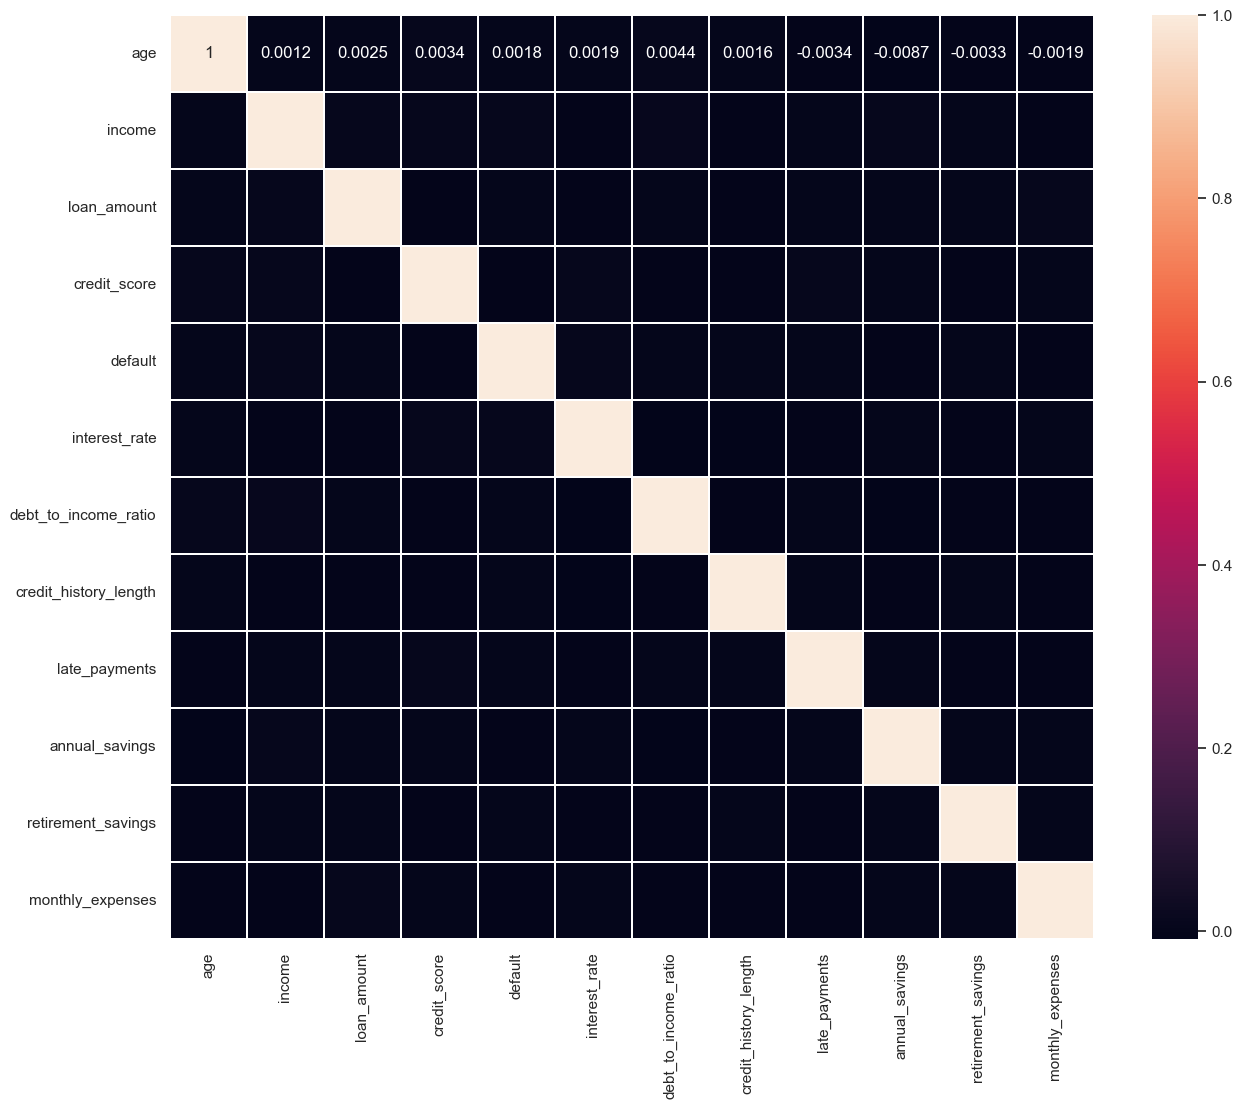

In [29]:
plt.figure(figsize=(15,12))
sns.heatmap(key_features.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

# MACHINE LEARNING MODEL

In [30]:
# split the data into dep and indep variables
x = new_data.drop(['default'],axis=1)
y = new_data['default']

In [31]:
x.head()

age  income  loan_amount  credit_score  employment_status  loan_term  \
1   36   90200        14895           578                  0         48   
2   47   85896         2613           352                  0         12   
4   44   77529        37731           615                  1         12   
5   29   85866        36115           421                  0         48   
6   24   32907        41453           663                  0         60   

   interest_rate  debt_to_income_ratio  num_of_dependents  education_level  \
1      13.624882             21.845252                  0                1   
2       6.676366             12.562405                  1                0   
4       4.111636             35.892430                  3                1   
5       6.045977             15.189284                  3                0   
6       3.817818             13.095055                  4                0   

   home_ownership  marital_status  credit_history_length  num_credit_lines  \
1               1               1                     11                16   
2               0               0                     24                 2   
4               1               2                     27                 7   
5               0               2                      3                 7   
6               2               2                     11                19   

   late_payments  annual_savings  retirement_savings  monthly_expenses  
1              8           40761              152999              4064  
2              2           34857               67487              2848  
4              5            5668               42397              8009  
5              4           34796               25986              5079  
6              3           19314               93462              1545

In [40]:
y.head()

1    0
2    1
4    0
5    0
6    1
Name: default, dtype: int64

In [46]:
# To check which variable is more significant to impact default - Feature Importance.

In [47]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [48]:
selection.feature_importances_

array([0.06514374, 0.06606005, 0.06608881, 0.06597276, 0.02608569,
       0.03767317, 0.06589544, 0.06606419, 0.04967085, 0.0451567 ,
       0.02607146, 0.03533283, 0.06443594, 0.06271031, 0.05885585,
       0.06652039, 0.06618249, 0.06607931])

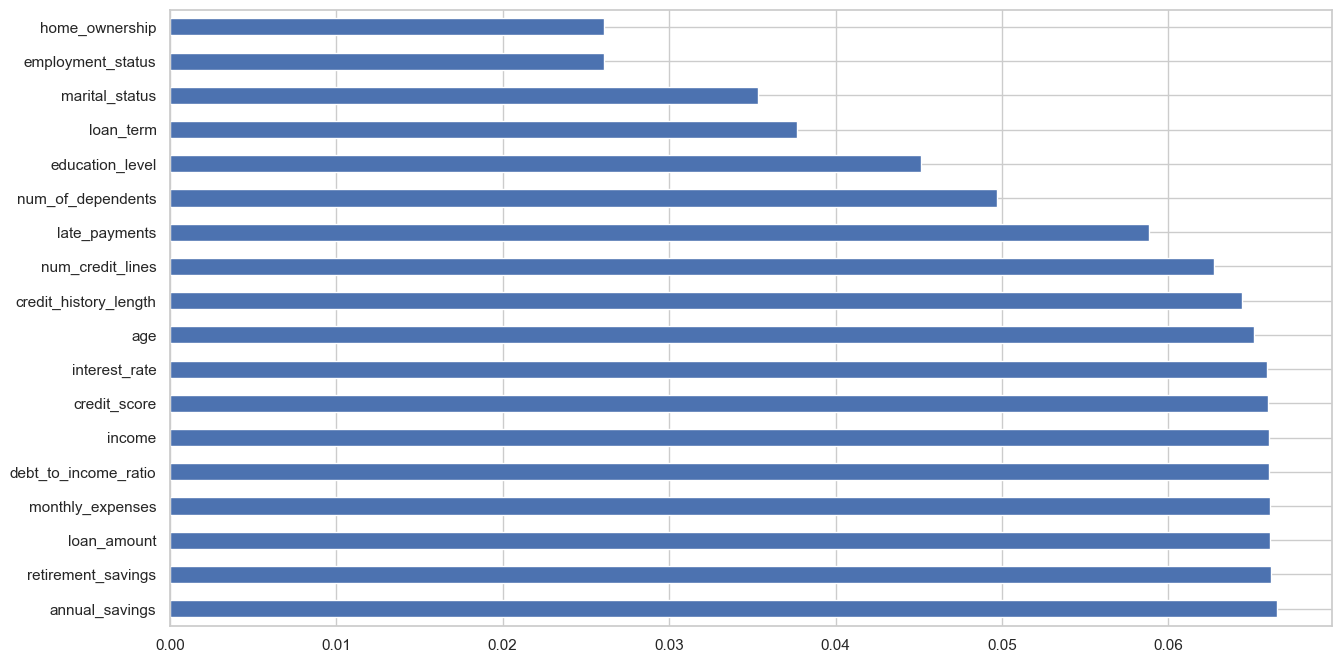

In [49]:
plt.figure(figsize=(15,8))
feature_imp = pd.Series(selection.feature_importances_, index=x.columns)
feature_imp.nlargest(20).plot(kind='barh')
plt.show()

# split the data into train and test

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [33]:
# Feature scaling
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [52]:
def evaluate_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_proba=model.predict_proba(x_test)[:,1] if hasattr(model,'predict_proba') else y_pred

    # Evaluation metrics
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred)
    auc=roc_auc_score(y_test,y_pred_proba)

    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1, "ROC AUC": auc}

# Dictionary to store results
results = {}


# Model Building

In [53]:
# Train Model
#Logistic Regression
log_reg=LogisticRegression(max_iter=1000,random_state=42)
results["Logistic Regression"]=evaluate_model(log_reg)

In [54]:
# Decision Tree
dt=DecisionTreeClassifier(random_state=42)
results["Decision Tree"]=evaluate_model(dt)

In [55]:
#Random Forest
rf=RandomForestClassifier(n_estimators=100,random_state=42)
results["Random Forest"]=evaluate_model(rf)

In [56]:
# SVM
svm=SVC(random_state=42)
results["SVM"] = evaluate_model(svm)

In [57]:
#Naive Bayes
nb=GaussianNB()
results["Naive Bayes"]=evaluate_model(nb)

In [58]:
#K-Nearest Neighbors
knn=KNeighborsClassifier()
results["K-Nearest Neighbors"] = evaluate_model(knn)

In [59]:
#Step 6: Displaying results
#Convert results dictionary to DataFrame for easy viewing
results_df=pd.DataFrame(results).T

In [60]:
print("Model evaluation Results:\n", results_df)

Model evaluation Results:
                      Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.501666   0.506569  0.463710  0.484193  0.503132
Decision Tree        0.502823   0.507283  0.498749  0.502980  0.502859
Random Forest        0.503454   0.508505  0.465517  0.486063  0.503125
SVM                  0.501245   0.505960  0.475111  0.490051  0.501477
Naive Bayes          0.499807   0.504510  0.466630  0.484831  0.503450
K-Nearest Neighbors  0.505558   0.510031  0.501947  0.505957  0.504043


In [61]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#Dictionary to store best parameters for each model
best_params={}

#1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
param_grid_log_reg = {
    'C':[0.01,0.1,1,10,100],
    'penalty':['l1','l2'],
    'solver':['liblinear','saga']
}
grid_log_reg = RandomizedSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='roc_auc', n_iter=10, random_state=42)
grid_log_reg.fit(x_train, y_train)
best_params["Logistic Regression"] = grid_log_reg.best_params_

#2. Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50,100,200,500],
    'max_depth': [None, 10, 20, 30,40,50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_rf = RandomizedSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_iter=10, random_state=42)
grid_rf.fit(x_train, y_train)
best_params["Random Forest"] = grid_rf.best_params_

#Display the best hyperparameters for each model
print("Best Hyperparameters for each model:")
for model, params in best_params.items():
    print(f"{model}: {params}")


2025-04-29 13:00:27,921 - INFO     - Executing shutdown due to inactivity...


Best Hyperparameters for each model:
Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}
Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [62]:
# Evaluate the tuned models
#Train models with best parameters and evalaute
tuned_results = {}

#Logistic Regression with best parameters
log_reg_tuned = LogisticRegression(random_state=42, **best_params["Logistic Regression"])
tuned_results["Logistic Regression"] = evaluate_model(log_reg_tuned)

#Random Forest with best parameters
rf_tuned = RandomForestClassifier(random_state=42, **best_params["Random Forest"])
tuned_results["Random Forest"] = evaluate_model(rf_tuned)


#Convert results dictionary to DataFrame for easy viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print("\nTuned Model evaluation Results:\n", tuned_results_df)


Tuned Model evaluation Results:
                      Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.499667   0.504168  0.487764  0.495830  0.501068
Random Forest        0.499036   0.503842  0.446746  0.473579  0.500164


In [17]:
knn_model=KNeighborsClassifier().fit(x,y)

In [15]:
y_pred=knn_model.predict(x)
y_prob=knn_model.predict_proba(x)[:,1]
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68     47450
           1       0.69      0.68      0.68     47606

    accuracy                           0.68     95056
   macro avg       0.68      0.68      0.68     95056
weighted avg       0.68      0.68      0.68     95056



In [16]:
roc_auc_score(y,y_prob)

0.7431967346829639

In [18]:
from sklearn.model_selection import cross_validate
# Cross Validation
cv_results=cross_validate(knn_model,x,y,cv=5,scoring=["accuracy","f1","roc_auc"])
print("Mean Test Accuracy:",cv_results["test_accuracy"].mean())
print("Mean Test f1 score:",cv_results["test_f1"].mean())
print("Mean Test roc_auc:",cv_results["test_roc_auc"].mean())

Mean Test Accuracy: 0.49747516533525393
Mean Test f1 score: 0.498643946493954
Mean Test roc_auc: 0.49674519819995167


In [19]:
knn_model=KNeighborsClassifier()
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
from sklearn.model_selection import GridSearchCV
knn_params={"n_neighbors" :range(2,50)}
knn_gs_best=GridSearchCV(knn_model,knn_params,cv=5,n_jobs=-1,verbose=1).fit(x,y)
knn_gs_best.best_params_

In [25]:
knn_final=knn_model.set_params(**knn_gs_best.best_params_).fit(x,y)

In [24]:
cv_results=cross_validate(knn_model,x,y,cv=5,scoring=["accuracy","f1","roc_auc"])
print("Mean Test Accuracy:",cv_results["test_accuracy"].mean())
print("Mean Test f1 score:",cv_results["test_f1"].mean())
print("Mean Test roc_auc:",cv_results["test_roc_auc"].mean())

Mean Test Accuracy: 0.5030508702686363
Mean Test f1 score: 0.5043204635056673
Mean Test roc_auc: 0.5025096179575896


In [ ]:
# Cart

In [35]:
cart_model=DecisionTreeClassifier(random_state=1).fit(x,y)

In [37]:
y_pred=cart_model.predict(x)
y_prob=cart_model.predict_proba(x)[:,1]
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47450
           1       1.00      1.00      1.00     47606

    accuracy                           1.00     95056
   macro avg       1.00      1.00      1.00     95056
weighted avg       1.00      1.00      1.00     95056



In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
cart_model=DecisionTreeClassifier(random_state=101).fit(x_train,y_train)

In [40]:
y_pred=cart_model.predict(x_test)
y_prob=cart_model.predict_proba(x_test)[:,1]
print(classification_report(y_test,y_pred))
roc_auc_score(y_test,y_prob)

              precision    recall  f1-score   support

           0       0.50      0.51      0.50     14133
           1       0.51      0.50      0.50     14384

    accuracy                           0.50     28517
   macro avg       0.50      0.50      0.50     28517
weighted avg       0.50      0.50      0.50     28517



0.5024232168269231

In [42]:
# Cross Validation
from sklearn.model_selection import cross_validate
cart_model=DecisionTreeClassifier(random_state=17).fit(x,y)
cv_results=cross_validate(cart_model,x,y,cv=10,scoring=["accuracy","f1","roc_auc"])
print("Mean Test Accuracy:",cv_results["test_accuracy"].mean())
print("Mean Test f1 score:",cv_results["test_f1"].mean())
print("Mean Test roc_auc:",cv_results["test_roc_auc"].mean())

Mean Test Accuracy: 0.5022303275773777
Mean Test f1 score: 0.5057951008593824
Mean Test roc_auc: 0.5022197884158766


In [43]:
cart_model.get_params()
cart_params={"max_depth": range(1,11), "min_samples_split": range(2,20)}

In [45]:
from sklearn.model_selection import GridSearchCV
cart_best_grid=GridSearchCV(cart_model,cart_params,cv=5,n_jobs=-1,verbose=True).fit(x,y)
print("best params:",cart_best_grid.best_params_)
print("best score:",cart_best_grid.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
best params: {'max_depth': 6, 'min_samples_split': 2}
best score: 0.5004103247477075


In [47]:
cart_final=cart_model.set_params(**cart_best_grid.best_params_).fit(x,y)

In [48]:
cv_results=cross_validate(cart_model,x,y,cv=10,scoring=["accuracy","f1","roc_auc"])
print("Mean Test Accuracy:",cv_results["test_accuracy"].mean())
print("Mean Test f1 score:",cv_results["test_f1"].mean())
print("Mean Test roc_auc:",cv_results["test_roc_auc"].mean())

Mean Test Accuracy: 0.4977171415755247
Mean Test f1 score: 0.43787955861620775
Mean Test roc_auc: 0.49846415026922425
